In [122]:
import sys, os
sys.path.append(os.path.abspath("..")) # Supaya bisa akses utils

from utils.db_utils import load_query, test_connection, get_engine

In [123]:
# Load CSV data
import pandas as pd

collar_df = pd.read_csv("../data/collar_all.csv", delimiter=";", encoding="utf-8")
collar_df = collar_df.replace(["#DIV/0!", "#N/A"], pd.NA)

assay_df = pd.read_csv("../data/intervall_all.csv", delimiter=";", encoding="utf-8")
assay_df = assay_df.replace(["#DIV/0!", "#N/A"], pd.NA)

print(collar_df.head(2))
print("\n=======\n")
print(assay_df.head(2))

   hole_id   date  easting_x  northing_y  elevation  elev_topo   eoh  is_old  \
0  E07-017  44545  404120.68   114875.10     375.57     392.13 16.00       1   
1  E07-018  44394  404127.93   114849.52     383.15     397.94 30.00       1   

   is_twin  inc_samp  
0        0        18  
1        0        34  


           sample_id  hole_id  depth_from  depth_to  core_length cr_%  is_old  \
0  B1/E07-017/JAS/01  E07-017        0.00      1.00         1.00    1       1   
1  B1/E07-017/JAS/02  E07-017        1.00      1.50         0.50    1       1   

   is_twin   ni    fe   mgo  sio2    sm   co  cao  al2o3 lith  
0        0 1.14 38.67  2.32 24.15 10.41 0.02 0.07  11.94  LIM  
1        0 2.08 12.78 20.00 38.10  1.91 0.04 0.12   2.36  SAP  


In [5]:
import sys, os
sys.path.append(os.path.abspath("..")) # Supaya bisa akses utils

from utils.db_utils import load_query, test_connection, get_engine

# Fetch engine
engine = get_engine()

# Test connection
# test_connection()

# Send DataFrame to PostgreSQL
# Write collar table
# collar_df.to_sql("collar", engine, schema="exploration", if_exists="replace", index=False)

# Write assay table
# assay_df.to_sql("assay", engine, schema="exploration", if_exists="replace", index=False)


In [6]:
df = load_query("SELECT * FROM exploration.assay")

df

,sample_id,hole_id,depth_from,depth_to,core_length,cr_%,is_old,is_twin,ni,fe,mgo,sio2,sm,co,cao,al2o3,lith
0,B1/E07-017/JAS/01,E07-017,0.0,1.0,1.0,1,1,0,1.140,38.670,2.320,24.150,10.409483,0.020,0.070,11.940,LIM
1,B1/E07-017/JAS/02,E07-017,1.0,1.5,0.5,1,1,0,2.080,12.780,20.000,38.100,1.905000,0.040,0.120,2.360,SAP
2,B1/E07-017/JAS/03,E07-017,1.5,2.0,0.5,1,1,0,1.920,10.290,23.330,38.800,1.663095,0.020,0.120,1.550,SAP
3,B1/E07-017/JAS/04,E07-017,2.0,3.0,1.0,1,1,0,2.020,8.330,25.160,39.490,1.569555,0.010,0.140,0.970,SAP
4,B1/E07-017/JAS/05,E07-017,3.0,3.4,0.4,1,1,0,2.130,7.180,26.800,39.610,1.477985,0.010,0.130,0.920,RSAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9186,B1/F09-043i/JAS/06,F09-043i,5.0,6.0,1.0,1,0,1,0.287,6.732,31.710,34.689,1.093945,0.018,0.028,0.665,SAP
9187,B1/F09-043i/JAS/07,F09-043i,6.0,7.0,1.0,1,0,1,0.281,6.523,34.241,36.230,1.058088,0.018,0.023,0.669,SAP
9188,B1/F09-043i/JAS/08,F09-043i,7.0,8.0,1.0,1,0,1,0.250,5.790,32.859,35.482,1.079826,0.015,0.025,0.904,SAP
9189,B1/F09-043i/JAS/09,F09-043i,8.0,9.0,1.0,1,0,1,0.248,5.655,33.379,34.603,1.036670,0.015,0.067,0.815,SAP


In [126]:
# Buat column geom langsung di PostgreSQL / dbeaver

In [127]:
df_collar_postgres = load_query("""
    select hole_id, easting_x, northing_y, ST_AsText(geom) as geom_text 
    from exploration.collar limit 10;
""")
df_collar_postgres

ProgrammingError: (psycopg2.errors.UndefinedColumn) column "geom" does not exist
LINE 2: ... select hole_id, easting_x, northing_y, ST_AsText(geom) as g...
                                                             ^
HINT:  Perhaps you meant to reference the column "collar.eoh".

[SQL: 
    select hole_id, easting_x, northing_y, ST_AsText(geom) as geom_text 
    from exploration.collar limit 10;
]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [ ]:
# ASSAY COMPARISON (non-twin)
## A. Analisis distribusi global (histogram, density plot, ECDF, boxplot, n, mean, median, std, iqr, skewness, kurtosis, % <LOD)

# Split data "assay_old" & "assay_new"
assay_old = load_query("""
    select *
    from exploration.assay
    where is_old = 1;
""")

assay_new = load_query("""
    select *
    from exploration.assay
    where is_old = 0;
""")

In [ ]:
assay_old

,sample_id,hole_id,depth_from,depth_to,core_length,cr_%,is_old,is_twin,ni,fe,mgo,sio2,sm,co,cao,al2o3,lith
0,B1/E07-017/JAS/01,E07-017,0.0,1.00,1.00,1,1,0,1.14,38.67,2.32,24.15,10.409483,0.02,0.07,11.94,LIM
1,B1/E07-017/JAS/02,E07-017,1.0,1.50,0.50,1,1,0,2.08,12.78,20.00,38.10,1.905000,0.04,0.12,2.36,SAP
2,B1/E07-017/JAS/03,E07-017,1.5,2.00,0.50,1,1,0,1.92,10.29,23.33,38.80,1.663095,0.02,0.12,1.55,SAP
3,B1/E07-017/JAS/04,E07-017,2.0,3.00,1.00,1,1,0,2.02,8.33,25.16,39.49,1.569555,0.01,0.14,0.97,SAP
4,B1/E07-017/JAS/05,E07-017,3.0,3.40,0.40,1,1,0,2.13,7.18,26.80,39.61,1.477985,0.01,0.13,0.92,RSAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,B1/F10-011/JAS/20,F10-011,13.6,14.00,0.40,1,1,0,0.72,14.78,19.46,39.43,2.026208,0.03,0.09,1.41,SROC
5882,B1/F10-011/JAS/21,F10-011,14.0,15.00,1.00,1,1,0,0.47,8.11,28.07,43.11,1.535803,0.01,0.15,1.03,RSAP
5883,B1/F10-011/JAS/22,F10-011,15.0,16.00,1.00,1,1,0,0.44,8.85,29.57,42.09,1.423402,0.01,0.13,1.52,BRK
5884,B1/F10-011/JAS/23,F10-011,16.0,17.00,1.00,1,1,0,0.50,9.51,26.34,41.40,1.571754,0.01,0.17,0.67,BRK


In [ ]:
assay_new

,sample_id,hole_id,depth_from,depth_to,core_length,cr_%,is_old,is_twin,ni,fe,mgo,sio2,sm,co,cao,al2o3,lith
0,B1/E07-216i/JAS/01,E07-216i,0.0,1.0,1.0,1,0,0,1.094,28.438,12.234,22.694,1.854994,0.061,0.053,6.280,SAP
1,B1/E07-216i/JAS/02,E07-216i,1.0,2.0,1.0,1,0,0,1.454,17.738,19.258,37.526,1.948593,0.043,0.065,2.373,SAP
2,B1/E07-216i/JAS/03,E07-216i,2.0,3.0,1.0,1,0,0,1.268,14.506,23.748,38.952,1.640222,0.036,0.023,1.991,SAP
3,B1/E07-216i/JAS/04,E07-216i,3.0,4.0,1.0,1,0,0,0.561,9.365,26.450,39.653,1.499168,0.021,0.078,1.763,SAP
4,B1/E07-216i/JAS/05,E07-216i,4.0,5.0,1.0,1,0,0,0.303,6.583,30.802,36.551,1.186644,0.014,0.068,1.090,BRK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,B1/F09-043i/JAS/06,F09-043i,5.0,6.0,1.0,1,0,1,0.287,6.732,31.710,34.689,1.093945,0.018,0.028,0.665,SAP
3301,B1/F09-043i/JAS/07,F09-043i,6.0,7.0,1.0,1,0,1,0.281,6.523,34.241,36.230,1.058088,0.018,0.023,0.669,SAP
3302,B1/F09-043i/JAS/08,F09-043i,7.0,8.0,1.0,1,0,1,0.250,5.790,32.859,35.482,1.079826,0.015,0.025,0.904,SAP
3303,B1/F09-043i/JAS/09,F09-043i,8.0,9.0,1.0,1,0,1,0.248,5.655,33.379,34.603,1.036670,0.015,0.067,0.815,SAP


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from IPython.display import display
import openpyxl

def calculate_stats(assay_old, assay_new, elements, quantile=0.01):
    """
    Hitung LOD, %<LOD, jumlah <LOD, mean/median ratio, dan statistik deskriptif
    untuk dataset lama & baru.
    """
    results = []

    for elem in elements:
        # Hitung LOD (1% quantile)
        lod_old = assay_old[elem].quantile(quantile)
        lod_new = assay_new[elem].quantile(quantile)

        # Tandai <LOD
        assay_old[f'below_LOD_{elem}'] = assay_old[elem] < lod_old
        assay_new[f'below_LOD_{elem}'] = assay_new[elem] < lod_new

        # % dan jumlah <LOD
        pct_below_lod_old = assay_old[f'below_LOD_{elem}'].mean() * 100
        pct_below_lod_new = assay_new[f'below_LOD_{elem}'].mean() * 100
        count_lod_old = assay_old[f'below_LOD_{elem}'].sum()
        count_lod_new = assay_new[f'below_LOD_{elem}'].sum()

        # OLD stats
        n_old = assay_old[elem].count()
        mean_old = assay_old[elem].mean()
        median_old = assay_old[elem].median()
        std_old = assay_old[elem].std()
        iqr_old = assay_old[elem].quantile(0.75) - assay_old[elem].quantile(0.25)
        skew_old = skew(assay_old[elem].dropna())
        kurt_old = kurtosis(assay_old[elem].dropna())
        min_old = assay_old[elem].min()
        max_old = assay_old[elem].max()
        range_old = max_old - min_old

        # NEW stats
        n_new = assay_new[elem].count()
        mean_new = assay_new[elem].mean()
        median_new = assay_new[elem].median()
        std_new = assay_new[elem].std()
        iqr_new = assay_new[elem].quantile(0.75) - assay_new[elem].quantile(0.25)
        skew_new = skew(assay_new[elem].dropna())
        kurt_new = kurtosis(assay_new[elem].dropna())
        min_new = assay_new[elem].min()
        max_new = assay_new[elem].max()
        range_new = max_new - min_new

        # ✅ Mean & Median Ratio
        mean_ratio = mean_new / mean_old if mean_old != 0 else np.nan
        median_ratio = median_new / median_old if median_old != 0 else np.nan

        results.append({
            'Element': elem.upper(),
            'LOD_old': lod_old,
            'LOD_new': lod_new,
            '%<LOD_old': pct_below_lod_old,
            '%<LOD_new': pct_below_lod_new,
            'Count<LOD_old': count_lod_old,
            'Count<LOD_new': count_lod_new,
            'n_old': n_old,
            'n_new': n_new,
            'mean_old': mean_old,
            'mean_new': mean_new,
            'mean_ratio': mean_ratio,          # ✅ ADDED
            'median_old': median_old,
            'median_new': median_new,
            'median_ratio': median_ratio,      # ✅ ADDED
            'std_old': std_old,
            'std_new': std_new,
            'iqr_old': iqr_old,
            'iqr_new': iqr_new,
            'skew_old': skew_old,
            'skew_new': skew_new,
            'kurtosis_old': kurt_old,
            'kurtosis_new': kurt_new,
            'min_old': min_old,
            'max_old': max_old,
            'range_old': range_old,
            'min_new': min_new,
            'max_new': max_new,
            'range_new': range_new
        })

    return pd.DataFrame(results)


# Eksekusi
elements = ['ni', 'fe', 'mgo', 'sio2']
summary_stats = calculate_stats(assay_old, assay_new, elements, quantile=0.01)
display(summary_stats)

summary_stats.to_excel("../output/global_plots/csv/summary_stats.xlsx", index=False)


,Element,LOD_old,LOD_new,%<LOD_old,%<LOD_new,Count<LOD_old,Count<LOD_new,n_old,n_new,mean_old,...,skew_old,skew_new,kurtosis_old,kurtosis_new,min_old,max_old,range_old,min_new,max_new,range_new
0,NI,0.24,0.23,0.71,1.00,42,33,5886,3305,0.91,...,0.59,0.84,-0.49,-0.20,0.08,3.36,3.28,0.18,2.68,2.50
1,FE,4.82,5.30,1.00,1.03,59,34,5886,3305,16.23,...,1.34,1.46,0.67,0.99,0.51,57.31,56.80,3.47,50.81,47.34
2,MGO,0.42,0.85,0.95,1.00,56,33,5886,3305,22.78,...,-0.07,-0.81,0.63,-0.79,0.02,88.33,88.31,0.64,36.45,35.81
3,SIO2,21.83,6.30,0.97,1.03,57,34,5886,3305,38.71,...,-0.31,-1.38,4.05,1.17,7.62,112.78,105.16,3.16,64.10,60.94


In [ ]:
## B. Mean Ratio & Median Ratio
'''
Fungsi / Tujuan:
Mengukur bias antar dataset
    Kalau ratio ~ 1.0 → distribusi antara dataset lama & baru mirip
    Kalau ratio > 1.0 → dataset baru cenderung punya nilai lebih tinggi
    Kalau ratio < 1.0 → dataset baru cenderung lebih rendah
Median ratio lebih robust terhadap outlier
    Kalau data punya outlier ekstrem, mean ratio bisa “terseret”
    Median ratio lebih stabil
Dipakai di QAQC geologi/mineral
    Misalnya bandingkan lab lama vs lab baru
    Bandingkan primary assay vs umpire lab
    Untuk memvalidasi apakah hasil assay konsisten
'''

def calculate_ratios(assay_old, assay_new, elements):
    """
    Hitung mean ratio & median ratio antara dataset lama dan baru.

    Parameters
    ----------
    assay_old : pd.DataFrame
        Dataset lama
    assay_new : pd.DataFrame
        Dataset baru
    elements : list
        Daftar kolom elemen kimia

    Returns
    -------
    pd.DataFrame
        Ringkasan mean & median ratio untuk tiap elemen
    """
    results = []

    for elem in elements:
        mean_old = assay_old[elem].mean()
        mean_new = assay_new[elem].mean()
        median_old = assay_old[elem].median()
        median_new = assay_new[elem].median()

        mean_ratio = mean_new / mean_old if mean_old != 0 else None
        median_ratio = median_new / median_old if median_old != 0 else None

        results.append({
            "Element": elem.upper(),
            "Mean_old": mean_old,
            "Mean_new": mean_new,
            "Mean_ratio": mean_ratio,
            "Median_old": median_old,
            "Median_new": median_new,
            "Median_ratio": median_ratio
        })

    return pd.DataFrame(results)


In [ ]:
# Visualization of Global Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# -------------------------
# Fungsi plot individual
# -------------------------

def plot_histogram(assay_old, assay_new, element, step, 
                   color_old="blue", color_new="orange", save_path=None):
    # Tentukan min dan max dari gabungan data
    min_val = min(assay_old[element].min(), assay_new[element].min())
    max_val = max(assay_old[element].max(), assay_new[element].max())

    # Bikin fixed bins pakai step
    bins = np.arange(min_val, max_val + step, step)

    plt.figure(figsize=(8,5))
    sns.histplot(assay_old[element], bins=bins, stat="density",
                 color=color_old, alpha=0.5, label="Old")
    sns.histplot(assay_new[element], bins=bins, stat="density",
                 color=color_new, edgecolor="black", alpha=0.5, label="New")

    plt.title(f"Histogram {element.upper()} (Fixed Interval {step}%)")
    plt.xlabel(element.upper())
    plt.ylabel("Density")
    plt.legend()

    if save_path:
        os.makedirs(save_path, exist_ok=True)
        plt.savefig(f"{save_path}/{element}_hist.svg", format="svg", dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()


def plot_density(assay_old, assay_new, element, save_path=None,
                 color_old="blue", color_new="orange"):
    plt.figure(figsize=(8,5))

    # === Old dataset ===
    sns.kdeplot(
        assay_old[element],
        color=color_old,
        label="Old",
        fill=True,
        alpha=0.3,
        linewidth=1
    )

    # === New dataset === (outline hitam + isi putih)
    lineplot = sns.kdeplot(
        assay_new[element],
        color="black",   # outline hitam
        label="New",
        fill=False,
        linewidth=1
    )
    # ambil data garis luar lalu fill putih
    line = lineplot.get_lines()[-1]
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    plt.fill_between(x_data, y_data, color="white", alpha=1, zorder=0)

    plt.title(f"Density Plot {element.upper()}")
    plt.xlabel(element.upper())
    plt.ylabel("Density")
    plt.legend()

    if save_path:
        plt.savefig(f"{save_path}/{element}_density.svg", format="svg", dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()


import matplotlib.pyplot as plt
import numpy as np
import os

def plot_ecdf(assay_old, assay_new, elem, save_path=None,
              color_old="blue", color_new="black"):
    import numpy as np
    import matplotlib.pyplot as plt
    import os

    # Debug print
    # print(f"Plotting ECDF untuk {elem} dengan warna old={color_old}, new={color_new}")
    
    # Pastikan kolom ada
    if elem not in assay_old.columns or elem not in assay_new.columns:
        print(f"Kolom {elem} tidak ditemukan di salah satu dataset.")
        return

    # Ambil data dan drop nilai NaN
    data_old = assay_old[elem].dropna()
    data_new = assay_new[elem].dropna()

    # Kalau salah satu dataset kosong
    if len(data_old) == 0 or len(data_new) == 0:
        print(f"Data untuk {elem} kosong di salah satu dataset.")
        return

    # ECDF manual
    x_old = np.sort(data_old)
    y_old = np.arange(1, len(x_old) + 1) / len(x_old)

    x_new = np.sort(data_new)
    y_new = np.arange(1, len(x_new) + 1) / len(x_new)

    # Plot ECDF
    plt.figure(figsize=(8, 5))
    plt.step(x_old, y_old, color=color_old, label="Old Assay", linewidth=1)
    plt.step(x_new, y_new, color=color_new, label="New Assay", linewidth=1)

    plt.xlabel(elem.upper())
    plt.ylabel("Cumulative Probability")
    plt.title(f"ECDF Comparison for {elem.upper()}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    # Simpan hasil
    if save_path:
        os.makedirs(save_path, exist_ok=True)
        plt.savefig(f"{save_path}/{elem}_ecdf.svg", format="svg", dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()


def plot_boxplot(assay_old, assay_new, element, color_old="blue", color_new="black", save_path=None):
    # Gabungkan data
    df_plot = pd.concat([
        assay_old[[element]].assign(Dataset="Old"),
        assay_new[[element]].assign(Dataset="New")
    ])

    # Plot
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        x="Dataset",
        y=element,
        hue="Dataset",  # ← tambahkan hue
        data=df_plot,
        palette={"Old": color_old, "New": color_new},  # gunakan dict, bukan list
        linewidth=0.8,
        width=0.6,
        legend=False  # tidak perlu legend, karena sumbu x sudah mewakili
    )

    plt.title(f"Boxplot {element.upper()}", fontsize=12, weight="bold")
    plt.xlabel("")
    plt.ylabel(element.upper())
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    # Simpan ke file
    if save_path:
        os.makedirs(save_path, exist_ok=True)
        plt.savefig(f"{save_path}/{element}_boxplot.svg", format="svg", dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()

def plot_scatter_trend(
    assay_old, assay_new, element,
    color_old="blue", color_new="orange",
    max_points=500,
    legend_fontsize=9,
    save_path=None
):
    """
    Scatter plot untuk membandingkan distribusi dua dataset assay
    dengan adaptive down-sampling dan regresi linear per dataset.
    """

    # Load dan sort data
    data_old = assay_old[element].dropna().sort_values().reset_index(drop=True)
    data_new = assay_new[element].dropna().sort_values().reset_index(drop=True)

    # Adaptive down-sampling
    if len(data_old) > max_points:
        data_old = data_old.sample(max_points, random_state=42).sort_values().reset_index(drop=True)
    if len(data_new) > max_points:
        data_new = data_new.sample(max_points, random_state=42).sort_values().reset_index(drop=True)

    # Normalized index 0–1
    idx_old = np.linspace(0, 1, len(data_old))
    idx_new = np.linspace(0, 1, len(data_new))

    # Regressions
    slope_old, intercept_old, r_old, *_ = linregress(idx_old, data_old)
    slope_new, intercept_new, r_new, *_ = linregress(idx_new, data_new)

    plt.figure(figsize=(6, 5))

    # Scatter mengikuti warna argument
    plt.scatter(idx_old, data_old, s=1, alpha=0.55,
                color=color_old, label=f"Old (R²={r_old**2:.3f})")
    plt.scatter(idx_new, data_new, s=1, alpha=0.55,
                color=color_new, label=f"New (R²={r_new**2:.3f})")

    # Trendline mengikuti warna argument
    plt.plot(idx_old, intercept_old + slope_old * idx_old,
             linestyle="--", linewidth=1, color=color_old)
    plt.plot(idx_new, intercept_new + slope_new * idx_new,
             linestyle="--", linewidth=1, color=color_new)

    plt.title(f"Scatter Trend Comparison – {element.upper()}", fontsize=12, weight="bold")
    plt.xlabel("Normalized Index (0–1)")
    plt.ylabel(f"{element.upper()} Assay Value")
    plt.grid(alpha=0.35, linestyle="--")

    # ✅ Legend improved (bigger scatter markers)
    plt.legend(
        fontsize=legend_fontsize,
        title_fontsize=legend_fontsize,
        scatterpoints=4,     # ✅ Marker di legenda lebih besar
        handlelength=2.0,    # (optional) biar lebih rapi
    )

    # Downsampling info
    if (len(assay_old[element].dropna()) > max_points) or (len(assay_new[element].dropna()) > max_points):
        plt.annotate(f"Down-sampling applied (max={max_points})",
                     xy=(0.01, 0.98), xycoords="axes fraction",
                     fontsize=7, ha="left", va="top")

    # Save plot
    if save_path:
        os.makedirs(save_path, exist_ok=True)
        plt.savefig(
            f"{save_path}/{element}_scatter_trend.svg",
            format="svg", dpi=300, bbox_inches="tight"
        )

    plt.show()
    plt.close()


# -------------------------
# Wrapper convenience
# -------------------------
def plot_global_stats(assay_old, assay_new, elements, element_settings,
                      plots=("hist", "density", "ecdf", "boxplot", "scatter"),
                      save_path=None):
    if save_path:
        os.makedirs(save_path, exist_ok=True)

    for elem in elements:
        step = element_settings.get(elem.lower(), {}).get("step", 1)   # default step = 1
        color = element_settings.get(elem.lower(), {}).get("color", "blue")

        if "hist" in plots:
            plot_histogram(
                assay_old, assay_new, elem, step,
                color_old=color, color_new="white",
                save_path=save_path
            )
        if "density" in plots:
            plot_density(
                assay_old, assay_new, elem,
                save_path=save_path,
                color_old=color, color_new="white"
            )
        if "ecdf" in plots:
            plot_ecdf(
                assay_old=assay_old,
                assay_new=assay_new,
                elem=elem,
                save_path=save_path,
                color_old=color,
                color_new="black"
            )
        if "boxplot" in plots:
            plot_boxplot(
                assay_old, assay_new, 
                element=elem,
                color_old=color,
                color_new="white",
                save_path=save_path
            )
        if "scatter" in plots:
            plot_scatter_trend(
                assay_old, assay_new,
                element=elem,
                color_old=color,
                color_new="black",
                save_path=save_path
            )


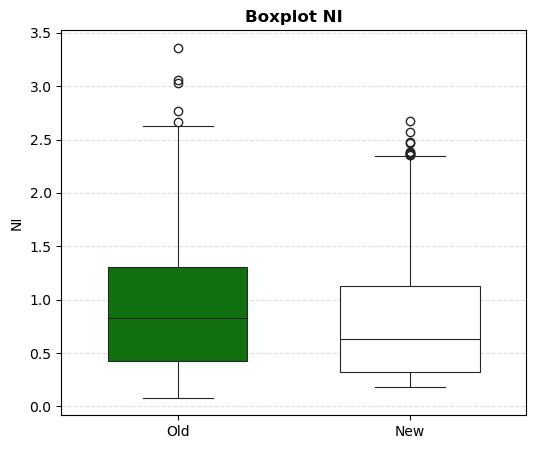

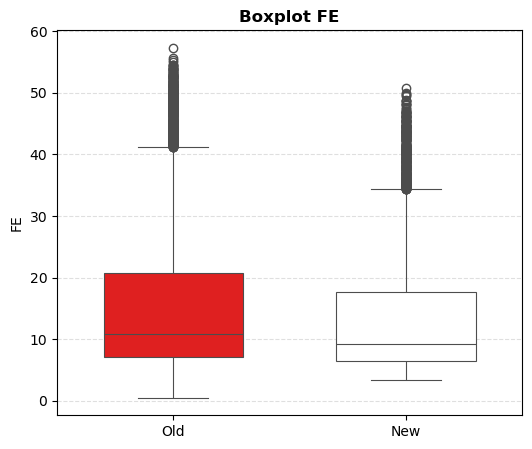

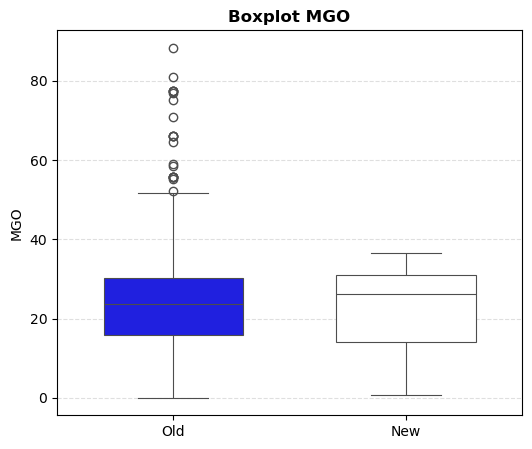

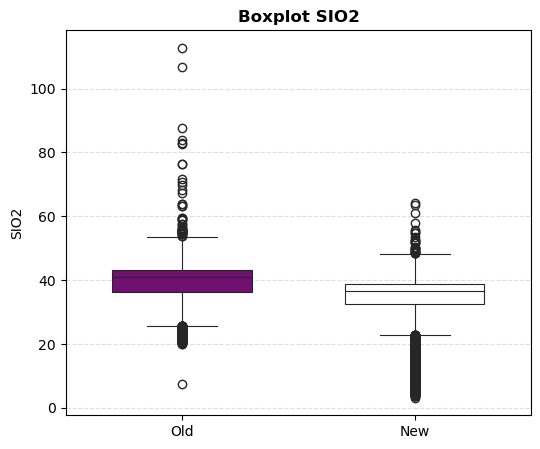

In [130]:
plot_global_stats(
    assay_old, assay_new,
    elements=elements,
    element_settings=element_settings,
    plots=("boxplot",),
    save_path="../output/distribution_plots"
)

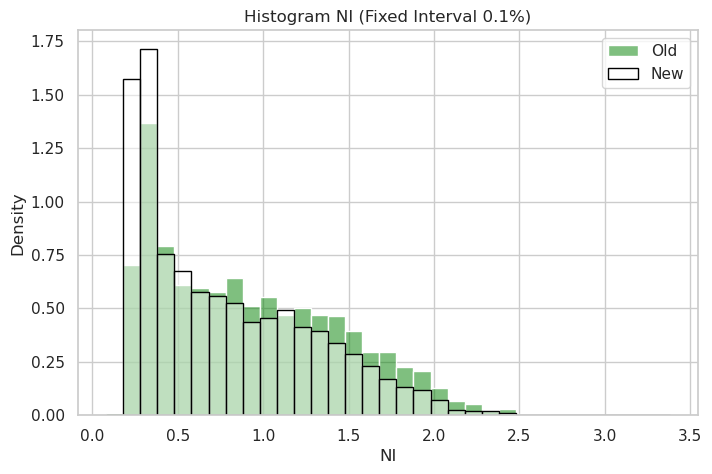

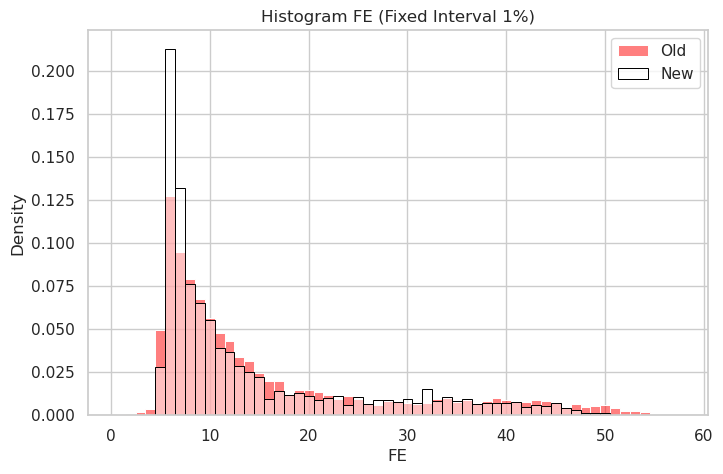

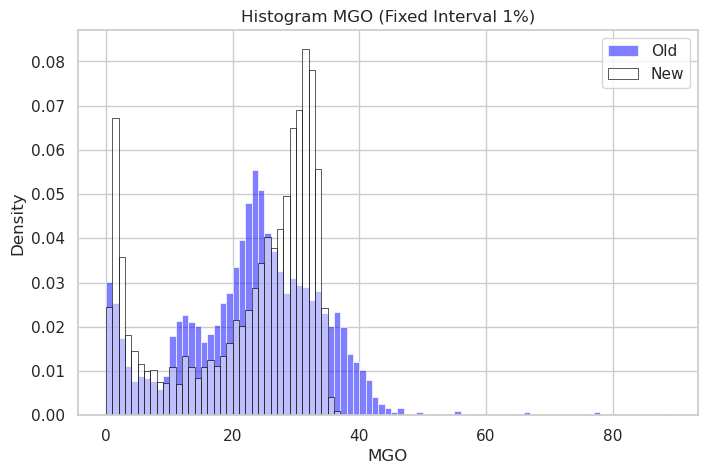

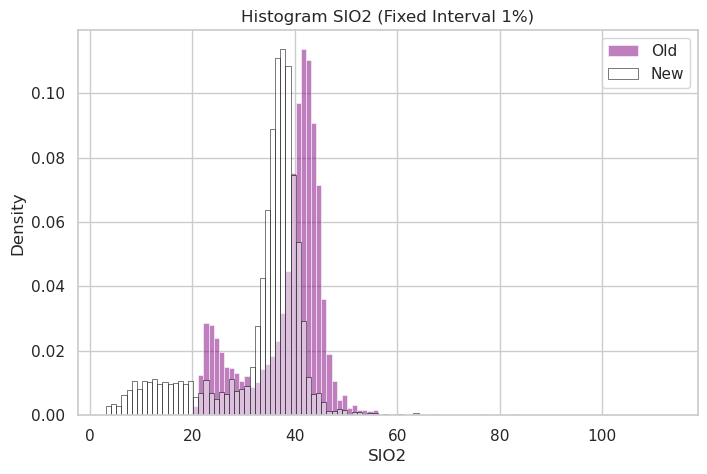

In [ ]:
# -------------------------
# Contoh pemakaian
# -------------------------
elements = ["ni", "fe", "mgo", "sio2"]

element_settings = {
    "ni": {"step": 0.1, "color": "green"},
    "fe": {"step": 1, "color": "red"},
    "mgo": {"step": 1, "color": "blue"},
    "sio2": {"step": 1, "color": "purple"},
}

plot_global_stats(
    assay_old, assay_new,
    elements=elements,
    element_settings=element_settings,
    plots=("hist",),
    save_path="../output/global_plots/"
)

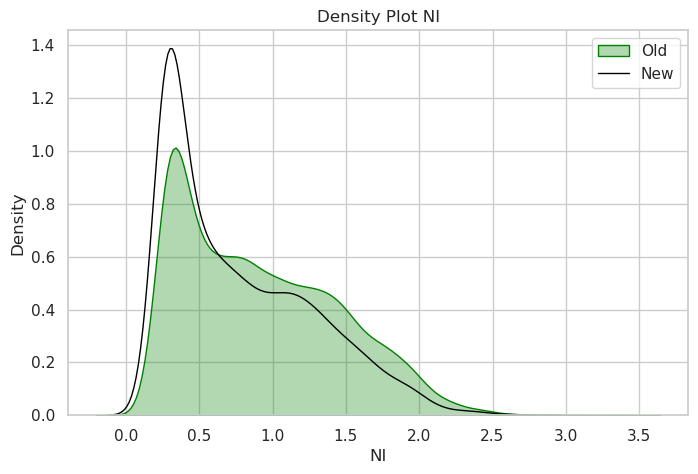

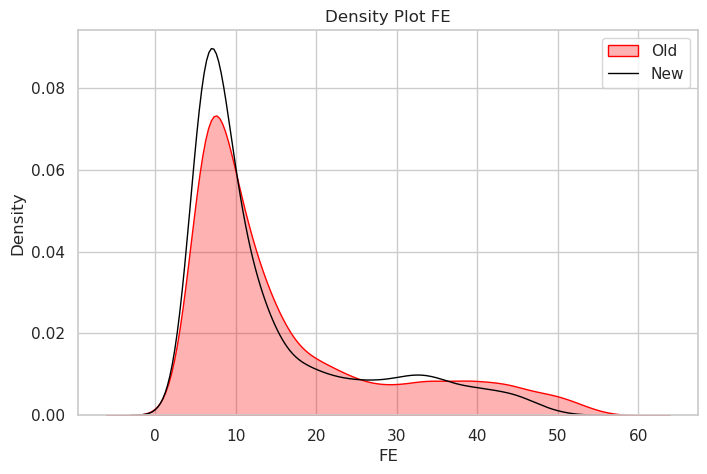

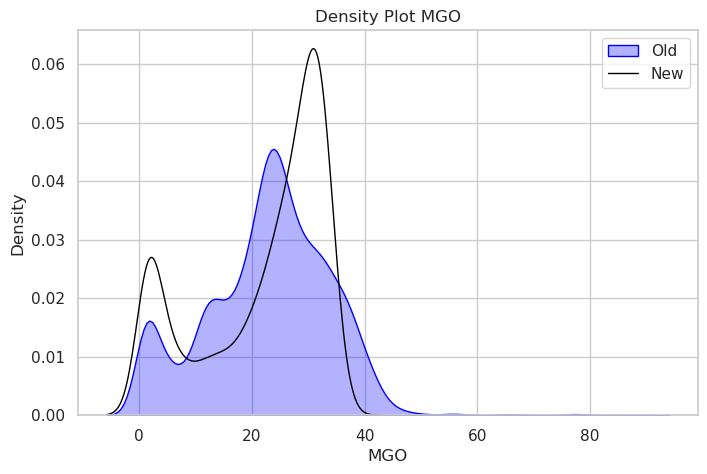

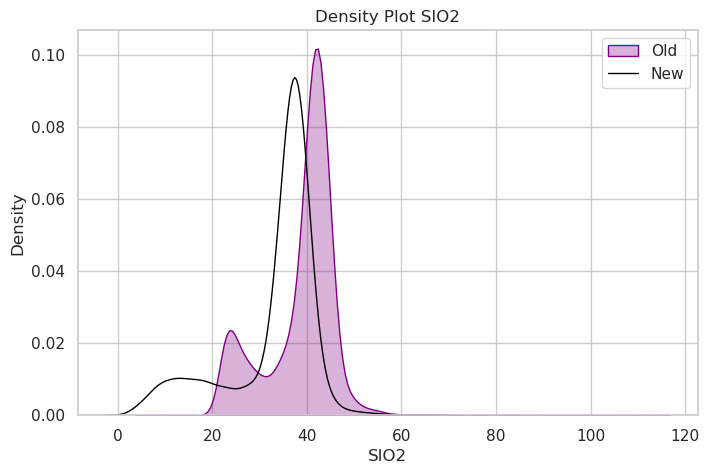

In [ ]:
elements = ["ni", "fe", "mgo", "sio2"]

element_settings = {
    "ni": {"step": 0.1, "color": "green"},
    "fe": {"step": 1, "color": "red"},
    "mgo": {"step": 1, "color": "blue"},
    "sio2": {"step": 1, "color": "purple"},
}

plot_global_stats(
    assay_old, assay_new,
    elements=elements,
    element_settings=element_settings,
    plots=("density",),
    save_path="../output/global_plots/"
)

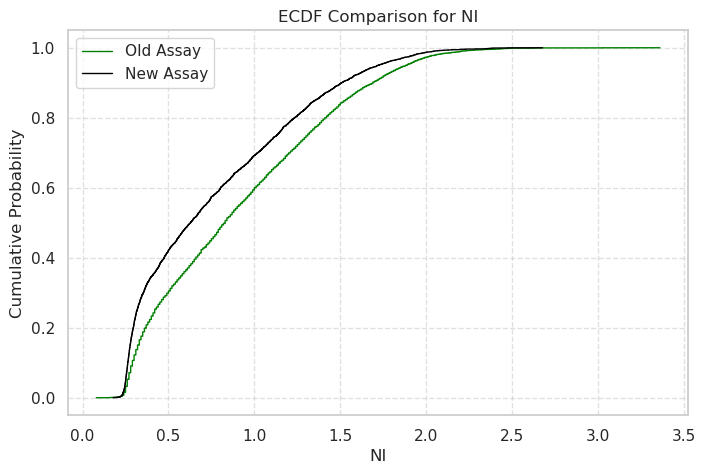

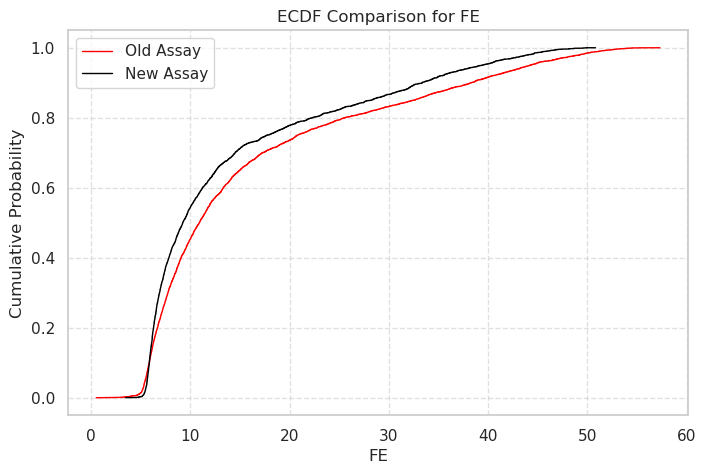

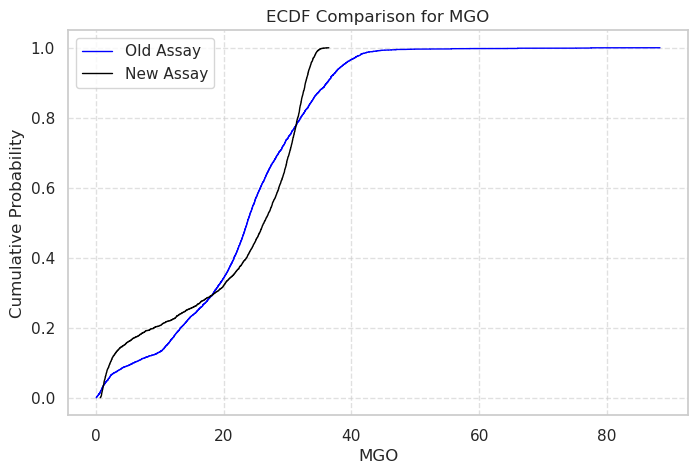

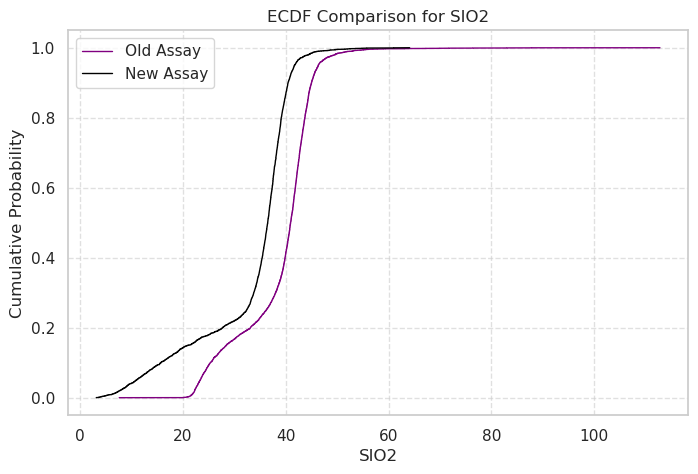

In [ ]:
elements = ["ni", "fe", "mgo", "sio2"]

element_settings = {
    "ni": {"step": 0.1, "color": "green"},
    "fe": {"step": 1, "color": "red"},
    "mgo": {"step": 1, "color": "blue"},
    "sio2": {"step": 1, "color": "purple"},
}

plot_global_stats(
    assay_old, assay_new,
    elements=elements,
    element_settings=element_settings,
    plots=("ecdf",),
    save_path="../output/global_plots/"
)

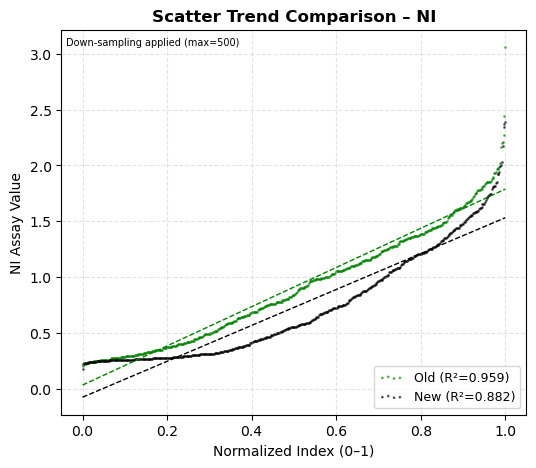

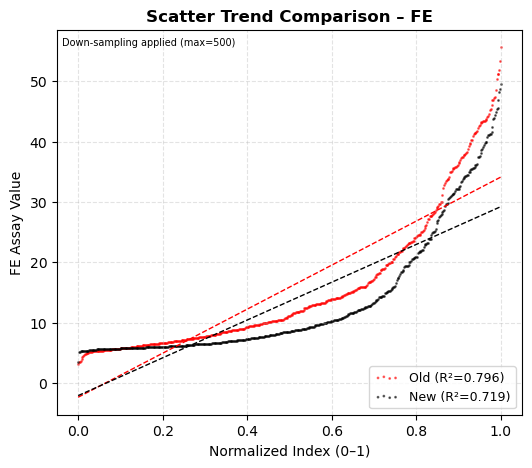

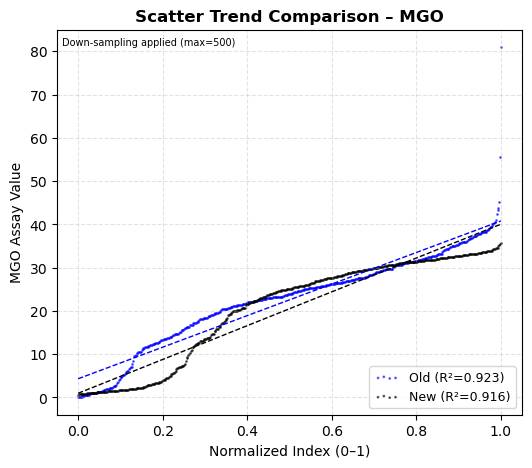

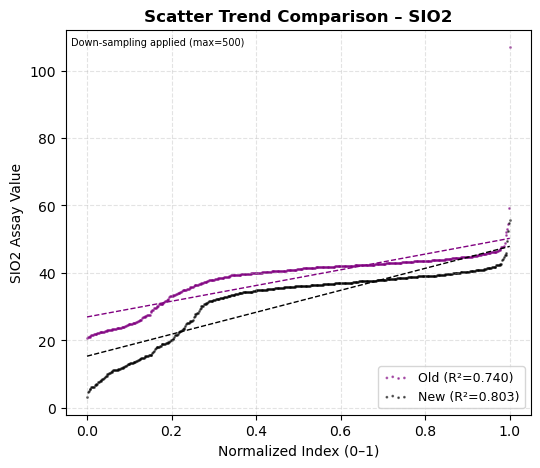

In [129]:
from scipy.stats import linregress


elements = ["ni", "fe", "mgo", "sio2"]

element_settings = {
    "ni": {"step": 0.1, "color": "green"},
    "fe": {"step": 1, "color": "red"},
    "mgo": {"step": 1, "color": "blue"},
    "sio2": {"step": 1, "color": "purple"},
}

plot_global_stats(
    assay_old, assay_new,
    elements=elements,
    element_settings=element_settings,
    plots=("scatter",),
    save_path="../output/global_plots/"
)

In [ ]:
# Statistical Test
'''
1.  Kolmogorov-Smirnov (KS) Test
    Purpose
        Mengukur apakah dua distribusi berbeda secara signifikan - 
        bukan hanya beda rata-rata, tapi bentuk distribusinya 
        juga (skewness, spread, dll)
    When it used
        Kalo kamu ingin tahu apakah assay_old dan assay_new punya
        distribusi yang sama
    Interpretation
        p < 0.05 -> distribusinya berbeda signifikan
        p >= 0.05 -> tdk ada bukti beda signifikan
    
2.  Mann-Whitney U Test (Wilcoxon Rank-Sum)
    Purpose
        Menguji apakah median dua populasi berbeda secara signifikan
        Tdk butuh asumsi normalitas, cocok utk data geologi atau 
        assay yang sering non-normal
    When it used
        Kalo kamu ingin tahu apakah median berbeda signifikan, tanpa
        mengasumsikan data normal
    Interpretation
        p < 0.05 -> median berbeda signifikan
        p >= 0.05 -> median tidak signifikan

3.  Levene's Test
    Purpose
        Mengukur apakah varian (keragaman) dua kelompok berbeda
        secara signifikan. Ini penting buat tahu apakah salah satu
        dataset lebih "tersebar" (lebih tidak konsisten)
    When it used
        Kalo kamu ingin tahu apakah "assay_new" punya variabilitas
        yang sama atau lebih tinggi dari "assay_old"
    Interpretation
        p < 0.05 -> varians berbeda signifikan
        p >= 0.05 -> varians mirip (homogen)

4.  Effect Size (Cliff's Delta / Cohen's d)
    Purpose
        Mengukur sebesara besar perbedaan antara dua group - bukan
        hanya apakah signifikan. Karena "signifikan" tdk selalu
        berarti "penting secara praktis". P-value menjawab apakah
        ada perbedaan, maka effect size menjawab "seberapa besar 
        perbedaannya"
    Common type:
        Cohen's d -> utk data mendekati normal
        Cliff's Delta -> utk data non-parametrik (lebih cocok utk
        assay geologi)
    Interpretation
        0.000 - 0.147 -> Neigligble
        0.147 - 0.330 -> small
        0.330 - 0.474 -> medium
        >= 0.474 -> large

5.  Bootstrap Confidence Interval
    Purpose
        Mengestimasi ketidakpastian (confidence interval) dari
        perbedaan rata - rata / median antara dua dataset melalui
        resampling ribuan kali
    When it used
        Kalo kamu ingin tahu "berapa besar perbedaan rata - rata 
        antara old dan new, dengan kepercayaan 95%?"
    Interpretation
        Jika CI tdk melewati 0 (nol), maka perbedaan signifikan

Source.
📖 Daftar Pustaka

Efron, B., & Tibshirani, R. J. (1993). An Introduction to the Bootstrap. Chapman & Hall/CRC.
→ Referensi utama untuk metode bootstrap resampling dan confidence interval.

Conover, W. J. (1999). Practical Nonparametric Statistics (3rd ed.). John Wiley & Sons.
→ Sumber klasik untuk Mann–Whitney U test, Kolmogorov–Smirnov test, dan uji nonparametrik lainnya.

Levene, H. (1960). Robust tests for equality of variances. In I. Olkin (Ed.), Contributions to Probability and Statistics: Essays in Honor of Harold Hotelling (pp. 278–292). Stanford University Press.
→ Sumber asli dari Levene’s Test untuk homogenitas varians.

Cohen, J. (1988). Statistical Power Analysis for the Behavioral Sciences (2nd ed.). Lawrence Erlbaum Associates.
→ Referensi utama untuk effect size (Cohen’s d, r, dan lainnya).

NIST/SEMATECH. (2012). e-Handbook of Statistical Methods. National Institute of Standards and Technology.
Retrieved from https://www.itl.nist.gov/div898/handbook/

'''


'''
1.  Shapiro-Wilk Test
    Used to: 
        Mengevaluasi apakah data terdistribusi normal ? (sampel < 5000)
    Interpretation:
        stat (W): 1.0 -> distribusi mendekati normal
        stat (W): 0.95 - 0.99 -> hampir normal, sedikit deviasi
        stat (W): <0.95 -> deviasi nyata dari normalitas
        p < 0.05 -> data tdk normal (tolak H0)
        p >= 0.05 -> data normal (gagal tolak H0)
        Example:
            Nilai stat (W) = 0.972 dan p = 0.082 menunjukkan distribusi tdk ber-
            beda signifikan dari normal, sehingga data dapat dianggap normal

2.  D'Agostino-Pearson Test
    Used to:
        Uji normalitas utk sampel besar (n > 5000), menggabungkan skewness &
        kurtosis
    Interpretation:
        stat (K^2): 0 -> Distribusi mendekati normal
        stat (K^2): kecil (0 - 2) -> Distribusi sangat mendekati normal
        stat (K^2): sedang (2 - 6) -> Ada sedikit deviasi (skewness atau kurtosis ringan)
        stat (K^2): besar (6 - 9) -> Deviasi nyata dari normalitas
        stat (K^2): sangat besar (9 >=) -> Distribusi jauh dari normal
        p < 0.05 -> Data tdk normal
        p >= 0.05 -> Data normal
        Example:
            Nilai stat 62.34 jauh melebihi batas kritis distribusi chi-square, 
            dengan p-value - menunjukkan data sangat tdk normal

3.  Levene's Test
    Used to:
        Menguji kesamaan varians antara dua dataset
    Interpretation:
        p < 0.05 -> varians berbeda signifikan (tdk homogen)
        p >= 0.05 -> varians mirip / homogen
'''

import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

# -------------------------------
# Statistical Test Selector
# -------------------------------
def run_statistical_test(data1, data2, normal1, normal2, homogeneous, alpha=0.05):
    if normal1 and normal2:
        # Parametric
        if homogeneous:
            test_name = "t-test (independent)"
            stat, p = stats.ttest_ind(data1, data2, equal_var=True)
        else:
            test_name = "Welch's t-test"
            stat, p = stats.ttest_ind(data1, data2, equal_var=False)
    else:
        # Non-parametric
        test_name = "Mann–Whitney U"
        stat, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')

    return {"test": test_name, "stat": stat, "p_value": p, "significant": p < alpha}

# -------------------------------
# Effect Size
# -------------------------------
def compute_effect_size(data1, data2, normal=True):
    if normal:
        # Cohen's d
        n1, n2 = len(data1), len(data2)
        s1, s2 = np.var(data1, ddof=1), np.var(data2, ddof=1)
        pooled_std = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
        d = (np.mean(data1) - np.mean(data2)) / pooled_std
        measure = "Cohen's d"
        value = d
    else:
        # Cliff’s delta
        from itertools import product
        more = sum(x > y for x, y in product(data1, data2))
        less = sum(x < y for x, y in product(data1, data2))
        delta = (more - less) / (len(data1) * len(data2))
        measure = "Cliff's delta"
        value = delta

    return {"measure": measure, "value": value}

# -------------------------------
# Bootstrap Confidence Interval
# -------------------------------
def bootstrap_ci(data, n_bootstrap=10000, ci=95, func=np.mean):
    np.random.seed(42)
    boot_means = [func(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
    lower = np.percentile(boot_means, (100 - ci) / 2)
    upper = np.percentile(boot_means, 100 - (100 - ci) / 2)
    return {"ci": ci, "lower": lower, "upper": upper}

# -------------------------------
# Analyze Single Element
# -------------------------------
def analyze_element(assay_old, assay_new, element, alpha=0.05):
    x = assay_old[element].dropna()
    y = assay_new[element].dropna()

    # Step 1: Normality
    norm_old = check_normality(x)
    norm_new = check_normality(y)

    # Step 2: Homogeneity
    homogeneity = check_variance_homogeneity(x, y)

    # Step 3: Statistical Test
    test_result = run_statistical_test(
        x, y,
        normal1=norm_old["is_normal"],
        normal2=norm_new["is_normal"],
        homogeneous=homogeneity["is_homogeneous"]
    )

    # Step 4: Effect Size
    eff = compute_effect_size(x, y, normal=(norm_old["is_normal"] and norm_new["is_normal"]))

    # Step 5: Bootstrap CI
    ci_old = bootstrap_ci(x)
    ci_new = bootstrap_ci(y)

    # Combine all results
    return {
        "Element": element.upper(),
        "Normal (Old)": norm_old["is_normal"],
        "Normal (New)": norm_new["is_normal"],
        "Homogeneous Var": homogeneity["is_homogeneous"],
        "Test Used": test_result["test"],
        "p-value": round(test_result["p_value"], 4),
        "Significant?": test_result["p_value"] < alpha,
        "Effect Size": f"{eff['measure']} = {eff['value']:.3f}",
        "95% CI Old": f"[{ci_old['lower']:.3f}, {ci_old['upper']:.3f}]",
        "95% CI New": f"[{ci_new['lower']:.3f}, {ci_new['upper']:.3f}]"
    }

# -------------------------------
# Wrapper for All Elements
# -------------------------------
def compare_assay_datasets(assay_old, assay_new, elements, alpha=0.05):
    results = []
    for elem in tqdm(elements, desc="Comparing elements"):
        res = analyze_element(assay_old, assay_new, elem, alpha)
        results.append(res)

    df_result = pd.DataFrame(results)
    return df_result


In [ ]:
## B. Mean Ratio & Median Ratio
'''
Fungsi / Tujuan:
Mengukur bias antar dataset
    Kalau ratio ~ 1.0 → distribusi antara dataset lama & baru mirip
    Kalau ratio > 1.0 → dataset baru cenderung punya nilai lebih tinggi
    Kalau ratio < 1.0 → dataset baru cenderung lebih rendah
Median ratio lebih robust terhadap outlier
    Kalau data punya outlier ekstrem, mean ratio bisa “terseret”
    Median ratio lebih stabil
Dipakai di QAQC geologi/mineral
    Misalnya bandingkan lab lama vs lab baru
    Bandingkan primary assay vs umpire lab
    Untuk memvalidasi apakah hasil assay konsisten
'''

def calculate_ratios(assay_old, assay_new, elements):
    """
    Hitung mean ratio & median ratio antara dataset lama dan baru.

    Parameters
    ----------
    assay_old : pd.DataFrame
        Dataset lama
    assay_new : pd.DataFrame
        Dataset baru
    elements : list
        Daftar kolom elemen kimia

    Returns
    -------
    pd.DataFrame
        Ringkasan mean & median ratio untuk tiap elemen
    """
    results = []

    for elem in elements:
        mean_old = assay_old[elem].mean()
        mean_new = assay_new[elem].mean()
        median_old = assay_old[elem].median()
        median_new = assay_new[elem].median()

        mean_ratio = mean_new / mean_old if mean_old != 0 else None
        median_ratio = median_new / median_old if median_old != 0 else None

        results.append({
            "Element": elem.upper(),
            "Mean_old": mean_old,
            "Mean_new": mean_new,
            "Mean_ratio": mean_ratio,
            "Median_old": median_old,
            "Median_new": median_new,
            "Median_ratio": median_ratio
        })

    return pd.DataFrame(results)


elements = ['ni', 'fe', 'mgo', 'sio2']
ratios = calculate_ratios(assay_old, assay_new, elements)
ratios

,Element,Mean_old,Mean_new,Mean_ratio,Median_old,Median_new,Median_ratio
0,NI,0.91,0.77,0.84,0.83,0.63,0.76
1,FE,16.23,14.26,0.88,10.89,9.23,0.85
2,MGO,22.78,22.05,0.97,23.68,26.30,1.11
3,SIO2,38.71,33.05,0.85,40.94,36.49,0.89


In [ ]:
'''
Flow Chart

Start >
Tentukan ukuran n >
    n <= 5000 ? (Shapiro-Wilk)
    n > 5000 ? (D'Agostino)
Hitung p-value
    p > 0.05 ? (normal)
    p <= 0.05 ? (tdk normal)
Hitung homogenitas varians (Levene's Test)
    p_var > 0.05 (homogen)
    p_var <= 0.05 (tdk homogen)
Statistical testing selector
    Normal, Homogen -> Independent t-test
    Normal, Tdk homogen -> Welch's t-test
    Tdk normal, Homogen -> Mann-Whitney U test
    Tdk normal, Tdk homogen -> Mann-Whitney U test
Hitung Effect Size (Cohen's d / Cliff's Δ)
    Cohen's d (standard) -> Independent t-test
    Cohen's d (adjusted) -> Welch's t-test
    Clif's Delta (Δ) -> Mann-Whitney U test
        Interpretation
                            Cohen's d   Cliff's (Δ)            
            Kecil           0.2         0.147
            Sedang          0.5         0.33
            Besar           0.8         0.474
        Note.
        Cohen's d bisa negatif jika mean grup A < grup B; Cliff's delta juga bisa negatif
        artinya arah efeknya berlawanan
Hitung Bootstrap CI (95% confidence Interval) - Bias-Corrected and Accelerated (BCa)
    Lebar CI -> 
        Mean effect
        Lebar CI                Klasifikasi         Interpretasi
        < 0.2 * mean efek       Sempit              Estimasi sangat presisi, efek stail       
        0.2 - 0.5 * mean efek   Sedang              Presisi cukup baik, hasil masih dapat dipercaya
        > 0.5 * mean efek       Lebar               Ketidakpastian tinggi, hasil tdk stabil atau n terlalu kecil
        cth.
            Mean effect = 2.5 didapat dari ((2.3 + 2.7)/2) atau ((1.0 + 4.0)/2)
            95% CI = [2.3, 2.7] -> lebar = 0.4 (0.16 * mean) => CI sempit (stabil)  
            95% CI = [1.0, 4.0] -> lebar = 3.0 (1.20 * mean) => CI lebar (tdk presisi)

    Posisi Bootstrap CI terhadap nol (0) ->
        Posisi CI terhadap 0            Interpretasi                                    Implikasi
        CI tdk melewati nol (0)         Ada perbedaan signifikan antara dua kelompok    Efeknya bermakna secara statistik
        CI melewati nol (0)             Tdk ada bukti kuat perbedaan nyata              Efek bisa jadi kecil / sampel terlalu sedikit
        CI hampir menyentuh nol (0)     Hasil borderline / marginally significant       Perlu pertimbangan ulang, mungkin butuh n lbh besar
        CI sangat lebar (melewati 0     Tdk dapat disimpulkan                           Data terlalu bervariasi / n kecil
        jauh)
        cth.
            CI = [0.2, 0.8] -> beda signifikan (tdk melewati 0)
            CI = [-0.3, 0.5] -> tdk signifikan (melewati 0)
            CI = [0.0, 0.6] -> borderline (bisa signifikan, bisa tdk)


Visualisasi Hasil (hist, density, ecdf, boxplot)
Interpretasi akhir
    - p-value (signifikansi)
    - effect size (praktis)
    - CI (ketidakpastian)
Kesimpulan akhir 
    signifikan ?
    relevan ? 
Finish >
'''

"\nFlow Chart\n\nStart >\nTentukan ukuran n >\n    n <= 5000 ? (Shapiro-Wilk)\n    n > 5000 ? (D'Agostino)\nHitung p-value\n    p > 0.05 ? (normal)\n    p <= 0.05 ? (tdk normal)\nHitung homogenitas varians (Levene's Test)\n    p_var > 0.05 (homogen)\n    p_var <= 0.05 (tdk homogen)\nStatistical testing selector\n    Normal, Homogen -> Independent t-test\n    Normal, Tdk homogen -> Welch's t-test\n    Tdk normal, Homogen -> Mann-Whitney U test\n    Tdk normal, Tdk homogen -> Mann-Whitney U test\nHitung Effect Size (Cohen's d / Cliff's Δ)\n    Cohen's d (standard) -> Independent t-test\n    Cohen's d (adjusted) -> Welch's t-test\n    Clif's Delta (Δ) -> Mann-Whitney U test\n        Interpretation\n                            Cohen's d   Cliff's (Δ)            \n            Kecil           0.2         0.147\n            Sedang          0.5         0.33\n            Besar           0.8         0.474\n        Note.\n        Cohen's d bisa negatif jika mean grup A < grup B; Cliff's delta jug

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore", message=".*scipy.stats.shapiro.*")


# ============================================================
# Fungsi bantu: uji normalitas + deteksi outlier adaptif
# ============================================================
def check_normality(series, alpha=0.05, verbose=False):
    """
    Mengecek normalitas data (Shapiro / D’Agostino–Pearson) dan mendeteksi outlier adaptif:
    - Jika data normal → Z-score (>3)
    - Jika data non-normal → IQR (1.5x)
    """
    series = series.dropna()
    n = len(series)

    # --- Uji normalitas ---
    if n <= 5000:
        method = "Shapiro-Wilk"
        stat, p = stats.shapiro(series)
    else:
        method = "D’Agostino–Pearson"
        stat, p = stats.normaltest(series)

    is_normal = p > alpha

    # --- Deteksi outlier ---
    if is_normal:
        z_scores = np.abs(stats.zscore(series))
        outlier_mask = z_scores > 3
        outlier_method = "Z-score (>3)"
    else:
        Q1, Q3 = np.percentile(series, [25, 75])
        IQR = Q3 - Q1
        outlier_mask = (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))
        outlier_method = "IQR (1.5×)"

    outlier_count = outlier_mask.sum()
    has_outlier = outlier_count > 0

    if verbose:
        print(f"{method} test (n={n}) → stat={stat:.4f}, p={p:.4e}, normal={is_normal}")
        print(f"   Outlier detection ({outlier_method}) → {outlier_count} outlier{'s' if outlier_count != 1 else ''}")

    return {
        "method": method,
        "stat": stat,
        "p_value": p,
        "is_normal": is_normal,
        "sample_size": n,
        "outlier_detected": has_outlier,
        "outlier_count": outlier_count,
        "outlier_method": outlier_method
    }


# ============================================================
# Fungsi utama: Normality + Variance Compare (VERTICAL + TABULATE)
# ============================================================
def check_normality_compare(assay_old, assay_new, columns, alpha=0.05, verbose=False, table=True):
    """
    Mengecek normalitas (Old vs New), outlier, dan homogenitas varians.
    Hasil disusun secara vertikal dan ditampilkan dalam tabel tabulate.
    """
    results = []

    for col in columns:
        if verbose:
            print(f"\n🔹 Checking {col.upper()}...")

        # --- Normality + Outlier ---
        res_old = check_normality(assay_old[col].dropna(), alpha=alpha, verbose=verbose)
        res_new = check_normality(assay_new[col].dropna(), alpha=alpha, verbose=verbose)

        # --- Homogenitas varians ---
        stat_var, p_var = stats.levene(assay_old[col].dropna(), assay_new[col].dropna())
        is_homogeneous = p_var > alpha

        # --- Rekomendasi uji statistik ---
        if res_old["is_normal"] and res_new["is_normal"]:
            if is_homogeneous:
                final_recommend = "Independent t-test"
            else:
                final_recommend = "Welch’s t-test"
        else:
            final_recommend = "Mann–Whitney U test"

        # --- Simpan hasil (VERTIKAL FORMAT) ---
        for dataset, res in zip(["Old", "New"], [res_old, res_new]):
            results.append({
                "Element": col,
                "Dataset": dataset,
                "Normality Method": res["method"],
                "Stat": round(res["stat"], 4),
                "p-value": round(res["p_value"], 4),
                "Normal": "✅" if res["is_normal"] else "❌",
                "Outlier Method": res["outlier_method"],
                "Outlier Count": res["outlier_count"],
                "n": res["sample_size"],
                "Variance Stat (W)": round(stat_var, 4),
                "Variance p": round(p_var, 4),
                "Homogeneous": "✅" if is_homogeneous else "❌",
                "Recommended Test": final_recommend
            })

        if verbose:
            print(f"   Variance p={p_var:.4f}, homogeneous={is_homogeneous}")
            print(f"   ✅ Recommended: {final_recommend}")

    df_results = pd.DataFrame(results)

    # --- Optional: tampilkan tabel rapi ---
    if table:
        print("\n📋 Hasil Uji Normalitas, Outlier, & Homogenitas")
        print(tabulate(df_results, headers="keys", tablefmt="github", showindex=False))

    return df_results


In [ ]:
columns = ["ni", "fe", "mgo", "sio2"]

results_df = check_normality_compare(
    assay_old,
    assay_new,
    columns,
    alpha=0.05,
    verbose=False,   # menampilkan proses detail
    table=True      # menampilkan hasil dalam tabel
)



📋 Hasil Uji Normalitas, Outlier, & Homogenitas
| Element   | Dataset   | Normality Method   |      Stat |   p-value | Normal   | Outlier Method   |   Outlier Count |    n |   Variance Stat (W) |   Variance p | Homogeneous   | Recommended Test    |
|-----------|-----------|--------------------|-----------|-----------|----------|------------------|-----------------|------|---------------------|--------------|---------------|---------------------|
| ni        | Old       | D’Agostino–Pearson |  402.098  |         0 | ❌       | IQR (1.5×)       |               5 | 5886 |             31.0064 |       0      | ❌            | Mann–Whitney U test |
| ni        | New       | Shapiro-Wilk       |    0.8927 |         0 | ❌       | IQR (1.5×)       |              10 | 3305 |             31.0064 |       0      | ❌            | Mann–Whitney U test |
| fe        | Old       | D’Agostino–Pearson | 1126.1    |         0 | ❌       | IQR (1.5×)       |             443 | 5886 |             39.3779 |      

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from tabulate import tabulate

def stat_test_selector_df(assay_old, assay_new, columns, test_type="ind_ttest", alpha=0.05, table=True):
    """
    Membandingkan dua dataset (assay_old vs assay_new) untuk beberapa elemen.
    User dapat memilih jenis uji statistik yang digunakan:
        - "ind_ttest"   : Independent t-test (normal & homogen)
        - "welch_ttest" : Welch's t-test (normal tapi tidak homogen)
        - "mann_utest"  : Mann–Whitney U test (non-parametrik)
    
    Parameters:
    -----------
    assay_old, assay_new : pandas.DataFrame
        Dua dataset yang akan dibandingkan.
    columns : list
        Daftar nama kolom/elemen yang akan diuji.
    test_type : str
        Jenis uji statistik yang digunakan.
    alpha : float
        Tingkat signifikansi (default 0.05)
    table : bool
        Jika True → menampilkan tabel hasil di console.
    
    Returns:
    --------
    pd.DataFrame : ringkasan hasil per elemen.
    """
    results = []

    for col in columns:
        x = assay_old[col].dropna()
        y = assay_new[col].dropna()

        # Pilih jenis test
        if test_type == "ind_ttest":
            stat, p = stats.ttest_ind(x, y, equal_var=True)
            test_name = "Independent t-test"
        elif test_type == "welch_ttest":
            stat, p = stats.ttest_ind(x, y, equal_var=False)
            test_name = "Welch’s t-test"
        elif test_type == "mann_utest":
            stat, p = stats.mannwhitneyu(x, y, alternative='two-sided')
            test_name = "Mann–Whitney U test"
        else:
            raise ValueError("test_type harus salah satu dari ['ind_ttest', 'welch_ttest', 'mann_utest']")

        # Interpretasi hasil
        result = "Signifikan (H₁ diterima)" if p < alpha else "Tidak signifikan (H₀ diterima)"

        results.append({
            "Element": col,
            "Test Used": test_name,
            "Statistic": round(stat, 4),
            "p-value": round(p, 6),
            "n_old": len(x),
            "n_new": len(y),
            "alpha": alpha,
            "Significant?": "✅" if p < alpha else "❌",
            "Interpretation": result
        })

    df_result = pd.DataFrame(results)

    if table:
        print("\n📊 Hasil Uji Statistik —", test_name.upper())
        print(tabulate(df_result, headers="keys", tablefmt="github", showindex=False))

    return df_result

df_welch = stat_test_selector_df(
    assay_old, assay_new, 
    ["ni", "fe", "mgo", "sio2"], 
    test_type="mann_utest" #['ind_ttest', 'welch_ttest', 'mann_utest']
)


📊 Hasil Uji Statistik — MANN–WHITNEY U TEST
| Element   | Test Used           |   Statistic |   p-value |   n_old |   n_new |   alpha | Significant?   | Interpretation                 |
|-----------|---------------------|-------------|-----------|---------|---------|---------|----------------|--------------------------------|
| ni        | Mann–Whitney U test | 1.13966e+07 |  0        |    5886 |    3305 |    0.05 | ✅             | Signifikan (H₁ diterima)       |
| fe        | Mann–Whitney U test | 1.07422e+07 |  0        |    5886 |    3305 |    0.05 | ✅             | Signifikan (H₁ diterima)       |
| mgo       | Mann–Whitney U test | 9.50736e+06 |  0.072471 |    5886 |    3305 |    0.05 | ❌             | Tidak signifikan (H₀ diterima) |
| sio2      | Mann–Whitney U test | 1.43544e+07 |  0        |    5886 |    3305 |    0.05 | ✅             | Signifikan (H₁ diterima)       |


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap
from tabulate import tabulate

# === 1️⃣ Cohen’s d (standard, untuk data normal & homogen) ===
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

# === 2️⃣ Cohen’s d (adjusted, untuk data normal tapi tidak homogen) ===
def cohens_d_adjusted(x, y):
    s1, s2 = np.var(x, ddof=1), np.var(y, ddof=1)
    pooled_std = np.sqrt((s1 + s2) / 2)
    return (np.mean(x) - np.mean(y)) / pooled_std

# === 3️⃣ Cliff’s Delta (untuk data non-normal / ordinal / banyak outlier) ===
def cliffs_delta(x, y):
    n1, n2 = len(x), len(y)
    more = sum(i > j for i in x for j in y)
    less = sum(i < j for i in x for j in y)
    delta = (more - less) / (n1 * n2)
    return delta

# === 4️⃣ Bootstrap Confidence Interval (Bias-Corrected and Accelerated) ===
import numpy as np
from joblib import Parallel, delayed

# === Bootstrap Confidence Interval (optimized) ===
def bootstrap_ci(stat_func, x, y, n_resamples=1000, ci=95, n_jobs=-1, random_state=None):
    """
    Hitung Bootstrap CI untuk effect size dengan versi cepat dan paralel.
    
    Parameters:
    ----------
    stat_func : function
        Fungsi statistik yang akan digunakan (misal cohens_d, cliffs_delta, dst)
    x, y : array-like
        Dua sampel yang dibandingkan
    n_resamples : int, default=1000
        Jumlah bootstrap resampling
    ci : int, default=95
        Confidence interval (misal 95 untuk 95%)
    n_jobs : int, default=-1
        Jumlah core CPU yang digunakan (-1 = semua core)
    random_state : int or None
        Untuk hasil reproducible

    Returns:
    --------
    ci_low, ci_high : float
        Batas bawah dan atas CI bootstrap
    """

    rng = np.random.default_rng(random_state)
    n_x, n_y = len(x), len(y)

    # --- Gunakan parallel processing untuk mempercepat perhitungan ---
    boot_values = Parallel(n_jobs=n_jobs, prefer="threads")(
        delayed(stat_func)(
            rng.choice(x, n_x, replace=True),
            rng.choice(y, n_y, replace=True)
        )
        for _ in range(n_resamples)
    )

    # --- Hitung percentile CI ---
    alpha = (100 - ci) / 2
    ci_low, ci_high = np.percentile(boot_values, [alpha, 100 - alpha])

    return ci_low, ci_high


# === 5️⃣ Interpretasi effect size ===
def interpret_effect(method, value):
    value = abs(value)
    if method.startswith("cohen"):
        if value < 0.2: return "Kecil"
        elif value < 0.5: return "Sedang"
        elif value < 0.8: return "Besar"
        else: return "Sangat Besar"
    elif method == "cliffs_delta":
        if value < 0.147: return "Kecil"
        elif value < 0.33: return "Sedang"
        elif value < 0.474: return "Besar"
        else: return "Sangat Besar"

# === 6️⃣ Interpretasi Confidence Interval (posisi terhadap 0) ===
def interpret_ci(ci_low, ci_high):
    if ci_low > 0 or ci_high < 0:
        return "Efek signifikan (tidak mencakup 0)"
    elif ci_low == 0 or ci_high == 0:
        return "Borderline signifikan"
    else:
        return "Efek tidak signifikan (CI mencakup 0)"

# === 7️⃣ Fungsi utama (wrapper) ===
def effect_size_analysis(df1, df2, columns, method="auto", bootstrap_ci_enable=True, n_resamples=1000):
    results = []

    for col in columns:
        x, y = df1[col].dropna(), df2[col].dropna()
        mean_effect = np.mean(x) - np.mean(y)

        # --- Pemilihan metode otomatis atau manual ---
        if method == "auto":
            if len(x) > 30 and len(y) > 30:
                m = "cohen_standard"
            else:
                m = "cliffs_delta"
        else:
            m = method

        # --- Hitung effect size ---
        if m == "cohen_standard":
            val = cohens_d(x, y)
            stat_func = cohens_d
        elif m == "cohen_adjusted":
            val = cohens_d_adjusted(x, y)
            stat_func = cohens_d_adjusted
        elif m == "cliffs_delta":
            val = cliffs_delta(x, y)
            stat_func = cliffs_delta
        else:
            raise ValueError("Metode tidak dikenali")

        # --- Interpretasi effect size ---
        interpretasi = interpret_effect(m, val)

        # --- Hitung Bootstrap CI (opsional) ---
        if bootstrap_ci_enable:
            ci_low, ci_high = bootstrap_ci(stat_func, x, y, n_resamples=n_resamples)
            ci_interpret = interpret_ci(ci_low, ci_high)
        else:
            ci_low, ci_high, ci_interpret = np.nan, np.nan, "-"

        # --- Simpan hasil ---
        results.append([
            col, m, round(mean_effect, 3), round(val, 3),
            interpretasi, f"[{ci_low:.3f}, {ci_high:.3f}]" if bootstrap_ci_enable else "-",
            ci_interpret
        ])

    # === Tampilkan hasil dalam tabel yang rapi ===
    print("\n📊 HASIL ANALISIS EFFECT SIZE")
    print(tabulate(
        results,
        headers=[
            "Kolom", "Metode", "Mean Effect", "Effect Size",
            "Interpretasi", "95% CI", "Interpretasi CI"
        ],
        tablefmt="github",
        floatfmt=".3f"
    ))

    # Return dataframe hasil untuk analisis lanjutan
    return pd.DataFrame(results, columns=[
        "Kolom", "Metode", "Mean Effect", "Effect Size",
        "Interpretasi", "95% CI", "Interpretasi CI"
    ])


In [ ]:
import numpy as np
from tabulate import tabulate
from concurrent.futures import ThreadPoolExecutor, as_completed

# === 1️⃣ Effect Size Functions ===
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

def cliffs_delta(x, y):
    x, y = np.array(x), np.array(y)
    n_x, n_y = len(x), len(y)
    diffs = np.subtract.outer(x, y)
    return (np.sum(diffs > 0) - np.sum(diffs < 0)) / (n_x * n_y)

# === 2️⃣ Interpretation (English) ===
def interpret_effect(method, value):
    if "cohen" in method:
        if abs(value) < 0.2: return "Small"
        elif abs(value) < 0.5: return "Medium"
        else: return "Large"
    else:  # Cliff's Delta thresholds
        if abs(value) < 0.147: return "Small"
        elif abs(value) < 0.33: return "Medium"
        else: return "Large"

def interpret_ci(ci_low, ci_high):
    return "Significant" if ci_low > 0 or ci_high < 0 else "Not Significant"

# === 3️⃣ Fast Bootstrap CI ===
def bootstrap_ci_fast(stat_func, x, y, n_resamples=300, alpha=0.05):
    x, y = np.array(x), np.array(y)
    nx, ny = len(x), len(y)
    x_idx = np.random.randint(0, nx, (n_resamples, nx))
    y_idx = np.random.randint(0, ny, (n_resamples, ny))
    x_samples = x[x_idx]
    y_samples = y[y_idx]

    if stat_func == cohens_d:
        x_mean, y_mean = x_samples.mean(1), y_samples.mean(1)
        x_var, y_var = x_samples.var(1, ddof=1), y_samples.var(1, ddof=1)
        pooled_std = np.sqrt(((nx - 1)*x_var + (ny - 1)*y_var) / (nx + ny - 2))
        boot_stats = (x_mean - y_mean) / pooled_std
    else:
        boot_stats = np.array([stat_func(x_samples[i], y_samples[i]) for i in range(n_resamples)])

    ci_low, ci_high = np.percentile(boot_stats, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    return ci_low, ci_high

# === 4️⃣ Worker per column ===
def analyze_column(col, df1, df2, method, bootstrap_ci_enable, n_resamples):
    x, y = df1[col].dropna(), df2[col].dropna()
    mean_effect = np.mean(x) - np.mean(y)

    # Auto method selection
    if method == "auto":
        m = "cohen_standard" if len(x) > 30 and len(y) > 30 else "cliffs_delta"
    else:
        m = method

    stat_func = cohens_d if "cohen" in m else cliffs_delta
    val = stat_func(x, y)
    interpretation = interpret_effect(m, val)

    if bootstrap_ci_enable:
        ci_low, ci_high = bootstrap_ci_fast(stat_func, x, y, n_resamples=n_resamples)
        ci_interpret = interpret_ci(ci_low, ci_high)
        ci_text = f"[{ci_low:.3f}, {ci_high:.3f}]"
    else:
        ci_text, ci_interpret = "-", "-"

    return [col, m, round(mean_effect, 3), round(val, 3), interpretation, ci_text, ci_interpret]

# === 5️⃣ Main Parallel Function ===
def effect_size_analysis_parallel(df1, df2, columns, method="auto",
                                  bootstrap_ci_enable=True, n_resamples=300, n_jobs=None):
    print("⏳ Running Effect Size Analysis (Parallel Mode)...")
    results = []

    n_jobs = n_jobs or min(len(columns), 8)

    with ThreadPoolExecutor(max_workers=n_jobs) as executor:
        futures = {
            executor.submit(analyze_column, col, df1, df2, method,
                            bootstrap_ci_enable, n_resamples): col
            for col in columns
        }

        for future in as_completed(futures):
            results.append(future.result())

    # Sort results back to original order
    results.sort(key=lambda x: columns.index(x[0]))

    # ✅ English table output
    print("\n📊 EFFECT SIZE ANALYSIS RESULTS (FAST PARALLEL MODE)")
    print(tabulate(
        results,
        headers=["Column", "Method", "Mean Effect", "Effect Size", "Magnitude",
                 "95% CI", "CI Significance"],
        tablefmt="github",
        floatfmt=".3f"
    ))


In [ ]:
effect_size_analysis_parallel(
    assay_old, assay_new,
    columns=["ni", "fe", "mgo", "sio2"],
    method="cliffs_delta",
    bootstrap_ci_enable=True,
    n_resamples=1000  # fast and stable
)

⏳ Running Effect Size Analysis (Parallel Mode)...

📊 EFFECT SIZE ANALYSIS RESULTS (FAST PARALLEL MODE)
| Column   | Method       |   Mean Effect |   Effect Size | Magnitude   | 95% CI          | CI Significance   |
|----------|--------------|---------------|---------------|-------------|-----------------|-------------------|
| ni       | cliffs_delta |         0.144 |         0.172 | Medium      | [0.149, 0.196]  | Significant       |
| fe       | cliffs_delta |         1.974 |         0.104 | Small       | [0.080, 0.129]  | Significant       |
| mgo      | cliffs_delta |         0.722 |        -0.023 | Small       | [-0.046, 0.003] | Not Significant   |
| sio2     | cliffs_delta |         5.654 |         0.476 | Large       | [0.455, 0.495]  | Significant       |


Saved flowchart to: /home/achmad/Projects/data_analyst/EDA_for_NickelExploration/notebooks/Data_Preparation_3_1_Flow.svg


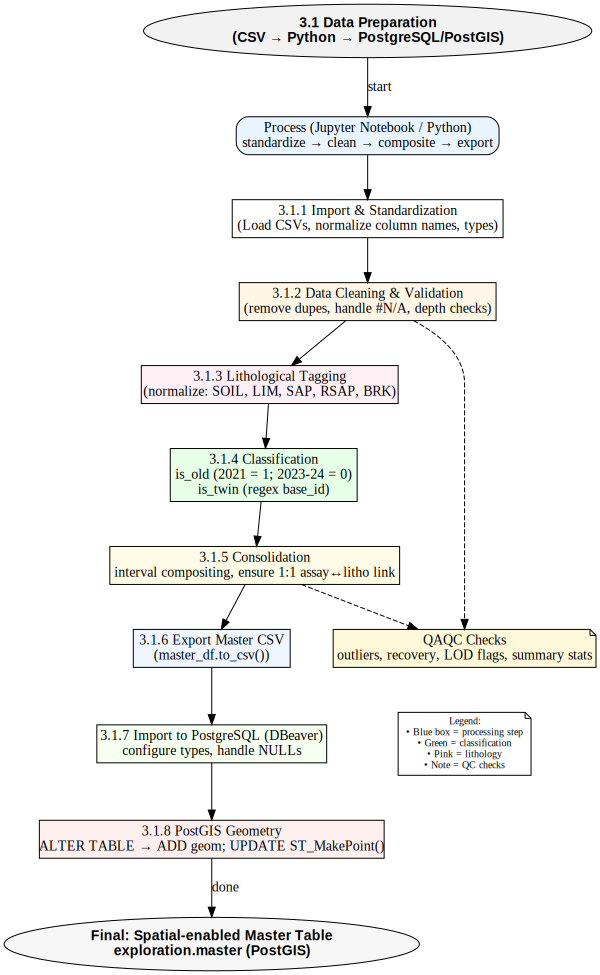

In [1]:
from graphviz import Digraph
from IPython.display import SVG, display
import os

dot = Digraph("Data_Preparation_3_1", format="svg")
dot.attr(rankdir="TB", fontsize="11", nodesep="0.6", ranksep="0.6", fontname="Helvetica")

# --- Title / start ---
dot.node("start", "3.1 Data Preparation\n(CSV → Python → PostgreSQL/PostGIS)", shape="oval",
         style="filled", fillcolor="#f2f2f2", fontname="Helvetica-Bold")

# --- Main process node (container) ---
dot.node("proc", "Process (Jupyter Notebook / Python)\nstandardize → clean → composite → export",
         shape="rect", style="rounded,filled", fillcolor="#e8f4ff")

# --- Subsections ---
dot.node("n1", "3.1.1 Import & Standardization\n(Load CSVs, normalize column names, types)", shape="box",
         style="filled", fillcolor="#ffffff")
dot.node("n2", "3.1.2 Data Cleaning & Validation\n(remove dupes, handle #N/A, depth checks)", shape="box",
         style="filled", fillcolor="#fff6e6")
dot.node("n3", "3.1.3 Lithological Tagging\n(normalize: SOIL, LIM, SAP, RSAP, BRK)", shape="box",
         style="filled", fillcolor="#fff0f6")
dot.node("n4", "3.1.4 Classification\nis_old (2021 = 1; 2023-24 = 0)\nis_twin (regex base_id)", shape="box",
         style="filled", fillcolor="#e6ffe6")
dot.node("n5", "3.1.5 Consolidation\ninterval compositing, ensure 1:1 assay↔litho link", shape="box",
         style="filled", fillcolor="#fffbe6")
dot.node("n6", "3.1.6 Export Master CSV\n(master_df.to_csv())", shape="box",
         style="filled", fillcolor="#f0f6ff")
dot.node("n7", "3.1.7 Import to PostgreSQL (DBeaver)\nconfigure types, handle NULLs", shape="box",
         style="filled", fillcolor="#f6fff0")
dot.node("n8", "3.1.8 PostGIS Geometry\nALTER TABLE → ADD geom; UPDATE ST_MakePoint()", shape="box",
         style="filled", fillcolor="#fff0f0")
dot.node("end", "Final: Spatial-enabled Master Table\nexploration.master (PostGIS)", shape="oval",
         style="filled", fillcolor="#f7f7f7", fontname="Helvetica-Bold")

# --- Edges (flow) ---
dot.edge("start", "proc", label="start")
dot.edge("proc", "n1", label="")
dot.edge("n1", "n2", label="")
dot.edge("n2", "n3", label="")
dot.edge("n3", "n4", label="")
dot.edge("n4", "n5", label="")
dot.edge("n5", "n6", label="")
dot.edge("n6", "n7", label="")
dot.edge("n7", "n8", label="")
dot.edge("n8", "end", label="done")

# --- Side-note subflows (QAQC / checks) ---
dot.node("qc", "QAQC Checks\noutliers, recovery, LOD flags, summary stats", shape="note",
         style="filled", fillcolor="#fff8d9")
dot.edge("n2", "qc", style="dashed")
dot.edge("n5", "qc", style="dashed")

# --- Add a legend ---
dot.node("legend", "Legend:\n• Blue box = processing step\n• Green = classification\n• Pink = lithology\n• Note = QC checks", shape="note", fontsize="10")
dot.edge("qc", "legend", style="invis")

# Render and display SVG in the notebook and save file
svg_bytes = dot.pipe(format="svg")
out_fname = "Data_Preparation_3_1_Flow.svg"
with open(out_fname, "wb") as f:
    f.write(svg_bytes)

print(f"Saved flowchart to: {os.path.abspath(out_fname)}")
display(SVG(svg_bytes))


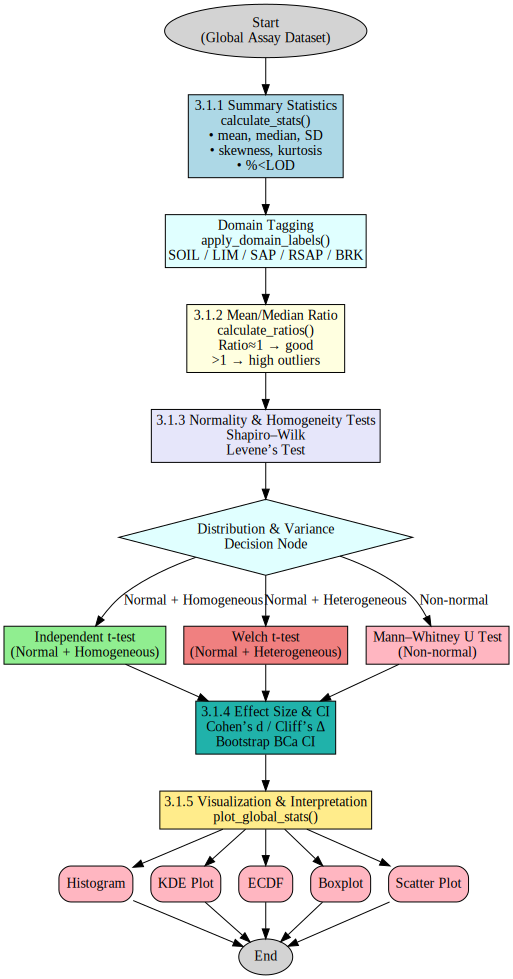

In [12]:
from graphviz import Digraph
from IPython.display import SVG, display

dot = Digraph('Global_Statistical_Analysis', format='svg')
dot.attr(rankdir='TB', size='10,40', fontname='Helvetica')

# === Start ===
dot.node('start', 'Start\n(Global Assay Dataset)', shape='ellipse', style='filled', fillcolor='lightgray')

# === 3.1.1 Summary Statistics ===
dot.node('sumstats', '3.1.1 Summary Statistics\ncalculate_stats()\n• mean, median, SD\n• skewness, kurtosis\n• %<LOD',
         shape='box', style='filled', fillcolor='lightblue')

# === Domain Tagging ===
dot.node('domain', 'Domain Tagging\napply_domain_labels()\nSOIL / LIM / SAP / RSAP / BRK',
         shape='box', style='filled', fillcolor='lightcyan')

# === 3.1.2 Mean/Median Ratio ===
dot.node('ratio', '3.1.2 Mean/Median Ratio\ncalculate_ratios()\nRatio≈1 → good\n>1 → high outliers',
         shape='box', style='filled', fillcolor='lightyellow')

# === 3.1.3 Normality & Homogeneity ===
dot.node('normtest', '3.1.3 Normality & Homogeneity Tests\nShapiro–Wilk\nLevene’s Test',
         shape='box', style='filled', fillcolor='lavender')

# === Decision Node ===
dot.node('decision', 'Distribution & Variance\nDecision Node', shape='diamond', style='filled', fillcolor='lightcyan')

# Branches to Tests
dot.node('ttest', 'Independent t-test\n(Normal + Homogeneous)', shape='box', style='filled', fillcolor='lightgreen')
dot.node('welch', 'Welch t-test\n(Normal + Heterogeneous)', shape='box', style='filled', fillcolor='lightcoral')
dot.node('mannwhitney', 'Mann–Whitney U Test\n(Non-normal)', shape='box', style='filled', fillcolor='lightpink')

# === 3.1.4 Effect Size ===
dot.node('effect', '3.1.4 Effect Size & CI\nCohen’s d / Cliff’s Δ\nBootstrap BCa CI',
         shape='box', style='filled', fillcolor='lightseagreen')

# === 3.1.5 Visualization ===
dot.node('viz', '3.1.5 Visualization & Interpretation\nplot_global_stats()',
         shape='box', style='filled', fillcolor='lightgoldenrod1')

# Visualization branches
dot.node('hist', 'Histogram', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('kde', 'KDE Plot', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('ecdf', 'ECDF', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('box', 'Boxplot', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('scatter', 'Scatter Plot', shape='box', style='rounded,filled', fillcolor='lightpink')

# === End ===
dot.node('end', 'End', shape='ellipse', style='filled', fillcolor='lightgray')


# === Connections ===
dot.edge('start', 'sumstats')
dot.edge('sumstats', 'domain')
dot.edge('domain', 'ratio')
dot.edge('ratio', 'normtest')
dot.edge('normtest', 'decision')

# Test branching
dot.edge('decision', 'ttest', label='Normal + Homogeneous')
dot.edge('decision', 'welch', label='Normal + Heterogeneous')
dot.edge('decision', 'mannwhitney', label='Non-normal')

# Merge to Effect Size
dot.edge('ttest', 'effect')
dot.edge('welch', 'effect')
dot.edge('mannwhitney', 'effect')

dot.edge('effect', 'viz')

# Visualization fan-out
dot.edge('viz', 'hist')
dot.edge('viz', 'kde')
dot.edge('viz', 'ecdf')
dot.edge('viz', 'box')
dot.edge('viz', 'scatter')

# End
dot.edge('hist', 'end')
dot.edge('kde', 'end')
dot.edge('ecdf', 'end')
dot.edge('box', 'end')
dot.edge('scatter', 'end')

svg = dot.pipe(format='svg')  # hasil SVG dalam bentuk bytes
with open('Global_Validation_Flow.svg', 'wb') as f:
    f.write(svg)

display(SVG(svg))  # tampilkan di notebook



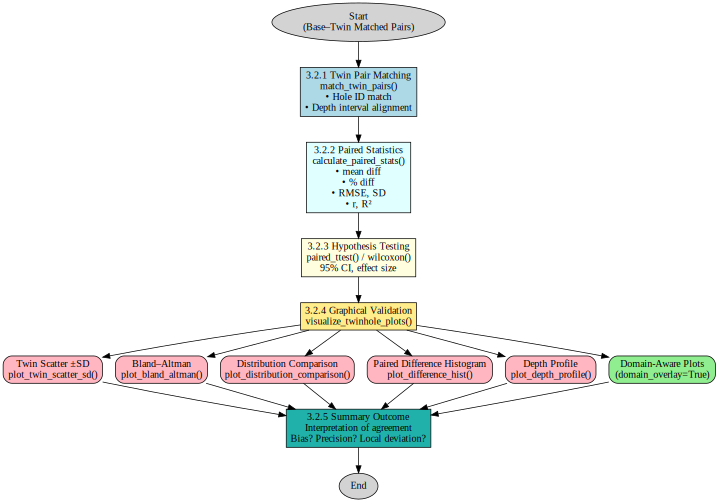

In [14]:
from graphviz import Digraph
from IPython.display import SVG, display

dot = Digraph('TwinHole_Validation', format='svg')
dot.attr(rankdir='TB', size='10,40', fontname='Helvetica')

# === Start ===
dot.node('start', 'Start\n(Base–Twin Matched Pairs)', shape='ellipse', style='filled', fillcolor='lightgray')

# === 3.2.1 Pair Matching ===
dot.node('pair', '3.2.1 Twin Pair Matching\nmatch_twin_pairs()\n• Hole ID match\n• Depth interval alignment',
         shape='box', style='filled', fillcolor='lightblue')

# === 3.2.2 Paired Statistics ===
dot.node('stats', '3.2.2 Paired Statistics\ncalculate_paired_stats()\n• mean diff\n• % diff\n• RMSE, SD\n• r, R²',
         shape='box', style='filled', fillcolor='lightcyan')

# === 3.2.3 Hypothesis Testing ===
dot.node('test', '3.2.3 Hypothesis Testing\npaired_ttest() / wilcoxon()\n95% CI, effect size',
         shape='box', style='filled', fillcolor='lightyellow')

# === 3.2.4 Graphical Validation ===
dot.node('viz', '3.2.4 Graphical Validation\nvisualize_twinhole_plots()',
         shape='box', style='filled', fillcolor='lightgoldenrod1')

# visualization modules
dot.node('scatter', 'Twin Scatter ±SD\nplot_twin_scatter_sd()', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('bland', 'Bland–Altman\nplot_bland_altman()', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('dist', 'Distribution Comparison\nplot_distribution_comparison()', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('diff', 'Paired Difference Histogram\nplot_difference_hist()', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('depth', 'Depth Profile\nplot_depth_profile()', shape='box', style='rounded,filled', fillcolor='lightpink')
dot.node('domain', 'Domain-Aware Plots\n(domain_overlay=True)', shape='box', style='rounded,filled', fillcolor='lightgreen')

# === 3.2.5 Summary Outcome ===
dot.node('summary', '3.2.5 Summary Outcome\nInterpretation of agreement\nBias? Precision? Local deviation?',
         shape='box', style='filled', fillcolor='lightseagreen')

dot.node('end', 'End', shape='ellipse', style='filled', fillcolor='lightgray')

# === Connections ===
dot.edge('start', 'pair')
dot.edge('pair', 'stats')
dot.edge('stats', 'test')
dot.edge('test', 'viz')

# Visualization branching
dot.edge('viz', 'scatter')
dot.edge('viz', 'bland')
dot.edge('viz', 'dist')
dot.edge('viz', 'diff')
dot.edge('viz', 'depth')
dot.edge('viz', 'domain')

# Merge to summary
dot.edge('scatter', 'summary')
dot.edge('bland', 'summary')
dot.edge('dist', 'summary')
dot.edge('diff', 'summary')
dot.edge('depth', 'summary')
dot.edge('domain', 'summary')

dot.edge('summary', 'end')

# === Save as SVG ===
svg = dot.pipe(format='svg')  # hasil SVG dalam bentuk bytes
with open('TwinHole_Validation_Flow.svg', 'wb') as f:
    f.write(svg)

display(SVG(svg))  # tampilkan di notebook



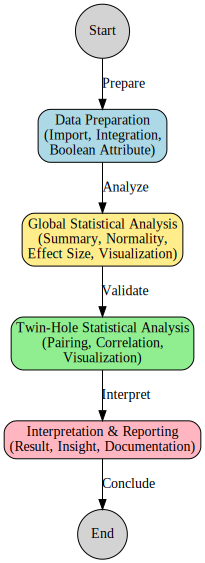

In [ ]:
from graphviz import Digraph
from IPython.display import SVG, display

# === Square Layout Workflow (No Loop) ===
dot = Digraph('Assay_Analysis_Workflow_Square_NoLoop', format='svg')
dot.attr(rankdir='TB', size='8,8', fontname='Helvetica', splines='ortho')

# === Nodes (arranged roughly like a square) ===
dot.node('start', 'Start', shape='circle', style='filled', fillcolor='lightgray')

# top side
dot.node('data', 'Data Preparation\n(Import, Integration,\nBoolean Attribute)', 
         shape='box', style='rounded,filled', fillcolor='lightblue')

# right side
dot.node('global', 'Global Statistical Analysis\n(Summary, Normality,\nEffect Size, Visualization)', 
         shape='box', style='rounded,filled', fillcolor='lightgoldenrod1')

# bottom side
dot.node('twin', 'Twin-Hole Statistical Analysis\n(Pairing, Correlation,\nVisualization)', 
         shape='box', style='rounded,filled', fillcolor='lightgreen')

# left side
dot.node('interpret', 'Interpretation & Reporting\n(Result, Insight, Documentation)', 
         shape='box', style='rounded,filled', fillcolor='lightpink')

dot.node('end', 'End', shape='circle', style='filled', fillcolor='lightgray')

# === Edges arranged like a square (Linear, No Loop) ===
dot.edge('start', 'data', label='Prepare')
dot.edge('data', 'global', label='Analyze')
dot.edge('global', 'twin', label='Validate')
dot.edge('twin', 'interpret', label='Interpret')
dot.edge('interpret', 'end', label='Conclude')

# === Render and Display ===
dot.render('Assay_Analysis_Workflow_Square_NoLoop', format='svg', view=True)
display(SVG(dot.pipe(format='svg')))


In [ ]:
# Split data "assay_old" & "assay_new"
collar_twin = load_query("""
    select *
    from exploration.collar
    where is_twin=1
""")
paired_data_collar = collar_twin.copy()
paired_data_collar

,hole_id,date,easting_x,northing_y,elevation,elev_topo,eoh,is_old,is_twin,inc_samp
0,F07-001,44248,404506.710,114873.485,366.710,385.606995,19.0,1,1,19
1,F07-002,44256,404523.855,114858.029,361.801,383.154999,15.8,1,1,16
2,F07-003,44248,404556.468,114875.302,354.937,378.019989,19.0,1,1,19
3,F07-004,44256,404576.914,114846.977,355.231,374.299988,13.0,1,1,13
4,F07-005,44248,404606.001,114874.269,351.683,369.584992,22.2,1,1,23
...,...,...,...,...,...,...,...,...,...,...
202,F09-037i,45453,404631.760,114017.846,532.605,554.057007,14.0,0,1,16
203,F09-039i,45453,404681.747,114023.668,522.609,546.369995,10.0,0,1,10
204,F09-040A,45453,404675.884,113993.707,530.254,548.857971,15.0,0,1,16
205,F09-041i,45453,404728.662,114021.932,523.592,536.814026,10.0,0,1,10


In [ ]:
assay_twin = load_query("""
    select *
    from exploration.assay
    where is_twin=1
""")
paired_data_assay = assay_twin.copy()
paired_data_assay

,sample_id,hole_id,depth_from,depth_to,core_length,cr_%,is_old,is_twin,ni,fe,mgo,sio2,sm,co,cao,al2o3,lith
0,B1/F07-001/JAS/01,F07-001,0.0,1.0,1.0,1,1,1,0.900,46.450,0.050,22.260,445.200000,0.000,0.100,11.990,LIM
1,B1/F07-001/JAS/02,F07-001,1.0,2.0,0.9,0.9,1,1,1.760,30.330,5.920,28.830,4.869932,0.100,0.010,3.620,SAP
2,B1/F07-001/JAS/03,F07-001,2.0,3.0,0.8,0.8,1,1,1.910,34.020,2.930,28.090,9.587031,0.080,0.050,2.270,SAP
3,B1/F07-001/JAS/04,F07-001,3.0,4.0,1.0,1,1,1,2.260,12.910,15.920,40.570,2.548367,0.030,0.110,1.090,SAP
4,B1/F07-001/JAS/05,F07-001,4.0,5.0,1.0,1,1,1,2.100,15.720,15.730,37.300,2.371265,0.040,0.050,0.780,SAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,B1/F09-043i/JAS/06,F09-043i,5.0,6.0,1.0,1,0,1,0.287,6.732,31.710,34.689,1.093945,0.018,0.028,0.665,SAP
2858,B1/F09-043i/JAS/07,F09-043i,6.0,7.0,1.0,1,0,1,0.281,6.523,34.241,36.230,1.058088,0.018,0.023,0.669,SAP
2859,B1/F09-043i/JAS/08,F09-043i,7.0,8.0,1.0,1,0,1,0.250,5.790,32.859,35.482,1.079826,0.015,0.025,0.904,SAP
2860,B1/F09-043i/JAS/09,F09-043i,8.0,9.0,1.0,1,0,1,0.248,5.655,33.379,34.603,1.036670,0.015,0.067,0.815,SAP


In [ ]:
# Load CSV data
import pandas as pd

collar_elev = pd.read_csv("../data/collar_elev_demnas.csv", delimiter=",", encoding="utf-8")
collar_elev = collar_elev.replace(["#DIV/0!", "#N/A"], pd.NA)

collar_elev.head(10)

,hole_id,date,easting_x,northing_y,elevation,elev_topo,eoh,is_old,is_twin,inc_samp,elev_1
0,E07-053B,44545,404221.582,114832.163,381.769,NaN,22.50,1,0,26,396.689667
1,E07-054,44394,404228.224,114802.139,385.062,NaN,19.50,1,0,20,399.435059
2,E07-055,44545,404254.834,114827.120,383.952,NaN,12.35,1,0,16,398.608612
3,E07-056,44393,404281.732,114799.883,389.997,NaN,15.00,1,0,21,403.772583
4,E07-057,44546,404303.045,114824.195,383.601,NaN,16.50,1,0,19,399.933563
5,E07-058,44393,404329.817,114800.750,384.687,NaN,15.40,1,0,22,401.847626
6,E07-059,44546,404356.463,114825.730,377.413,NaN,8.00,1,0,8,393.938538
7,E07-060,44256,404379.811,114801.933,372.724,NaN,2.00,1,0,3,392.986420
8,E07-061,44546,404406.005,114821.934,384.644,NaN,7.00,1,0,7,390.288055
9,E07-062,44394,404424.054,114796.952,387.493,NaN,19.50,1,0,24,396.668304


In [ ]:
# Upload dataframe ke schema exploration sebagai tabel sementara
collar_elev.to_sql(
    'temp_collar_elev',
    engine,
    schema='exploration',
    index=False,
    if_exists='replace'
)


612

In [ ]:
from sqlalchemy import text

update_sql = """
UPDATE exploration.collar AS c
SET elev_topo = t.elev_1
FROM exploration.temp_collar_elev AS t
WHERE c.hole_id = t.hole_id;
"""

with engine.begin() as conn:
    conn.execute(text(update_sql))


In [ ]:
import pandas as pd

df_check = pd.read_sql("""
    SELECT hole_id, elev_topo
    FROM exploration.collar
    ORDER BY hole_id
    LIMIT 10;
""", engine)

df_check


,hole_id,elev_topo
0,E07-016i,397.326447
1,E07-017,392.829437
2,E07-017i,391.484436
3,E07-018,398.248383
4,E07-018i,396.564758
5,E07-019,392.511841
6,E07-019i,388.560059
7,E07-020,393.307770
8,E07-020i,392.006256
9,E07-021,391.093658


In [ ]:
collar_paired = load_query("""
    select *
    from exploration.collar
    where is_twin = 1;
""")
collar_paired

,hole_id,date,easting_x,northing_y,elevation,elev_topo,eoh,is_old,is_twin,inc_samp
0,F07-001,44248,404506.710,114873.485,366.710,385.779572,19.0,1,1,19
1,F07-002,44256,404523.855,114858.029,361.801,383.319214,15.8,1,1,16
2,F07-003,44248,404556.468,114875.302,354.937,378.004486,19.0,1,1,19
3,F07-004,44256,404576.914,114846.977,355.231,373.975494,13.0,1,1,13
4,F07-005,44248,404606.001,114874.269,351.683,369.827393,22.2,1,1,23
...,...,...,...,...,...,...,...,...,...,...
202,F09-037i,45453,404631.760,114017.846,532.605,554.252991,14.0,0,1,16
203,F09-039i,45453,404681.747,114023.668,522.609,546.591125,10.0,0,1,10
204,F09-040A,45453,404675.884,113993.707,530.254,549.929565,15.0,0,1,16
205,F09-041i,45453,404728.662,114021.932,523.592,536.421265,10.0,0,1,10


In [ ]:
assay_paired = load_query("""
    select *
    from exploration.assay
    where is_twin = 1;
""")
assay_paired

,sample_id,hole_id,depth_from,depth_to,core_length,cr_%,is_old,is_twin,ni,fe,mgo,sio2,sm,co,cao,al2o3,lith
0,B1/F07-001/JAS/01,F07-001,0.0,1.0,1.0,1,1,1,0.900,46.450,0.050,22.260,445.200000,0.000,0.100,11.990,LIM
1,B1/F07-001/JAS/02,F07-001,1.0,2.0,0.9,0.9,1,1,1.760,30.330,5.920,28.830,4.869932,0.100,0.010,3.620,SAP
2,B1/F07-001/JAS/03,F07-001,2.0,3.0,0.8,0.8,1,1,1.910,34.020,2.930,28.090,9.587031,0.080,0.050,2.270,SAP
3,B1/F07-001/JAS/04,F07-001,3.0,4.0,1.0,1,1,1,2.260,12.910,15.920,40.570,2.548367,0.030,0.110,1.090,SAP
4,B1/F07-001/JAS/05,F07-001,4.0,5.0,1.0,1,1,1,2.100,15.720,15.730,37.300,2.371265,0.040,0.050,0.780,SAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,B1/F09-043i/JAS/06,F09-043i,5.0,6.0,1.0,1,0,1,0.287,6.732,31.710,34.689,1.093945,0.018,0.028,0.665,SAP
2858,B1/F09-043i/JAS/07,F09-043i,6.0,7.0,1.0,1,0,1,0.281,6.523,34.241,36.230,1.058088,0.018,0.023,0.669,SAP
2859,B1/F09-043i/JAS/08,F09-043i,7.0,8.0,1.0,1,0,1,0.250,5.790,32.859,35.482,1.079826,0.015,0.025,0.904,SAP
2860,B1/F09-043i/JAS/09,F09-043i,8.0,9.0,1.0,1,0,1,0.248,5.655,33.379,34.603,1.036670,0.015,0.067,0.815,SAP


In [ ]:
# mencari pasangan twin hole
collar_paired["base_id"] = collar_paired["hole_id"].str.replace(r"[A-Za-z]$", "", regex=True)

# hitung jumlah kemunculan base_id
twin_counts = collar_paired["base_id"].value_counts()

# tandai mana yang punya pasangan
collar_paired["has_twin"] = collar_paired["base_id"].isin(twin_counts[twin_counts > 1].index)

collar_paired


,hole_id,date,easting_x,northing_y,elevation,elev_topo,eoh,is_old,is_twin,inc_samp,base_id,has_twin
0,F07-001,44248,404506.710,114873.485,366.710,385.779572,19.0,1,1,19,F07-001,True
1,F07-002,44256,404523.855,114858.029,361.801,383.319214,15.8,1,1,16,F07-002,True
2,F07-003,44248,404556.468,114875.302,354.937,378.004486,19.0,1,1,19,F07-003,True
3,F07-004,44256,404576.914,114846.977,355.231,373.975494,13.0,1,1,13,F07-004,True
4,F07-005,44248,404606.001,114874.269,351.683,369.827393,22.2,1,1,23,F07-005,True
...,...,...,...,...,...,...,...,...,...,...,...,...
202,F09-037i,45453,404631.760,114017.846,532.605,554.252991,14.0,0,1,16,F09-037,True
203,F09-039i,45453,404681.747,114023.668,522.609,546.591125,10.0,0,1,10,F09-039,True
204,F09-040A,45453,404675.884,113993.707,530.254,549.929565,15.0,0,1,16,F09-040,True
205,F09-041i,45453,404728.662,114021.932,523.592,536.421265,10.0,0,1,10,F09-041,True


In [ ]:
import pandas as pd
import numpy as np

# === 1️⃣ Buat base_id (contoh: F07-001 dari F07-001i)
collar_paired['base_id'] = collar_paired['hole_id'].str.extract(r'^([A-Z]+\d{2}-\d{3})')

# === 2️⃣ Tentukan urutan prioritas suffix twin
priority_order = ['i', 'A', 'B', 'C']
collar_paired['suffix'] = collar_paired['hole_id'].str.extract(r'([A-Za-z]+)$')[0]
collar_paired['suffix_rank'] = collar_paired['suffix'].map({s: i for i, s in enumerate(priority_order)}).fillna(99)

# === 3️⃣ Pilih maksimal 2 hole per base_id (utama + twin prioritas tertinggi)
collar_filtered = (
    collar_paired.sort_values(['base_id', 'suffix_rank'])
    .groupby('base_id')
    .head(2)
    .reset_index(drop=True)
)

# === 4️⃣ Hitung jumlah twin per base_id
twin_counts = collar_filtered.groupby('base_id')['hole_id'].count().reset_index(name='twin_count')

# === 5️⃣ Gabungkan pasangan berdasarkan base_id (satu arah saja)
pairs = (
    collar_filtered.merge(collar_filtered, on='base_id', suffixes=('_a', '_b'))
    .query('hole_id_a < hole_id_b')  # hindari duplikasi pasangan
    .merge(twin_counts, on='base_id', how='left')
    .reset_index(drop=True)
)

# === 6️⃣ Tandai valid twin (semua pasangan hasil regex dianggap valid)
pairs['is_valid_twin'] = True

# === 7️⃣ Susun hasil akhir tanpa kolom spasial overlap
result = pairs[[
    'base_id', 'twin_count',
    'hole_id_a', 'easting_x_a', 'northing_y_a', 'elevation_a',
    'hole_id_b', 'easting_x_b', 'northing_y_b', 'elevation_b',
    'is_valid_twin'
]].copy()

# === 8️⃣ Format hasil validasi
result['is_valid_twin'] = result['is_valid_twin'].apply(lambda x: '✅ True' if x else '❌ False')

pd.set_option('display.float_format', '{:.2f}'.format)
display(result)

# === 🔟 Summary pairing
total_holes = collar_paired['hole_id'].nunique()
paired_holes = result['base_id'].nunique()
coverage = paired_holes / total_holes * 100

print(f"\nTotal hole: {total_holes}")
print(f"Base ID with twin: {paired_holes} ({coverage:.1f}% coverage)")


,base_id,twin_count,hole_id_a,easting_x_a,northing_y_a,elevation_a,hole_id_b,easting_x_b,northing_y_b,elevation_b,is_valid_twin
0,F07-001,2,F07-001,404506.71,114873.49,366.71,F07-001i,404525.53,114874.79,362.47,✅ True
1,F07-002,2,F07-002,404523.85,114858.03,361.80,F07-002i,404553.61,114849.64,354.01,✅ True
2,F07-003,2,F07-003,404556.47,114875.30,354.94,F07-003i,404584.83,114868.46,351.24,✅ True
3,F07-004,2,F07-004,404576.91,114846.98,355.23,F07-004i,404610.38,114848.42,352.16,✅ True
4,F07-005,2,F07-005,404606.00,114874.27,351.68,F07-005i,404627.06,114875.09,350.37,✅ True
...,...,...,...,...,...,...,...,...,...,...,...
96,F09-037,2,F09-037,404605.09,114021.98,536.87,F09-037i,404631.76,114017.85,532.61,✅ True
97,F09-039,2,F09-039,404655.11,114024.11,526.33,F09-039i,404681.75,114023.67,522.61,✅ True
98,F09-040,2,F09-040,404677.07,114000.23,528.78,F09-040A,404675.88,113993.71,530.25,✅ True
99,F09-041,2,F09-041,404706.16,114024.53,526.51,F09-041i,404728.66,114021.93,523.59,✅ True



Total hole: 207
Base ID with twin: 101 (48.8% coverage)


In [ ]:
# Cek apakah masih ada lebih dari 1 twin hole
result_valid = result[result['twin_count'] == 3]
display(result_valid)


,base_id,twin_count,hole_id_a,easting_x_a,northing_y_a,elevation_a,hole_id_b,easting_x_b,northing_y_b,elevation_b,is_valid_twin


In [ ]:
twinhole_data = result
twinhole_data

,base_id,twin_count,hole_id_a,easting_x_a,northing_y_a,elevation_a,hole_id_b,easting_x_b,northing_y_b,elevation_b,is_valid_twin
0,F07-001,2,F07-001,404506.71,114873.49,366.71,F07-001i,404525.53,114874.79,362.47,✅ True
1,F07-002,2,F07-002,404523.85,114858.03,361.80,F07-002i,404553.61,114849.64,354.01,✅ True
2,F07-003,2,F07-003,404556.47,114875.30,354.94,F07-003i,404584.83,114868.46,351.24,✅ True
3,F07-004,2,F07-004,404576.91,114846.98,355.23,F07-004i,404610.38,114848.42,352.16,✅ True
4,F07-005,2,F07-005,404606.00,114874.27,351.68,F07-005i,404627.06,114875.09,350.37,✅ True
...,...,...,...,...,...,...,...,...,...,...,...
96,F09-037,2,F09-037,404605.09,114021.98,536.87,F09-037i,404631.76,114017.85,532.61,✅ True
97,F09-039,2,F09-039,404655.11,114024.11,526.33,F09-039i,404681.75,114023.67,522.61,✅ True
98,F09-040,2,F09-040,404677.07,114000.23,528.78,F09-040A,404675.88,113993.71,530.25,✅ True
99,F09-041,2,F09-041,404706.16,114024.53,526.51,F09-041i,404728.66,114021.93,523.59,✅ True


In [ ]:
assay_paired

,sample_id,hole_id,depth_from,depth_to,core_length,cr_%,is_old,is_twin,ni,fe,mgo,sio2,sm,co,cao,al2o3,lith
0,B1/F07-001/JAS/01,F07-001,0.00,1.00,1.00,1,1,1,0.90,46.45,0.05,22.26,445.20,0.00,0.10,11.99,LIM
1,B1/F07-001/JAS/02,F07-001,1.00,2.00,0.90,0.9,1,1,1.76,30.33,5.92,28.83,4.87,0.10,0.01,3.62,SAP
2,B1/F07-001/JAS/03,F07-001,2.00,3.00,0.80,0.8,1,1,1.91,34.02,2.93,28.09,9.59,0.08,0.05,2.27,SAP
3,B1/F07-001/JAS/04,F07-001,3.00,4.00,1.00,1,1,1,2.26,12.91,15.92,40.57,2.55,0.03,0.11,1.09,SAP
4,B1/F07-001/JAS/05,F07-001,4.00,5.00,1.00,1,1,1,2.10,15.72,15.73,37.30,2.37,0.04,0.05,0.78,SAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,B1/F09-043i/JAS/06,F09-043i,5.00,6.00,1.00,1,0,1,0.29,6.73,31.71,34.69,1.09,0.02,0.03,0.67,SAP
2858,B1/F09-043i/JAS/07,F09-043i,6.00,7.00,1.00,1,0,1,0.28,6.52,34.24,36.23,1.06,0.02,0.02,0.67,SAP
2859,B1/F09-043i/JAS/08,F09-043i,7.00,8.00,1.00,1,0,1,0.25,5.79,32.86,35.48,1.08,0.01,0.03,0.90,SAP
2860,B1/F09-043i/JAS/09,F09-043i,8.00,9.00,1.00,1,0,1,0.25,5.66,33.38,34.60,1.04,0.01,0.07,0.81,SAP


In [ ]:
import pandas as pd
import numpy as np
import re

# === 1️⃣ Ambil base_id (tanpa suffix huruf di akhir, contoh: F07-001A → F07-001)
assay_paired['base_id'] = assay_paired['hole_id'].str.extract(r'^([A-Z]+\d{2}-\d{3})', expand=False)

# === 2️⃣ Fungsi trimming twin holes agar kedalaman seragam antar hole kembar
def trim_twin_holes(df):
    result = []

    for base in df['base_id'].unique():
        group = df[df['base_id'] == base].copy()

        if group['hole_id'].nunique() > 1:
            # Ambil kedalaman maksimum tiap hole
            depths = group.groupby('hole_id')['depth_to'].max().reset_index()
            # Tentukan kedalaman umum (hole terdangkal)
            common_depth = depths['depth_to'].min()

            # Potong semua interval di atas batas umum
            group.loc[group['depth_to'] > common_depth, 'depth_to'] = common_depth
            group = group[group['depth_from'] < common_depth]

        result.append(group)

    trimmed_df = pd.concat(result, ignore_index=True)
    return trimmed_df

# === 3️⃣ Jalankan trimming
trimmed_df = trim_twin_holes(assay_paired)

# === 4️⃣ Hitung jumlah twin per base_id
twin_counts = (
    trimmed_df.groupby('base_id')['hole_id']
    .nunique()
    .reset_index(name='twin_count')
)
trimmed_df = trimmed_df.merge(twin_counts, on='base_id', how='left')

# === 5️⃣ Urutkan agar base_id dan hole_id berurutan
trimmed_df = trimmed_df.sort_values(by=['base_id', 'hole_id', 'depth_from']).reset_index(drop=True)

print("=== HASIL TRIMMED DATA ===")
display(trimmed_df.head(10))

# === 6️⃣ Fungsi compositing (interval default = 1 meter)
def composite_intervals(df, interval=1.0):
    df = df.copy()

    # Pastikan kolom numeric dibersihkan
    numeric_cols = ['ni', 'fe', 'mgo', 'sio2', 'cr_%', 'core_length']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    composites = []
    
    for (base, hole), group in df.groupby(['base_id', 'hole_id']):
        group = group.sort_values('depth_from').copy()
        max_depth = group['depth_to'].max()
        start, end = 0.0, interval

        while start < max_depth:
            mask = (group['depth_to'] > start) & (group['depth_from'] < end)
            sub = group[mask]

            if not sub.empty:
                sub = sub.copy()
                sub['length'] = sub['depth_to'] - sub['depth_from']
                total_length = sub['length'].sum()

                comp = {
                    'base_id': base,
                    'hole_id': hole,
                    'depth_from': round(start, 2),
                    'depth_to': round(min(end, max_depth), 2),
                    'interval_length': interval,
                }

                # Weighted average
                for col in numeric_cols:
                    if col in sub.columns and total_length > 0:
                        comp[col] = np.average(sub[col], weights=sub['length'])
                    else:
                        comp[col] = np.nan

                # Mode lithology
                if 'lith' in sub.columns and not sub['lith'].mode().empty:
                    comp['lith'] = sub['lith'].mode()[0]
                else:
                    comp['lith'] = np.nan

                composites.append(comp)

            start += interval
            end += interval

    return pd.DataFrame(composites)

# === 7️⃣ Jalankan compositing (interval 1 meter)
composited_df = composite_intervals(trimmed_df, interval=1.0)

# === 8️⃣ Tambahkan twin count
composited_df = composited_df.merge(twin_counts, on='base_id', how='left')

# === 8½️⃣ Tandai apakah hole termasuk twin
# NOTE: hole utama (tanpa huruf di akhir) → False
composited_df['is_twin'] = composited_df['hole_id'].apply(lambda x: bool(re.search(r'[A-Za-z]$', str(x))))

print("=== Jumlah Hole Utama & Twin ===")
print(composited_df['is_twin'].value_counts())

# === 9️⃣ Urutkan hasil akhir
composited_df = composited_df.sort_values(by=['base_id', 'hole_id', 'depth_from']).reset_index(drop=True)

print("=== HASIL COMPOSITED DATA ===")
display(composited_df.head(15))

# === 🔟 Ringkasan per base_id
summary = (
    composited_df.groupby('base_id')
    .agg(
        total_twin=('hole_id', 'nunique'),
        max_depth=('depth_to', 'max'),
        n_composites=('hole_id', 'count'),
    )
    .reset_index()
)
print("=== RINGKASAN BASE ID ===")
display(summary.head(10))


=== HASIL TRIMMED DATA ===


,sample_id,hole_id,depth_from,depth_to,core_length,cr_%,is_old,is_twin,ni,fe,mgo,sio2,sm,co,cao,al2o3,lith,base_id,twin_count
0,B1/F07-001/JAS/01,F07-001,0.00,1.00,1.00,1,1,1,0.90,46.45,0.05,22.26,445.20,0.00,0.10,11.99,LIM,F07-001,2
1,B1/F07-001/JAS/02,F07-001,1.00,2.00,0.90,0.9,1,1,1.76,30.33,5.92,28.83,4.87,0.10,0.01,3.62,SAP,F07-001,2
2,B1/F07-001/JAS/03,F07-001,2.00,3.00,0.80,0.8,1,1,1.91,34.02,2.93,28.09,9.59,0.08,0.05,2.27,SAP,F07-001,2
3,B1/F07-001/JAS/04,F07-001,3.00,4.00,1.00,1,1,1,2.26,12.91,15.92,40.57,2.55,0.03,0.11,1.09,SAP,F07-001,2
4,B1/F07-001/JAS/05,F07-001,4.00,5.00,1.00,1,1,1,2.10,15.72,15.73,37.30,2.37,0.04,0.05,0.78,SAP,F07-001,2
5,B1/F07-001/JAS/06,F07-001,5.00,6.00,1.00,1,1,1,1.69,13.61,18.22,38.95,2.14,0.02,0.09,0.56,SAP,F07-001,2
6,B1/F07-001/JAS/07,F07-001,6.00,7.00,1.00,1,1,1,1.00,11.88,19.09,42.03,2.20,0.01,0.11,0.57,RSAP,F07-001,2
7,B1/F07-001/JAS/08,F07-001,7.00,8.00,1.00,1,1,1,0.40,8.90,25.81,41.99,1.63,0.04,0.08,0.65,RSAP,F07-001,2
8,B1/F07-001/JAS/09,F07-001,8.00,9.00,1.00,1,1,1,0.33,7.15,28.48,43.68,1.53,0.01,0.13,0.61,RSAP,F07-001,2
9,B1/F07-001/JAS/10,F07-001,9.00,10.00,1.00,1,1,1,0.32,6.89,28.39,44.96,1.58,0.01,0.12,0.93,RSAP,F07-001,2


=== Jumlah Hole Utama & Twin ===
is_twin
True     1126
False    1083
Name: count, dtype: int64
=== HASIL COMPOSITED DATA ===


,base_id,hole_id,depth_from,depth_to,interval_length,ni,fe,mgo,sio2,cr_%,core_length,lith,twin_count,is_twin
0,F07-001,F07-001,0.00,1.00,1.00,0.90,46.45,0.05,22.26,1.00,1.00,LIM,2,False
1,F07-001,F07-001,1.00,2.00,1.00,1.76,30.33,5.92,28.83,0.90,0.90,SAP,2,False
2,F07-001,F07-001,2.00,3.00,1.00,1.91,34.02,2.93,28.09,0.80,0.80,SAP,2,False
3,F07-001,F07-001,3.00,4.00,1.00,2.26,12.91,15.92,40.57,1.00,1.00,SAP,2,False
4,F07-001,F07-001,4.00,5.00,1.00,2.10,15.72,15.73,37.30,1.00,1.00,SAP,2,False
5,F07-001,F07-001,5.00,6.00,1.00,1.69,13.61,18.22,38.95,1.00,1.00,SAP,2,False
6,F07-001,F07-001,6.00,7.00,1.00,1.00,11.88,19.09,42.03,1.00,1.00,RSAP,2,False
7,F07-001,F07-001,7.00,8.00,1.00,0.40,8.90,25.81,41.99,1.00,1.00,RSAP,2,False
8,F07-001,F07-001,8.00,9.00,1.00,0.33,7.15,28.48,43.68,1.00,1.00,RSAP,2,False
9,F07-001,F07-001,9.00,10.00,1.00,0.32,6.89,28.39,44.96,1.00,1.00,RSAP,2,False


=== RINGKASAN BASE ID ===


,base_id,total_twin,max_depth,n_composites
0,F07-001,2,18.00,36
1,F07-002,2,15.80,32
2,F07-003,2,19.00,38
3,F07-004,2,13.00,26
4,F07-005,2,20.00,40
5,F07-010,2,20.00,40
6,F07-011,2,8.00,16
7,F07-033,2,20.00,40
8,F07-034,2,15.00,30
9,F07-035,2,18.00,36


In [ ]:
# composited_df
composited_df.columns.tolist()


['base_id',
 'hole_id',
 'depth_from',
 'depth_to',
 'interval_length',
 'ni',
 'fe',
 'mgo',
 'sio2',
 'cr_%',
 'core_length',
 'lith',
 'twin_count',
 'is_twin']

In [ ]:
composited_df[composited_df['hole_id'].isin(['F07-001', 'F07-001i'])]


,base_id,hole_id,depth_from,depth_to,interval_length,ni,fe,mgo,sio2,cr_%,core_length,lith,twin_count,is_twin
0,F07-001,F07-001,0.00,1.00,1.00,0.90,46.45,0.05,22.26,1.00,1.00,LIM,2,False
1,F07-001,F07-001,1.00,2.00,1.00,1.76,30.33,5.92,28.83,0.90,0.90,SAP,2,False
2,F07-001,F07-001,2.00,3.00,1.00,1.91,34.02,2.93,28.09,0.80,0.80,SAP,2,False
3,F07-001,F07-001,3.00,4.00,1.00,2.26,12.91,15.92,40.57,1.00,1.00,SAP,2,False
4,F07-001,F07-001,4.00,5.00,1.00,2.10,15.72,15.73,37.30,1.00,1.00,SAP,2,False
5,F07-001,F07-001,5.00,6.00,1.00,1.69,13.61,18.22,38.95,1.00,1.00,SAP,2,False
6,F07-001,F07-001,6.00,7.00,1.00,1.00,11.88,19.09,42.03,1.00,1.00,RSAP,2,False
7,F07-001,F07-001,7.00,8.00,1.00,0.40,8.90,25.81,41.99,1.00,1.00,RSAP,2,False
8,F07-001,F07-001,8.00,9.00,1.00,0.33,7.15,28.48,43.68,1.00,1.00,RSAP,2,False
9,F07-001,F07-001,9.00,10.00,1.00,0.32,6.89,28.39,44.96,1.00,1.00,RSAP,2,False


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, normaltest, ttest_rel, wilcoxon

# === 1️⃣ Normality Testing ===
def test_normality(diff_series):
    diff_series = diff_series.dropna()
    n = len(diff_series)
    if n == 0:
        return np.nan, np.nan, None

    if n <= 5000:
        stat, p = shapiro(diff_series)
        test_name = "Shapiro-Wilk"
    else:
        stat, p = normaltest(diff_series)
        test_name = "D’Agostino–Pearson"
    return stat, p, test_name


# === 2️⃣ Paired Statistical Test ===
def paired_test(data1, data2, normal=True):
    data1, data2 = data1.dropna(), data2.dropna()
    n = min(len(data1), len(data2))
    if n < 5:
        return np.nan, np.nan, "Insufficient data"

    if normal:
        stat, p = ttest_rel(data1, data2)
        test_name = "Paired t-test"
    else:
        try:
            stat, p = wilcoxon(data1, data2)
        except ValueError:
            p = np.nan
        test_name = "Wilcoxon signed-rank"
    return stat, p, test_name


# === 3️⃣ Wrapper untuk seluruh twin-hole ===
def run_paired_statistical_testing(composited_df, elements=None):
    if elements is None:
        elements = ['ni', 'fe', 'mgo', 'sio2']

    df = composited_df.copy()

    # Buat kolom base_hole_id tanpa huruf di akhir
    df['base_hole_id'] = df['hole_id'].str.replace(r'[a-zA-Z]$', '', regex=True)

    results = []

    # Ambil hanya base_id yang punya hole utama dan twin
    valid_base = (
        df.groupby('base_id')['hole_id']
          .apply(lambda x: any(x.str.contains(r'[a-zA-Z]$')) and any(~x.str.contains(r'[a-zA-Z]$')))
          .loc[lambda x: x].index
    )

    for base in valid_base:
        subset = df[df['base_id'] == base]
        main_hole = subset[~subset['hole_id'].str.contains(r'[a-zA-Z]$')]['hole_id'].unique()
        twin_hole = subset[subset['hole_id'].str.contains(r'[a-zA-Z]$')]['hole_id'].unique()

        if len(main_hole) != 1 or len(twin_hole) != 1:
            continue

        h1, h2 = main_hole[0], twin_hole[0]

        # Gabungkan berdasarkan interval kedalaman
        merged = pd.merge(
            subset[subset['hole_id'] == h1],
            subset[subset['hole_id'] == h2],
            on=['base_id', 'depth_from', 'depth_to'],
            suffixes=(f'_{h1}', f'_{h2}')
        )

        if merged.empty:
            continue

        # Uji tiap elemen kimia
        for element in elements:
            c1, c2 = f"{element}_{h1}", f"{element}_{h2}"
            if c1 not in merged.columns or c2 not in merged.columns:
                continue

            data = merged[[c1, c2]].dropna()
            if len(data) < 5:
                continue

            diff = data[c1] - data[c2]

            stat_norm, p_norm, norm_test = test_normality(diff)
            normal = p_norm > 0.05 if not np.isnan(p_norm) else False
            stat_test, p_val, test_name = paired_test(data[c1], data[c2], normal=normal)

            interpretation = (
                "No significant difference (consistent)" if p_val > 0.05
                else "Significant difference (review required)"
            )

            results.append({
                'base_id': base,
                'hole_main': h1,
                'hole_twin': h2,
                'element': element.upper(),
                'n_samples': len(data),
                'normality_test': norm_test,
                'p_normality': p_norm,
                'stat_test': test_name,
                'p_value': p_val,
                'interpretation': interpretation
            })

    return pd.DataFrame(results)


# === 4️⃣ Example run ===
paired_stats = run_paired_statistical_testing(composited_df)
print("Result shape:", paired_stats.shape)
display(paired_stats.head(15))


Result shape: (368, 10)


,base_id,hole_main,hole_twin,element,n_samples,normality_test,p_normality,stat_test,p_value,interpretation
0,F07-001,F07-001,F07-001i,NI,18,Shapiro-Wilk,0.35,Paired t-test,0.92,No significant difference (consistent)
1,F07-001,F07-001,F07-001i,FE,18,Shapiro-Wilk,0.04,Wilcoxon signed-rank,0.01,Significant difference (review required)
2,F07-001,F07-001,F07-001i,MGO,18,Shapiro-Wilk,0.40,Paired t-test,0.02,Significant difference (review required)
3,F07-001,F07-001,F07-001i,SIO2,18,Shapiro-Wilk,0.01,Wilcoxon signed-rank,0.00,Significant difference (review required)
4,F07-002,F07-002,F07-002i,NI,16,Shapiro-Wilk,0.55,Paired t-test,0.23,No significant difference (consistent)
5,F07-002,F07-002,F07-002i,FE,16,Shapiro-Wilk,0.89,Paired t-test,0.27,No significant difference (consistent)
6,F07-002,F07-002,F07-002i,MGO,16,Shapiro-Wilk,0.29,Paired t-test,0.01,Significant difference (review required)
7,F07-002,F07-002,F07-002i,SIO2,16,Shapiro-Wilk,0.03,Wilcoxon signed-rank,0.01,Significant difference (review required)
8,F07-003,F07-003,F07-003i,NI,19,Shapiro-Wilk,0.01,Wilcoxon signed-rank,0.86,No significant difference (consistent)
9,F07-003,F07-003,F07-003i,FE,19,Shapiro-Wilk,0.17,Paired t-test,0.05,Significant difference (review required)


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# =====================================================
# 1️⃣ Correlation Analysis (Pearson / Spearman)
# =====================================================
def correlation_analysis(data1, data2, normal=True):
    """
    Perform Pearson or Spearman correlation based on normality.
    Returns correlation coefficient, p-value, and interpretation.
    """
    if normal:
        corr, pval = stats.pearsonr(data1, data2)
        method = "Pearson"
    else:
        corr, pval = stats.spearmanr(data1, data2)
        method = "Spearman"

    # Interpretation thresholds
    if abs(corr) < 0.3:
        interpretation = "Weak"
    elif abs(corr) < 0.5:
        interpretation = "Moderate"
    elif abs(corr) < 0.7:
        interpretation = "Strong"
    else:
        interpretation = "Very Strong"

    return {
        "correlation": corr,
        "p_value": pval,
        "method": method,
        "interpretation": interpretation
    }

# =====================================================
# 2️⃣ Regression Analysis (R², RMSE, Bias)
# =====================================================
def regression_analysis(data1, data2):
    """
    Perform linear regression between Base (data1) and Twin (data2).
    Returns R², RMSE, slope, intercept, and bias direction.
    """
    model = LinearRegression()
    x = data1.values.reshape(-1, 1)
    y = data2.values.reshape(-1, 1)
    model.fit(x, y)
    y_pred = model.predict(x)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    # Interpret slope direction (bias)
    if slope > 1.05:
        bias = "Overestimation by Twin"
    elif slope < 0.95:
        bias = "Underestimation by Twin"
    else:
        bias = "No significant bias"

    return {
        "R²": r2,
        "RMSE": rmse,
        "slope": slope,
        "intercept": intercept,
        "bias": bias
    }

# =====================================================
# 3️⃣ Bland–Altman Analysis (Agreement)
# =====================================================
def bland_altman_analysis(data1, data2):
    """
    Perform Bland–Altman analysis to measure agreement between two datasets.
    Returns mean difference, SD, limits of agreement, and interpretation.
    """
    diff = data1 - data2
    mean_diff = np.mean(diff)
    sd_diff = np.std(diff, ddof=1)
    loa_upper = mean_diff + 1.96 * sd_diff
    loa_lower = mean_diff - 1.96 * sd_diff

    abs_diff = np.abs(diff)
    within_1sd = np.mean(abs_diff <= sd_diff)
    within_2sd = np.mean(abs_diff <= 2 * sd_diff)

    if within_1sd > 0.95:
        interpretation = "Acceptable agreement (±1SD)"
    elif within_2sd > 0.95:
        interpretation = "Minor deviation (±2SD)"
    else:
        interpretation = "Significant deviation (>±2SD)"

    return {
        "mean_diff": mean_diff,
        "sd_diff": sd_diff,
        "loa_lower": loa_lower,
        "loa_upper": loa_upper,
        "interpretation": interpretation
    }

# =====================================================
# 4️⃣ Wrapper Utama
# =====================================================
def run_correlation_agreement_analysis(composited_df, elements=None):
    """
    Compute correlation, regression, and Bland–Altman agreement
    for each base–twin pair and element.
    """
    results = []
    if elements is None:
        elements = ["ni", "fe", "mgo", "sio2"]

    for base in composited_df["base_id"].unique():
        sub_df = composited_df[composited_df["base_id"] == base]
        hole_main = sub_df[sub_df["is_twin"] == False]
        hole_twin = sub_df[sub_df["is_twin"] == True]

        if hole_main.empty or hole_twin.empty:
            continue

        # Gabung berdasarkan interval kedalaman
        merged = pd.merge(
            hole_main,
            hole_twin,
            on=["depth_from", "depth_to"],
            suffixes=("_main", "_twin")
        )

        for el in elements:
            if f"{el}_main" not in merged.columns or f"{el}_twin" not in merged.columns:
                continue

            data_main = merged[f"{el}_main"].dropna()
            data_twin = merged[f"{el}_twin"].dropna()

            if len(data_main) < 3 or len(data_twin) < 3:
                continue

            # --- Analisis korelasi ---
            corr_res = correlation_analysis(data_main, data_twin, normal=True)

            # --- Analisis regresi ---
            reg_res = regression_analysis(data_main, data_twin)

            # --- Analisis Bland–Altman ---
            ba_res = bland_altman_analysis(data_main, data_twin)

            results.append({
                "base_id": base,
                "hole_main": hole_main["hole_id"].iloc[0],
                "hole_twin": hole_twin["hole_id"].iloc[0],
                "element": el,
                "n_samples": len(merged),
                "corr_method": corr_res["method"],
                "corr_coeff": corr_res["correlation"],
                "corr_p_value": corr_res["p_value"],
                "corr_interpretation": corr_res["interpretation"],
                "R²": reg_res["R²"],
                "RMSE": reg_res["RMSE"],
                "slope": reg_res["slope"],
                "intercept": reg_res["intercept"],
                "bias_direction": reg_res["bias"],
                "ba_mean_diff": ba_res["mean_diff"],
                "ba_sd_diff": ba_res["sd_diff"],
                "ba_loa_lower": ba_res["loa_lower"],
                "ba_loa_upper": ba_res["loa_upper"],
                "ba_interpretation": ba_res["interpretation"]
            })

    return pd.DataFrame(results)

# =====================================================
# 5️⃣ Jalankan Analisis
# =====================================================
correlation_results = run_correlation_agreement_analysis(composited_df)
display(correlation_results.head(10))


,base_id,hole_main,hole_twin,element,n_samples,corr_method,corr_coeff,corr_p_value,corr_interpretation,R²,RMSE,slope,intercept,bias_direction,ba_mean_diff,ba_sd_diff,ba_loa_lower,ba_loa_upper,ba_interpretation
0,F07-001,F07-001,F07-001i,ni,18,Pearson,0.58,0.01,Strong,0.34,0.43,0.42,0.46,Underestimation by Twin,0.01,0.62,-1.21,1.23,Significant deviation (>±2SD)
1,F07-001,F07-001,F07-001i,fe,18,Pearson,0.86,0.00,Very Strong,0.75,6.09,0.91,3.93,Underestimation by Twin,-2.82,6.35,-15.26,9.63,Significant deviation (>±2SD)
2,F07-001,F07-001,F07-001i,mgo,18,Pearson,0.95,0.00,Very Strong,0.91,3.37,0.99,-1.97,No significant bias,2.18,3.47,-4.63,8.98,Significant deviation (>±2SD)
3,F07-001,F07-001,F07-001i,sio2,18,Pearson,0.87,0.00,Very Strong,0.76,5.53,1.52,-26.70,Overestimation by Twin,5.81,6.68,-7.29,18.91,Significant deviation (>±2SD)
4,F07-002,F07-002,F07-002i,ni,16,Pearson,-0.02,0.94,Weak,0.00,0.63,-0.02,0.87,Underestimation by Twin,0.29,0.95,-1.57,2.16,Significant deviation (>±2SD)
5,F07-002,F07-002,F07-002i,fe,16,Pearson,0.53,0.04,Strong,0.28,7.43,0.29,12.10,Underestimation by Twin,4.03,13.97,-23.35,31.41,Minor deviation (±2SD)
6,F07-002,F07-002,F07-002i,mgo,16,Pearson,0.72,0.00,Very Strong,0.52,7.68,0.58,0.39,Underestimation by Twin,7.97,9.92,-11.48,27.42,Significant deviation (>±2SD)
7,F07-002,F07-002,F07-002i,sio2,16,Pearson,0.70,0.00,Strong,0.49,6.73,0.75,3.91,Underestimation by Twin,5.21,7.31,-9.12,19.53,Significant deviation (>±2SD)
8,F07-003,F07-003,F07-003i,ni,19,Pearson,0.06,0.81,Weak,0.00,0.41,0.05,0.94,Underestimation by Twin,-0.09,0.59,-1.25,1.07,Significant deviation (>±2SD)
9,F07-003,F07-003,F07-003i,fe,19,Pearson,0.44,0.06,Moderate,0.19,8.09,0.23,31.34,Underestimation by Twin,-7.65,15.74,-38.51,23.20,Significant deviation (>±2SD)


In [ ]:
composited_df.head(30)

,base_id,hole_id,depth_from,depth_to,interval_length,ni,fe,mgo,sio2,cr_%,core_length,lith,twin_count,is_twin
0,F07-001,F07-001,0.00,1.00,1.00,0.90,46.45,0.05,22.26,1.00,1.00,LIM,2,False
1,F07-001,F07-001,1.00,2.00,1.00,1.76,30.33,5.92,28.83,0.90,0.90,SAP,2,False
2,F07-001,F07-001,2.00,3.00,1.00,1.91,34.02,2.93,28.09,0.80,0.80,SAP,2,False
3,F07-001,F07-001,3.00,4.00,1.00,2.26,12.91,15.92,40.57,1.00,1.00,SAP,2,False
4,F07-001,F07-001,4.00,5.00,1.00,2.10,15.72,15.73,37.30,1.00,1.00,SAP,2,False
5,F07-001,F07-001,5.00,6.00,1.00,1.69,13.61,18.22,38.95,1.00,1.00,SAP,2,False
6,F07-001,F07-001,6.00,7.00,1.00,1.00,11.88,19.09,42.03,1.00,1.00,RSAP,2,False
7,F07-001,F07-001,7.00,8.00,1.00,0.40,8.90,25.81,41.99,1.00,1.00,RSAP,2,False
8,F07-001,F07-001,8.00,9.00,1.00,0.33,7.15,28.48,43.68,1.00,1.00,RSAP,2,False
9,F07-001,F07-001,9.00,10.00,1.00,0.32,6.89,28.39,44.96,1.00,1.00,RSAP,2,False


In [174]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# ============================================================
# Warna elemen konsisten
# ============================================================
ELEMENT_COLORS = {
    "ni": "#28a745",    # hijau
    "fe": "#dc3545",    # merah
    "mgo": "#007bff",   # biru
    "sio2": "#6f42c1"   # ungu
}

def get_element_color(element):
    return ELEMENT_COLORS.get(element.lower(), "#000000")

# ============================================================
# Membuat paired dataframe otomatis
# ============================================================
def create_paired_df(df, elements):
    """
    Membuat paired dataframe Base vs Twin berdasarkan kolom:
    - base_id, hole_id, depth_from, depth_to
    - kolom is_twin (boolean)
    """
    # Pisahkan base dan twin
    base_df = df[df["is_twin"] == False].copy()
    twin_df = df[df["is_twin"] == True].copy()

    # Merge berdasarkan pasangan base_id, depth interval
    merged = pd.merge(
        base_df,
        twin_df,
        on=["base_id", "depth_from", "depth_to"],
        suffixes=("_base", "_twin")
    )

    # Buat daftar kolom hasil pairing
    paired_cols = ["base_id", "hole_id_base", "hole_id_twin", "depth_from", "depth_to"]
    for el in elements:
        paired_cols.append(f"{el}_base")
        paired_cols.append(f"{el}_twin")

    # Pastikan hanya kolom yang tersedia diambil
    paired_cols = [c for c in paired_cols if c in merged.columns]
    paired_df = merged[paired_cols]

    return paired_df


# ============================================================
# Scatter plot dengan ±SD overlay
# ============================================================
def plot_twin_scatter_sd(paired_df, element, output_dir=None):
    base_col = f"{element}_base"
    twin_col = f"{element}_twin"

    if base_col not in paired_df.columns or twin_col not in paired_df.columns:
        print(f"⚠️ Kolom '{base_col}' atau '{twin_col}' tidak ditemukan.")
        return

    color = get_element_color(element)
    X = paired_df[base_col].values.reshape(-1, 1)
    Y = paired_df[twin_col].values

    reg = LinearRegression().fit(X, Y)
    Y_pred = reg.predict(X)
    m = reg.coef_[0]
    b = reg.intercept_
    r2 = r2_score(Y, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y, Y_pred))

    residuals = Y - Y_pred
    sd = np.std(residuals)

    min_val = min(X.min(), Y.min())
    max_val = max(X.max(), Y.max())

    plt.figure(figsize=(14, 6))
    plt.scatter(X, Y, color=color, s=7, alpha=0.7, label="Data points")
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label="Identity 1:1")
    plt.plot(X, Y_pred, color='red', linestyle='-', linewidth=1.5, label="Regression line")

    sd_colors = {1:"yellow", 2:"orange", 3:"purple"}
    for i in range(1, 4):
        plt.plot(X, Y_pred + i*sd, color=sd_colors[i], linestyle='--', linewidth=1, label=f"+{i} SD")
        plt.plot(X, Y_pred - i*sd, color=sd_colors[i], linestyle='--', linewidth=1, label=f"-{i} SD")

    plt.title(f"Base vs Twin Scatter with ±SD ({element.upper()})", fontsize=13, fontweight="bold")
    plt.xlabel(f"{element.upper()} Base")
    plt.ylabel(f"{element.upper()} Twin")
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.grid(alpha=0.3)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))

    plt.text(0.05, 0.95, f"y = {m:.3f}x + {b:.3f}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}", 
             transform=plt.gca().transAxes, verticalalignment='top', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

    plt.tight_layout(rect=[0,0,0.85,1])

    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, f"scatter_sd_{element}.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ Scatter ±SD Plot disimpan: {save_path}")

    plt.show()
    plt.close()

# ============================================================
# Boxplot dengan garis mean
# ============================================================
def plot_boxplot(df, elements, output_dir=None):
    # Pastikan kolom 'is_twin' ada
    if "is_twin" not in df.columns:
        raise KeyError("Kolom 'is_twin' tidak ditemukan dalam DataFrame.")
    
    # Konversi nilai boolean ke label teks agar legend & sumbu X lebih informatif
    df["is_twin_label"] = df["is_twin"].map({False: "Base Hole", True: "Twin Hole"})

    for el in elements:
        plt.figure(figsize=(6, 5))
        
        sns.boxplot(
            data=df,
            x="is_twin_label", y=el,
            palette=["#4287f5", "#ff8597"],  # Biru = Base, Merah = Twin
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "black",
                "markersize": 8,
                "linestyle": "-",
                "lw": 2
            }
        )

        # Overlay swarmplot agar distribusi titik terlihat
        sns.swarmplot(
            data=df,
            x="is_twin_label", y=el,
            color="black", size=2, alpha=0.5
        )

        plt.title(f"Distribution of {el.upper()} Between Base and Twin Holes")
        plt.xlabel("")  # Hilangkan label X agar tampil rapi
        plt.ylabel(f"{el.upper()} (%)")
        plt.tight_layout()

        # Simpan hasil jika output_dir ditentukan
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            save_path = os.path.join(output_dir, f"boxplot_{el}.svg")
            plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
            print(f"✅ Boxplot disimpan: {save_path}")

        plt.show()
        plt.close()


# ============================================================
# Histogram / density plot paired differences
# ============================================================
def plot_paired_diff_hist(paired_df, element, bins=30, output_dir=None):
    base_col = f"{element}_base"
    twin_col = f"{element}_twin"

    if base_col not in paired_df.columns or twin_col not in paired_df.columns:
        print(f"⚠️ Kolom '{base_col}' atau '{twin_col}' tidak ditemukan.")
        return

    diff = paired_df[twin_col] - paired_df[base_col]
    color = get_element_color(element)

    plt.figure(figsize=(8,5))
    sns.histplot(diff, bins=bins, kde=True, color=color, alpha=0.6)
    plt.axvline(0, color="black", linestyle="--", label="Zero difference")
    plt.title(f"Paired Differences Histogram ({element.upper()})")
    plt.xlabel("Twin - Base")
    plt.ylabel("Frequency / Density")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, f"paired_diff_hist_{element}.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ Histogram paired difference disimpan: {save_path}")

    plt.show()
    plt.close()

# ============================================================
# Heatmap
# ============================================================
def plot_heatmaps(df, elements=["Ni", "Fe", "MgO", "SiO2"], output_dir=None):
    """
    Membuat heatmap korelasi elemen untuk data Base dan Twin berdasarkan kolom is_twin (boolean).
    True = Twin, False = Base
    """
    # Pastikan kolom is_twin ada
    if "is_twin" not in df.columns:
        print("⚠️ Kolom 'is_twin' tidak ditemukan dalam DataFrame.")
        return

    # Pisahkan data
    base_df = df[df["is_twin"] == False].copy()
    twin_df = df[df["is_twin"] == True].copy()

    # Cek data
    if base_df.empty or twin_df.empty:
        print("⚠️ Tidak ada data Base atau Twin!")
        return

    # Buat figure heatmap
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(
        base_df[elements].corr(),
        annot=True, cmap="Blues",
        ax=axes[0], square=True, fmt=".2f"
    )
    axes[0].set_title("Correlation Heatmap - BASE")

    sns.heatmap(
        twin_df[elements].corr(),
        annot=True, cmap="Reds",
        ax=axes[1], square=True, fmt=".2f"
    )
    axes[1].set_title("Correlation Heatmap - TWIN")

    plt.tight_layout()

    # Simpan hasil
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, "heatmap_base_twin.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ Heatmap Base & Twin disimpan: {save_path}")

    plt.show()
    plt.close()


# ============================================================
# ECDF
# ============================================================
def plot_ecdf(paired_df, element, output_dir=None):
    plt.figure(figsize=(6,5))
    sns.ecdfplot(paired_df[f"{element}_base"], label="Base Hole", color="#0000FF")
    sns.ecdfplot(paired_df[f"{element}_twin"], label="Twin Hole", color="#FF0000")
    plt.title(f"ECDF Comparison ({element.upper()})")
    plt.xlabel(element.upper())
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, f"ecdf_{element}.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ ECDF plot disimpan: {save_path}")

    plt.show()
    plt.close()

# ============================================================
# Depth Profile
# ============================================================
def plot_depth_profile(paired_df, element, output_dir=None):
    paired_df = paired_df.sort_values("depth_from")
    
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    x_min = min(paired_df[f"{element}_base"].min(), paired_df[f"{element}_twin"].min())
    x_max = max(paired_df[f"{element}_base"].max(), paired_df[f"{element}_twin"].max())
    
    axes[0].scatter(paired_df[f"{element}_base"], paired_df["depth_from"], color="#0000FF", s=3, alpha=0.7)
    axes[0].set_title("Base Hole")
    axes[0].set_xlabel(element.upper())
    axes[0].set_ylabel("Depth (m)")
    axes[0].grid(alpha=0.3)
    axes[0].set_xlim(x_min, x_max)

    axes[1].scatter(paired_df[f"{element}_twin"], paired_df["depth_from"], color="#FF0000", s=3, alpha=0.7)
    axes[1].set_title("Twin Hole")
    axes[1].set_xlabel(element.upper())
    axes[1].grid(alpha=0.3)
    axes[1].set_xlim(x_min, x_max)

    for ax in axes:
        ax.set_ylim(ax.get_ylim()[::-1])

    plt.suptitle(f"Depth Profile Comparison ({element.upper()})", fontsize=13, fontweight="bold")
    plt.tight_layout()

    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, f"depth_profile_{element}.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ Depth profile disimpan: {save_path}")

    plt.show()
    plt.close()

# ============================================================
# Bland–Altman
# ============================================================
def plot_bland_altman(paired_df, element, output_dir=None):
    df = paired_df.copy()
    base_col = f"{element}_base"
    twin_col = f"{element}_twin"

    if base_col not in df.columns or twin_col not in df.columns:
        print(f"⚠️ Kolom '{base_col}' atau '{twin_col}' tidak ditemukan — dilewati.")
        return

    df["mean"] = df[[base_col, twin_col]].mean(axis=1)
    df["diff"] = df[twin_col] - df[base_col]

    mean_diff = df["diff"].mean()
    sd_diff = df["diff"].std()
    color = get_element_color(element)

    plt.figure(figsize=(10,5))
    plt.scatter(df["mean"], df["diff"], color=color, alpha=0.7, s=7, edgecolor="black", linewidth=0.4)
    plt.axhline(mean_diff, color="black", linestyle="-", linewidth=2.2, label=f"Mean diff = {mean_diff:.2f}")

    sd_colors = {1:"orange", 2:"red", 3:"purple"}
    for i in range(1,4):
        plt.axhline(mean_diff + i*sd_diff, color=sd_colors[i], linestyle="--", linewidth=1.2, label=f"+{i} SD")
        plt.axhline(mean_diff - i*sd_diff, color=sd_colors[i], linestyle="--", linewidth=1.2, label=f"-{i} SD")

    plt.title(f"Bland–Altman Plot with ±SD ({element.upper()})", fontsize=13, weight="bold")
    plt.xlabel("Mean of Base & Twin", fontsize=11)
    plt.ylabel("Difference (Twin - Base)", fontsize=11)
    plt.grid(alpha=0.3)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.tight_layout(rect=[0,0,0.8,1])

    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, f"bland_altman_{element}.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ Bland–Altman Plot disimpan: {save_path}")

    plt.show()
    plt.close()

# ============================================================
# Q-Q plot paired
# ============================================================
def plot_qq_paired(paired_df, element, output_dir=None, point_size=1):
    base_col = f"{element}_base"
    twin_col = f"{element}_twin"

    if base_col not in paired_df.columns or twin_col not in paired_df.columns:
        print(f"⚠️ Kolom '{base_col}' atau '{twin_col}' tidak ditemukan.")
        return

    color = get_element_color(element)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # --- Q-Q Plot Base ---
    stats.probplot(paired_df[base_col], dist="norm", plot=axes[0])
    base_lines = axes[0].get_lines()
    base_points, base_fit = base_lines[0], base_lines[1]

    base_points.set_color(color)
    base_points.set_markersize(point_size)   # ✅ ukuran titik
    base_fit.set_color("black")
    base_fit.set_linewidth(1.5)
    axes[0].set_title(f"Q-Q Plot Base ({element.upper()})", fontsize=12, fontweight="bold")

    # --- Q-Q Plot Twin ---
    stats.probplot(paired_df[twin_col], dist="norm", plot=axes[1])
    twin_lines = axes[1].get_lines()
    twin_points, twin_fit = twin_lines[0], twin_lines[1]

    twin_points.set_color(color)
    twin_points.set_markersize(point_size)   # ✅ ukuran titik
    twin_fit.set_color("black")
    twin_fit.set_linewidth(1.5)
    axes[1].set_title(f"Q-Q Plot Twin ({element.upper()})", fontsize=12, fontweight="bold")

    plt.tight_layout()

    # Simpan hasil
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, f"qqplot_{element}.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ Q-Q Plot disimpan: {save_path}")

    plt.show()
    plt.close()


# ============================================================
# Pairplot
# ============================================================
def plot_pairplot(df, elements, output_dir=None):
    # Pastikan kolom 'is_twin' ada
    if "is_twin" not in df.columns:
        raise KeyError("Kolom 'is_twin' tidak ditemukan dalam DataFrame.")
    
    # Buat label teks yang lebih informatif
    df["is_twin_label"] = df["is_twin"].map({False: "Base Hole", True: "Twin Hole"})

    # Pairplot antar elemen
    g = sns.pairplot(
        df,
        vars=elements,
        hue="is_twin_label",
        diag_kind="kde",
        corner=True,
        palette={"Base Hole": "#0000FF", "Twin Hole": "#FF0000"},  # Warna konsisten
        plot_kws={"alpha": 0.7, "s": 7}
    )

    # Tambahkan judul dan tata letak rapi
    plt.suptitle("Pairwise Comparison of Major Elements Between Base and Twin Holes", y=1.02, fontsize=12)
    plt.tight_layout()

    # Simpan hasil
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        save_path = os.path.join(output_dir, "pairplot.svg")
        plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")
        print(f"✅ Pairplot disimpan: {save_path}")

    plt.show()
    plt.close()


# ============================================================
# Wrapper utama
# ============================================================
def visualize_twinhole_plots(df, elements, mode="boxplot", output_dir="../output/twinhole_plots"):
    """
    Visualisasi data twin-hole untuk berbagai mode analisis.
    Menangani otomatis konversi tipe data dan pengecekan kolom penting.
    """

    # ============================================================
    # 1️⃣ Validasi & normalisasi kolom 'is_twin'
    # ============================================================
    possible_twin_cols = ["is_twin", "Twin Status", "twin_status"]

    twin_col = next((c for c in df.columns if c in possible_twin_cols), None)
    if twin_col is None:
        raise KeyError("Kolom penanda twin tidak ditemukan. Pastikan ada 'is_twin' atau 'Twin Status'.")

    # Konversi ke boolean
    df["is_twin"] = df[twin_col].astype(str).str.strip().str.lower().map({"true": True, "false": False, "1": True, "0": False})
    df["is_twin"] = df["is_twin"].fillna(False)  # default False kalau ada NaN

    # ============================================================
    # 2️⃣ Daftar mode yang butuh pasangan (paired)
    # ============================================================
    paired_needed = [
        "scatter", "scatter_sd", "ecdf", "depth",
        "bland_altman", "paired_diff_hist", "qq_paired"
    ]

    # ============================================================
    # 3️⃣ Buat paired_df kalau dibutuhkan
    # ============================================================
    paired_df = create_paired_df(df, elements) if mode in paired_needed else None

    if mode in paired_needed and (paired_df is None or paired_df.empty):
        print("⚠️ Paired dataframe kosong! Periksa 'is_twin' & 'base_id'.")
        return

    # ============================================================
    # 4️⃣ Jalankan mode visualisasi
    # ============================================================
    if mode == "boxplot":
        plot_boxplot(df, elements, output_dir)
    elif mode == "scatter":
        for el in elements:
            plot_twin_scatter_sd(paired_df, el, output_dir)
    elif mode == "pairplot":
        plot_pairplot(df, elements, output_dir)
    elif mode == "heatmap":
        plot_heatmaps(df, elements, output_dir=output_dir)
    elif mode == "ecdf":
        for el in elements:
            plot_ecdf(paired_df, el, output_dir)
    elif mode == "depth":
        for el in elements:
            plot_depth_profile(paired_df, el, output_dir)
    elif mode == "bland_altman":
        for el in elements:
            plot_bland_altman(paired_df, el, output_dir)
    elif mode == "paired_diff_hist":
        for el in elements:
            plot_paired_diff_hist(paired_df, el, output_dir=output_dir)
    elif mode == "qq_paired":
        for el in elements:
            plot_qq_paired(paired_df, el, output_dir)
    else:
        print(f"⚠️ Mode '{mode}' tidak dikenali. Pilihan: boxplot, scatter, pairplot, heatmap, ecdf, depth, bland_altman, paired_diff_hist, qq_paired.")



✅ Scatter ±SD Plot disimpan: ../output/twinhole_plots/scatter_sd_ni.svg


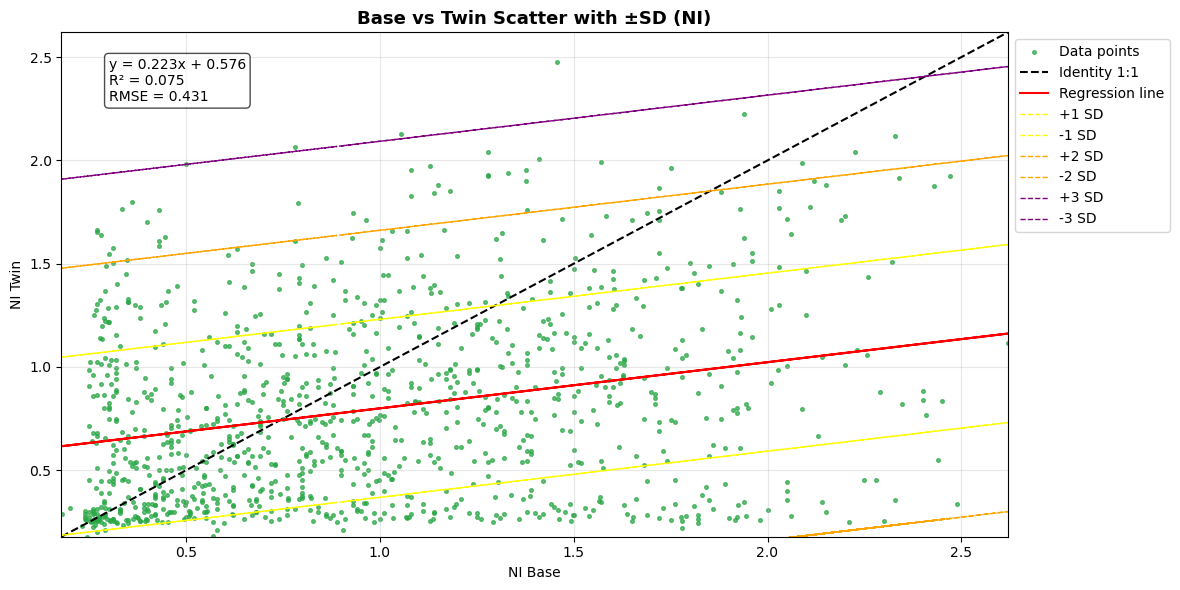

✅ Scatter ±SD Plot disimpan: ../output/twinhole_plots/scatter_sd_fe.svg


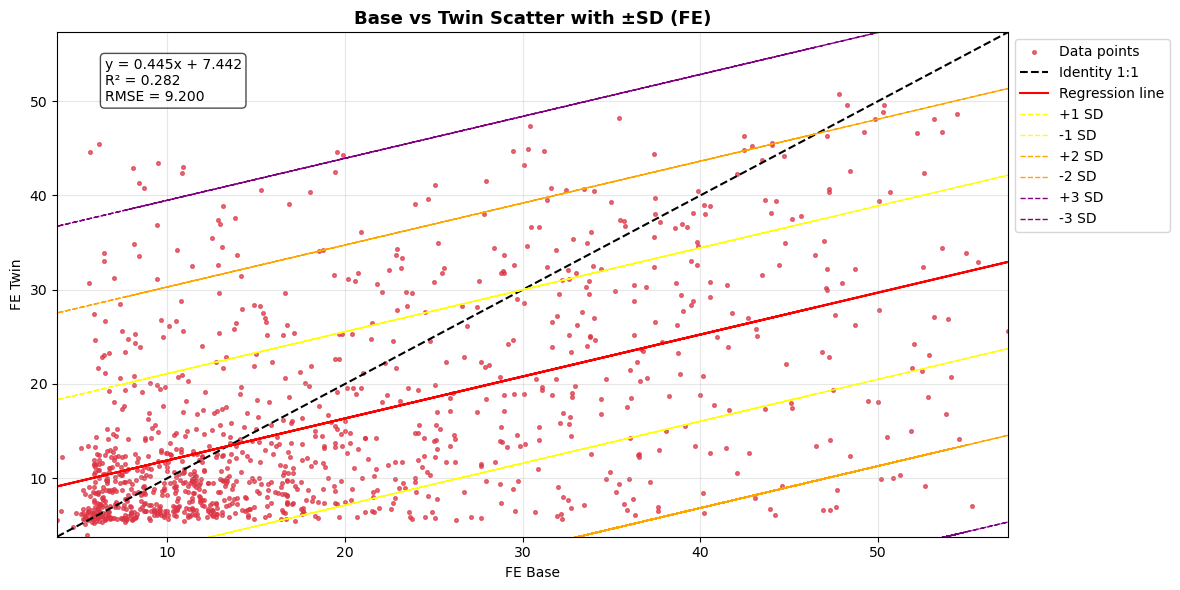

✅ Scatter ±SD Plot disimpan: ../output/twinhole_plots/scatter_sd_mgo.svg


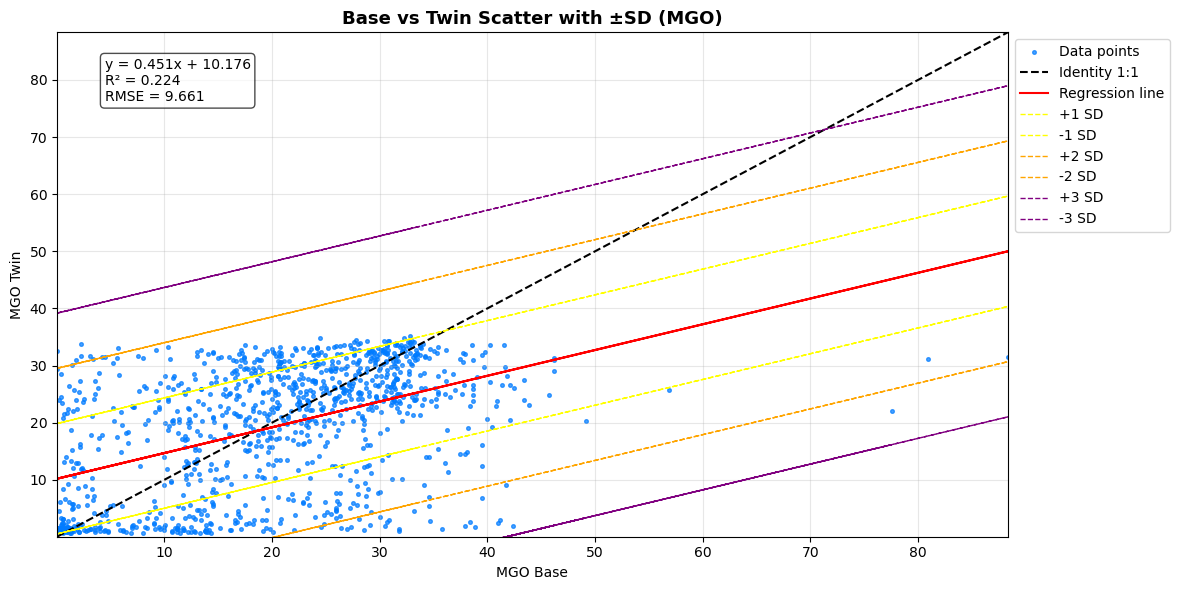

✅ Scatter ±SD Plot disimpan: ../output/twinhole_plots/scatter_sd_sio2.svg


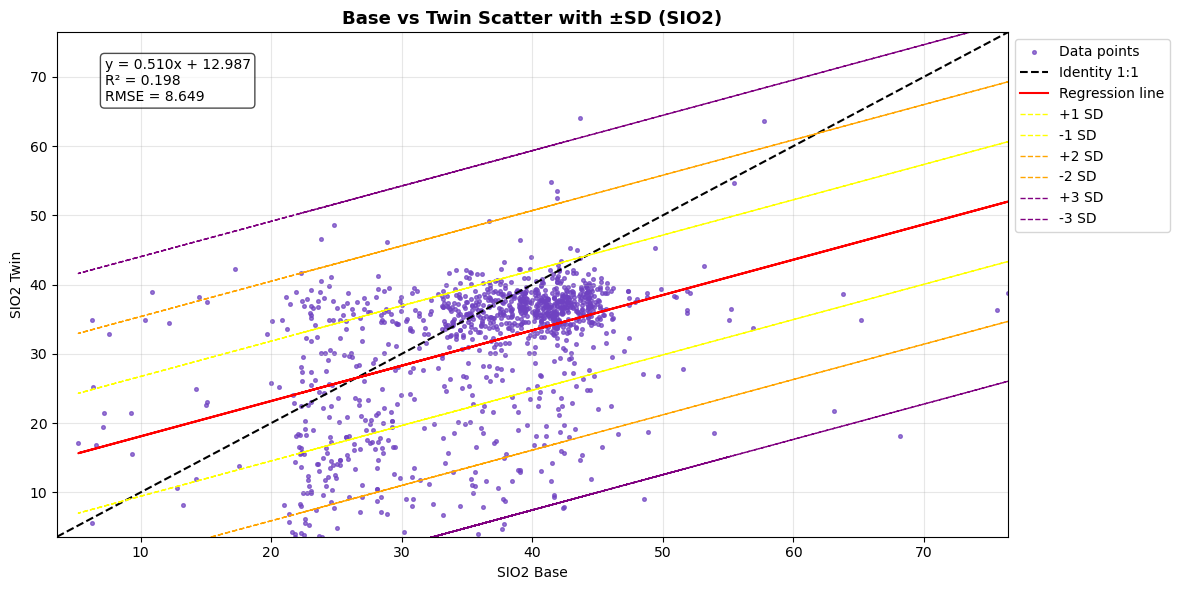

In [147]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="scatter"
)

In [134]:
composited_df

,base_id,hole_id,depth_from,depth_to,interval_length,ni,fe,mgo,sio2,cr_%,core_length,lith,twin_count,is_twin
0,F07-001,F07-001,0.00,1.00,1.00,0.90,46.45,0.05,22.26,1.00,1.00,LIM,2,False
1,F07-001,F07-001,1.00,2.00,1.00,1.76,30.33,5.92,28.83,0.90,0.90,SAP,2,False
2,F07-001,F07-001,2.00,3.00,1.00,1.91,34.02,2.93,28.09,0.80,0.80,SAP,2,False
3,F07-001,F07-001,3.00,4.00,1.00,2.26,12.91,15.92,40.57,1.00,1.00,SAP,2,False
4,F07-001,F07-001,4.00,5.00,1.00,2.10,15.72,15.73,37.30,1.00,1.00,SAP,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,F09-043,F09-043i,5.00,6.00,1.00,0.29,6.73,31.71,34.69,1.00,1.00,SAP,2,True
2205,F09-043,F09-043i,6.00,7.00,1.00,0.28,6.52,34.24,36.23,1.00,1.00,SAP,2,True
2206,F09-043,F09-043i,7.00,8.00,1.00,0.25,5.79,32.86,35.48,1.00,1.00,SAP,2,True
2207,F09-043,F09-043i,8.00,9.00,1.00,0.25,5.66,33.38,34.60,1.00,1.00,SAP,2,True


In [148]:
composited_df.columns

Index(['base_id', 'hole_id', 'depth_from', 'depth_to', 'interval_length', 'ni',
       'fe', 'mgo', 'sio2', 'cr_%', 'core_length', 'lith', 'twin_count',
       'is_twin'],
      dtype='object')

/tmp/ipykernel_10781/1662790240.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


✅ Boxplot disimpan: ../output/twinhole_plots/boxplot_ni.svg


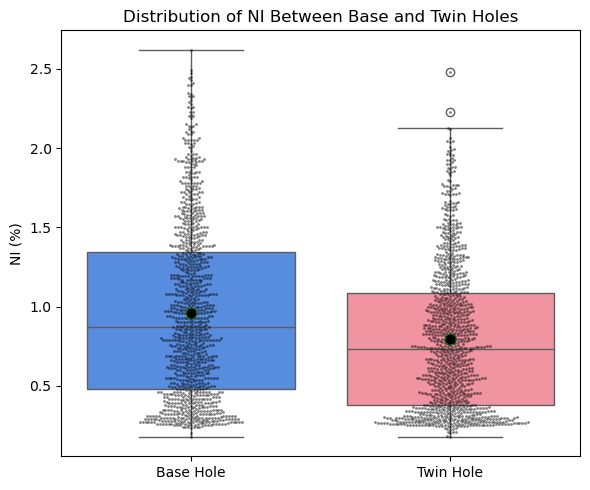

/tmp/ipykernel_10781/1662790240.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


✅ Boxplot disimpan: ../output/twinhole_plots/boxplot_fe.svg


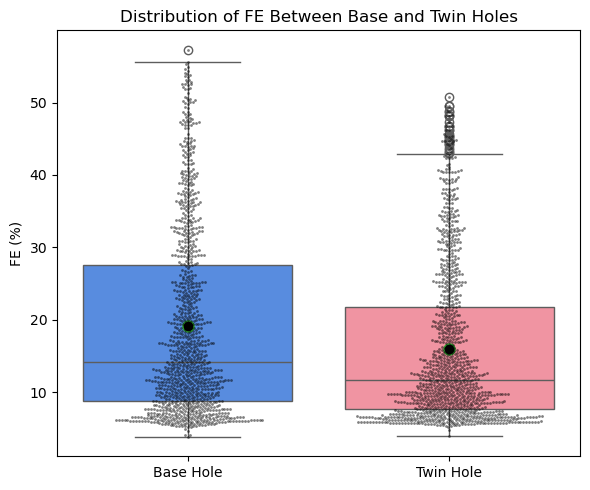

/tmp/ipykernel_10781/1662790240.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


✅ Boxplot disimpan: ../output/twinhole_plots/boxplot_mgo.svg


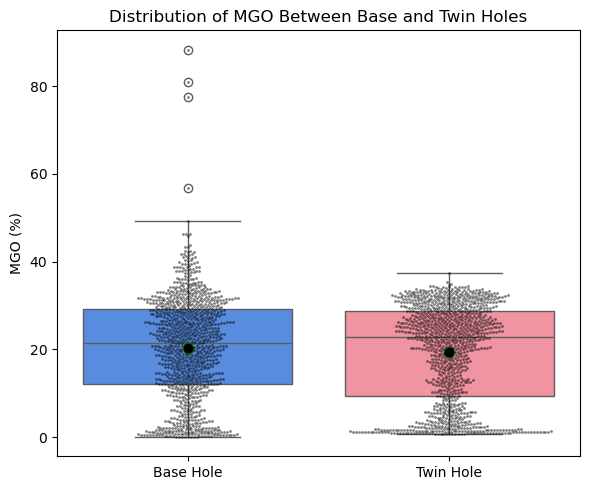

/tmp/ipykernel_10781/1662790240.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


✅ Boxplot disimpan: ../output/twinhole_plots/boxplot_sio2.svg


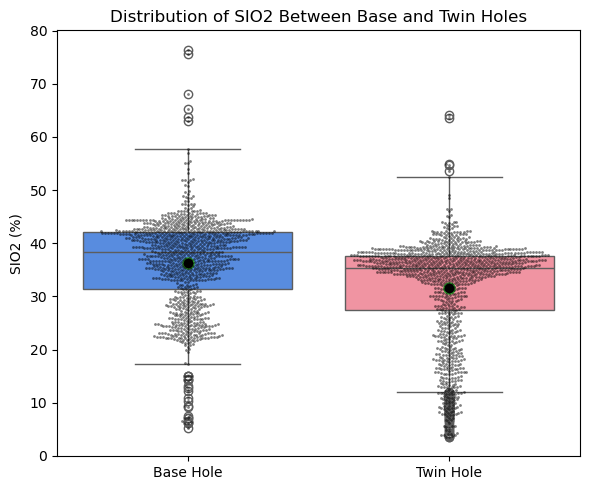

In [160]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="boxplot"
)


✅ Pairplot disimpan: ../output/twinhole_plots/pairplot.svg


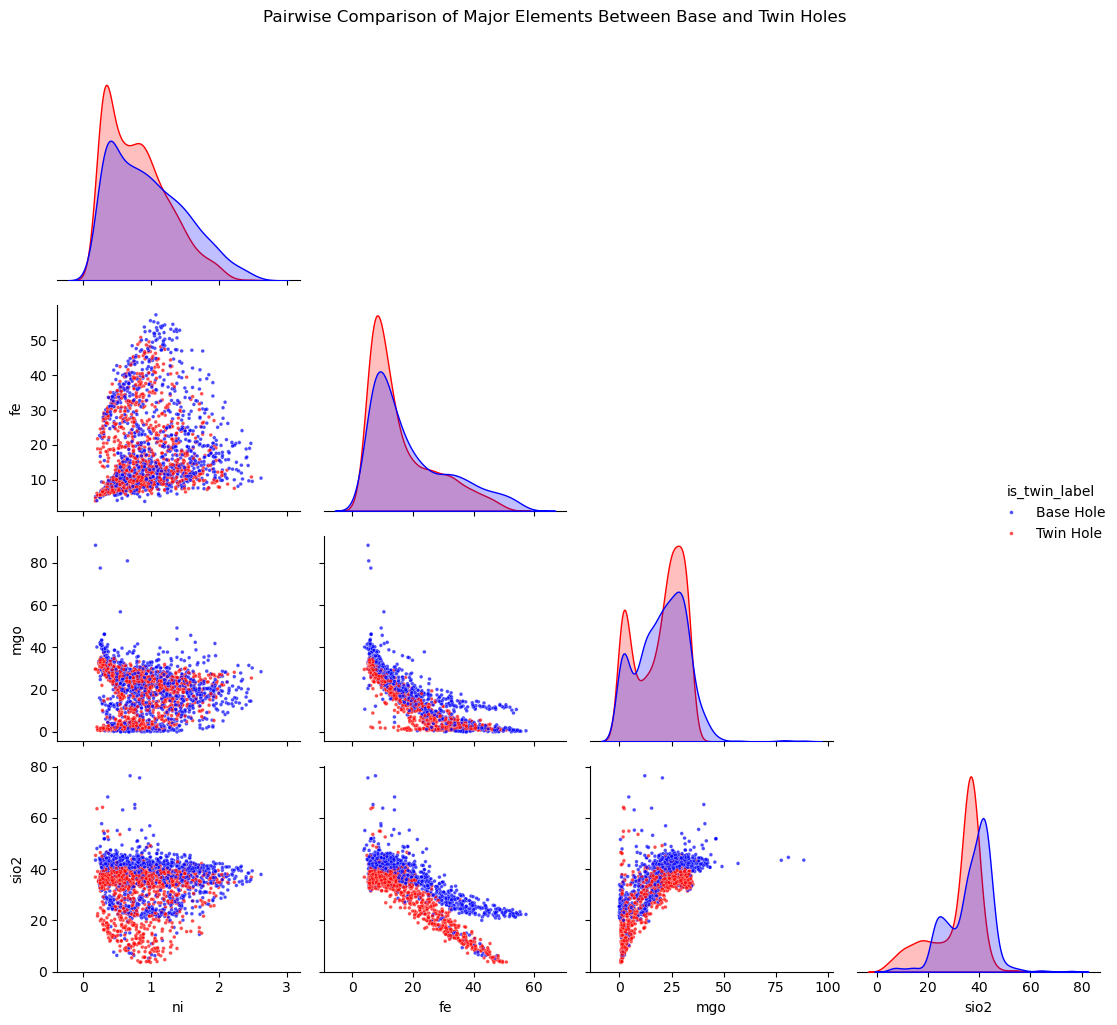

In [167]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="pairplot"
)

✅ Heatmap Base & Twin disimpan: ../output/twinhole_plots/heatmap_base_twin.svg


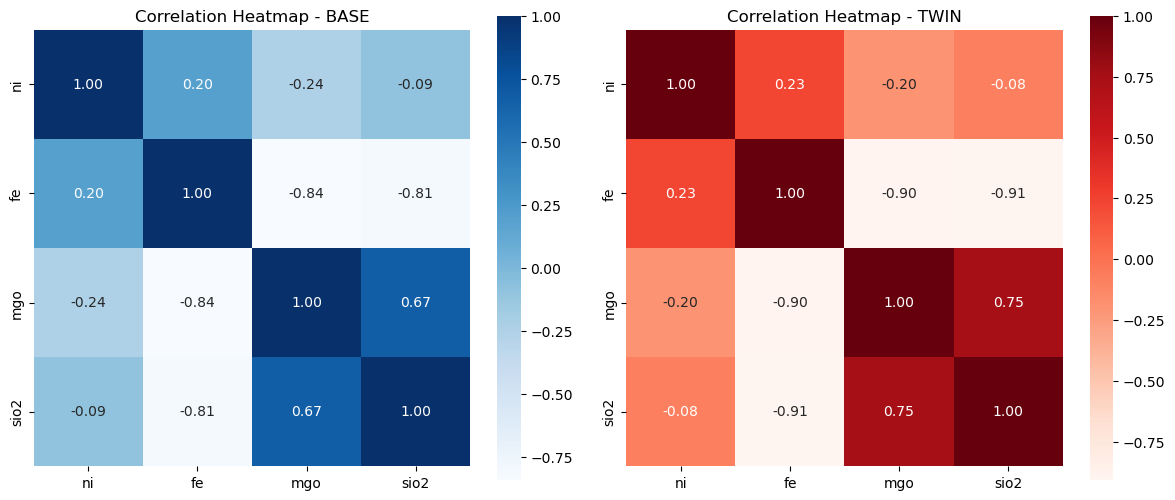

In [169]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="heatmap"
)


✅ ECDF plot disimpan: ../output/twinhole_plots/ecdf_ni.svg


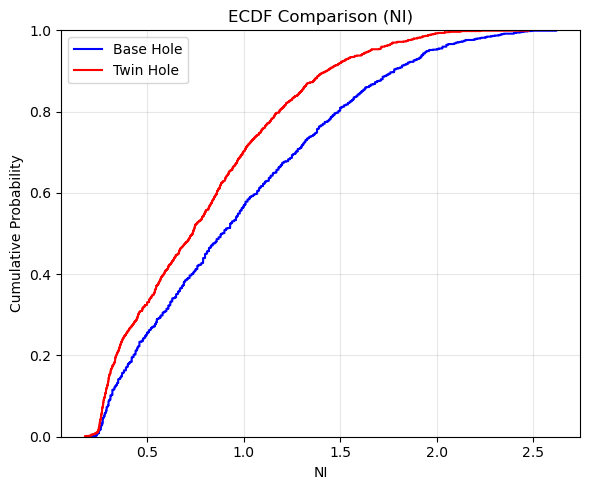

✅ ECDF plot disimpan: ../output/twinhole_plots/ecdf_fe.svg


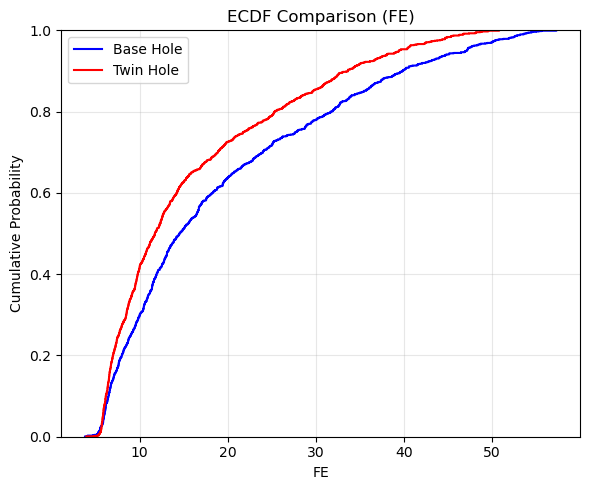

✅ ECDF plot disimpan: ../output/twinhole_plots/ecdf_mgo.svg


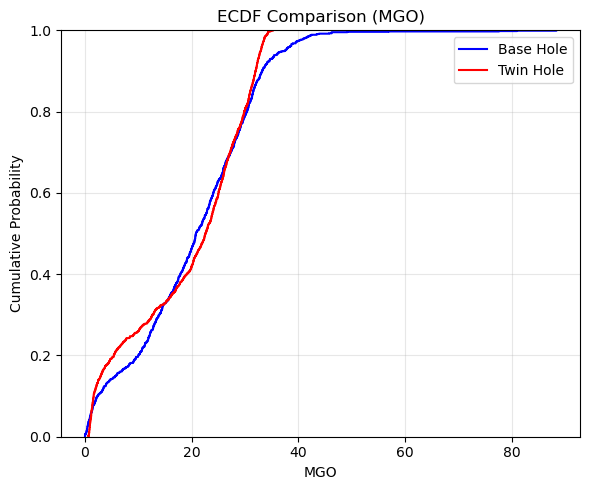

✅ ECDF plot disimpan: ../output/twinhole_plots/ecdf_sio2.svg


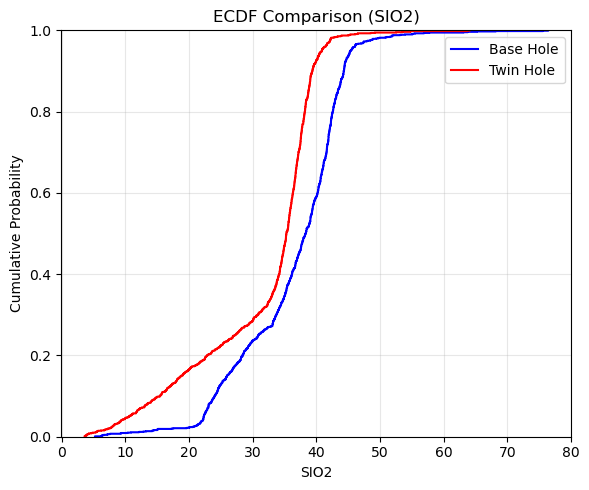

In [170]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="ecdf",
    output_dir="../output/twinhole_plots/"
)

✅ Depth profile disimpan: ../output/twinhole_plots/depth_profile_ni.svg


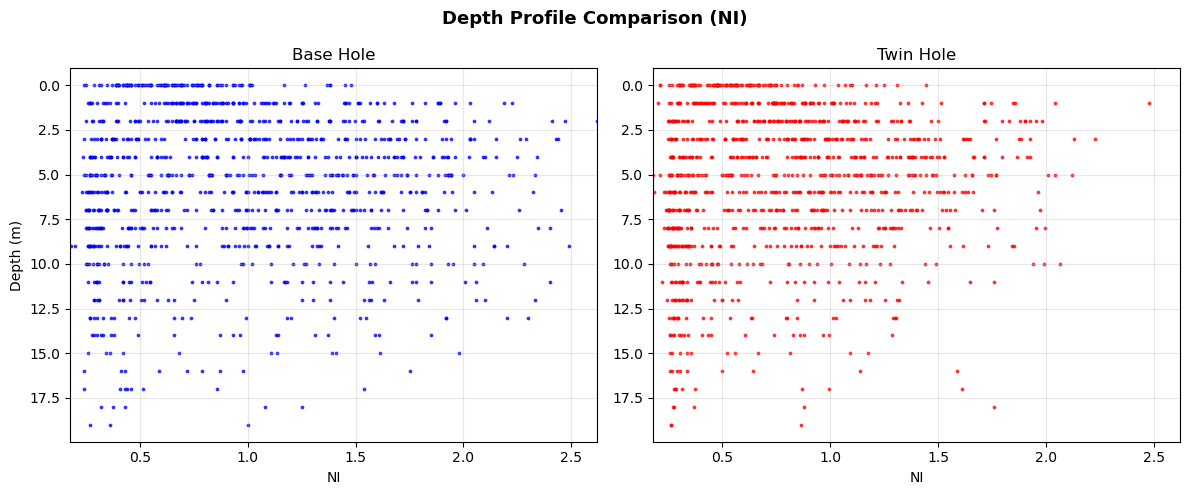

✅ Depth profile disimpan: ../output/twinhole_plots/depth_profile_fe.svg


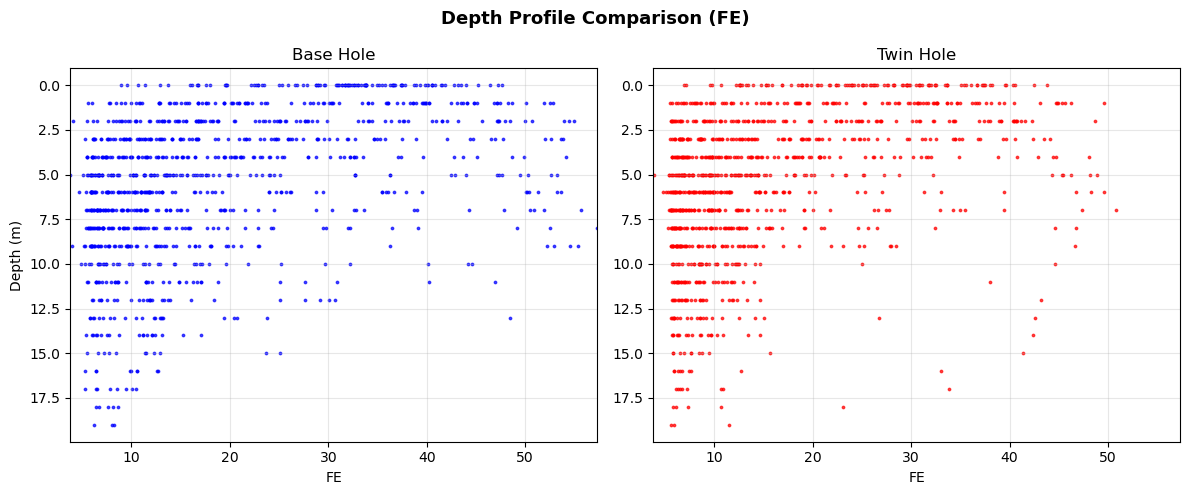

✅ Depth profile disimpan: ../output/twinhole_plots/depth_profile_mgo.svg


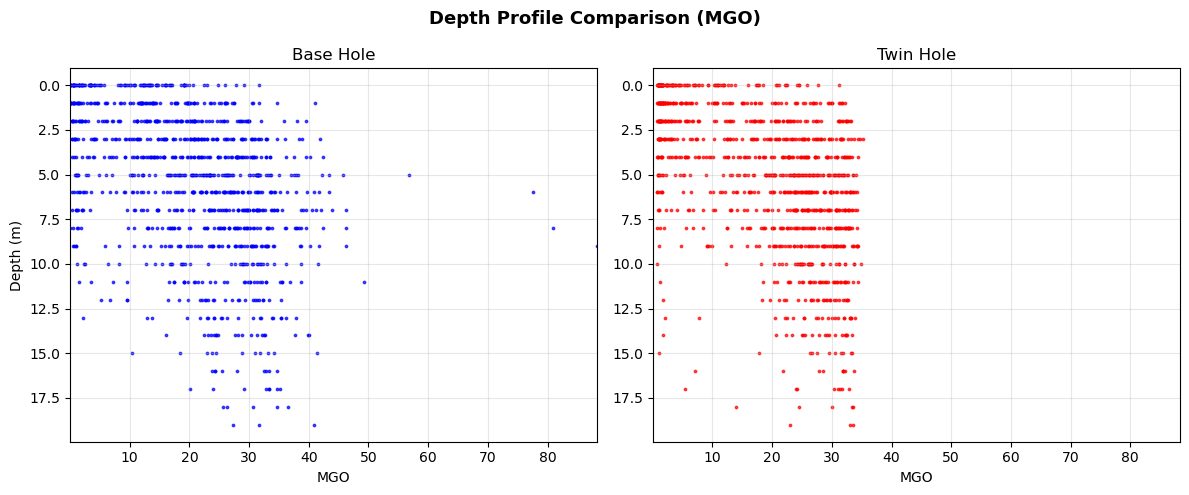

✅ Depth profile disimpan: ../output/twinhole_plots/depth_profile_sio2.svg


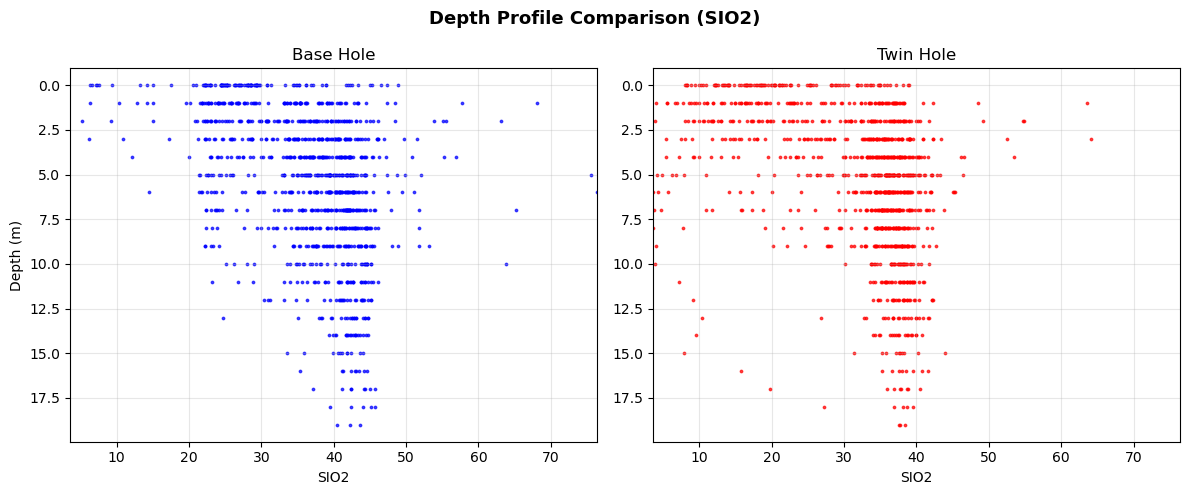

In [153]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="depth"
)

✅ Bland–Altman Plot disimpan: ../output/twinhole_plots/bland_altman_ni.svg


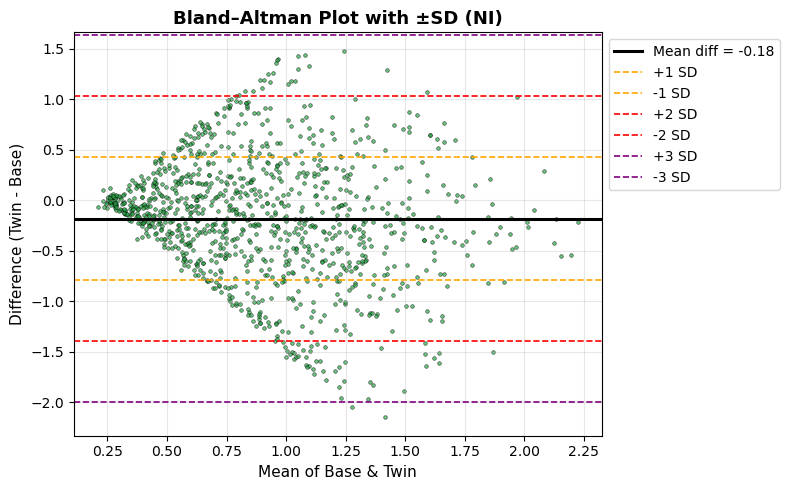

✅ Bland–Altman Plot disimpan: ../output/twinhole_plots/bland_altman_fe.svg


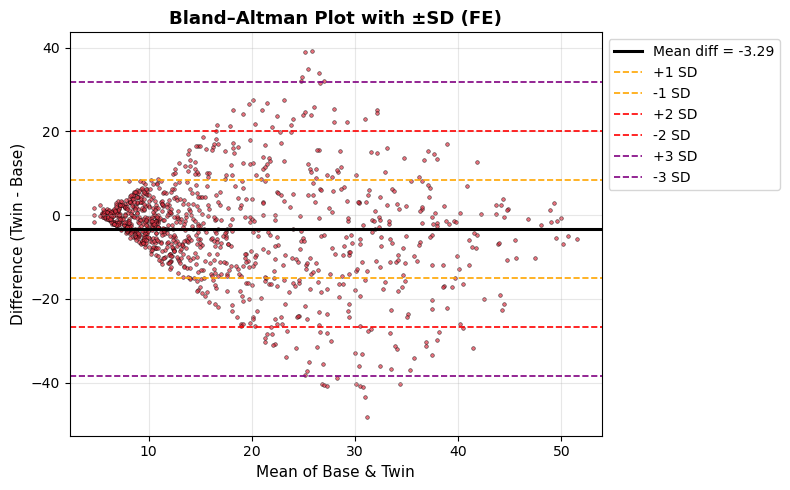

✅ Bland–Altman Plot disimpan: ../output/twinhole_plots/bland_altman_mgo.svg


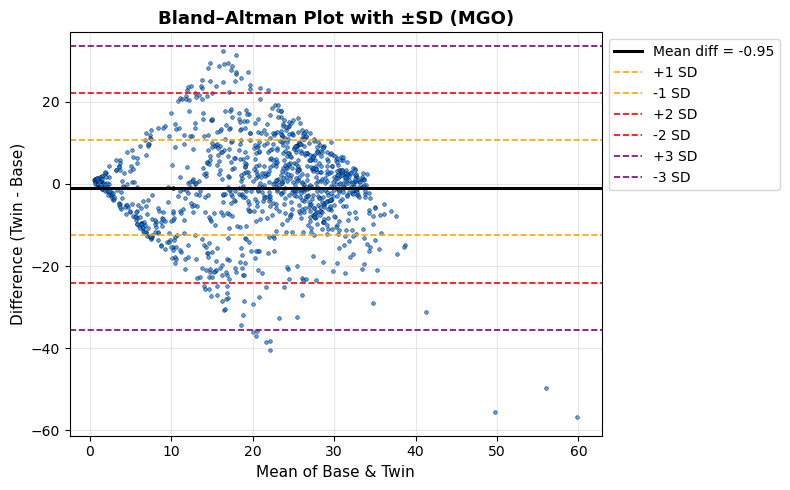

✅ Bland–Altman Plot disimpan: ../output/twinhole_plots/bland_altman_sio2.svg


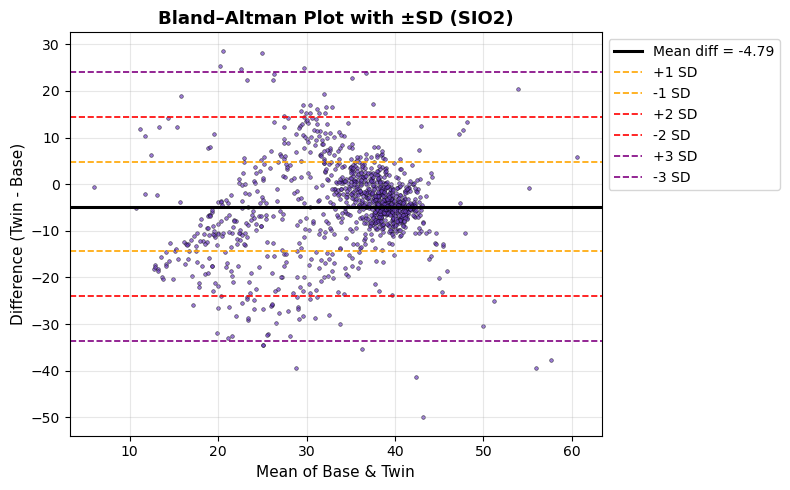

In [154]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="bland_altman"
)

In [171]:
print(composited_df.columns.tolist())


['base_id', 'hole_id', 'depth_from', 'depth_to', 'interval_length', 'ni', 'fe', 'mgo', 'sio2', 'cr_%', 'core_length', 'lith', 'twin_count', 'is_twin', 'is_twin_label']


✅ Histogram paired difference disimpan: ..output/twinhole_plots/paired_diff_hist_ni.svg


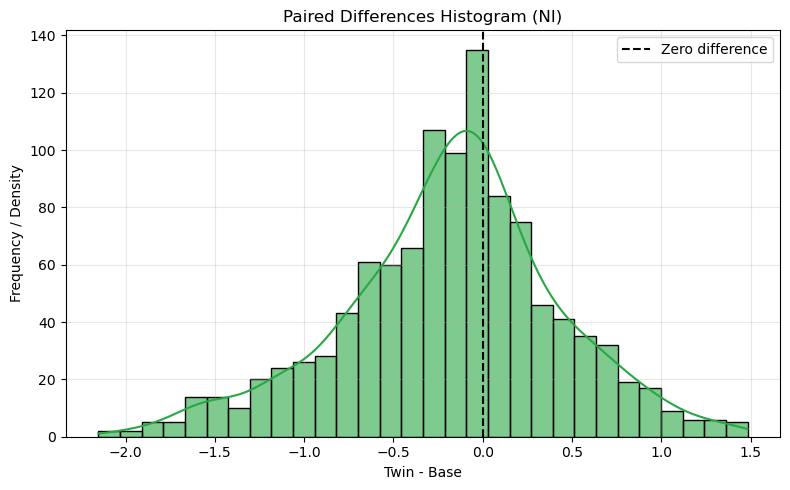

✅ Histogram paired difference disimpan: ..output/twinhole_plots/paired_diff_hist_fe.svg


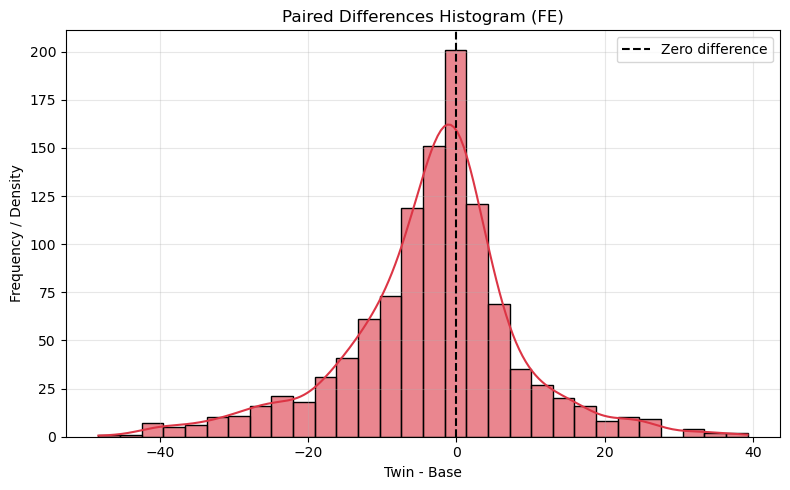

✅ Histogram paired difference disimpan: ..output/twinhole_plots/paired_diff_hist_mgo.svg


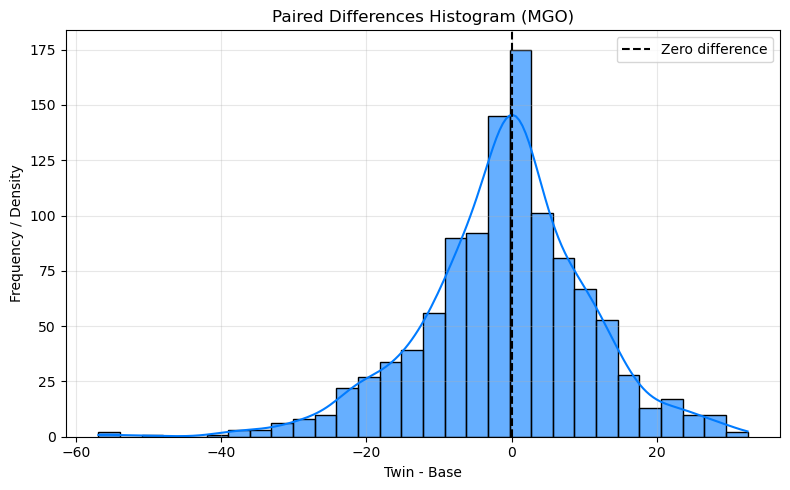

✅ Histogram paired difference disimpan: ..output/twinhole_plots/paired_diff_hist_sio2.svg


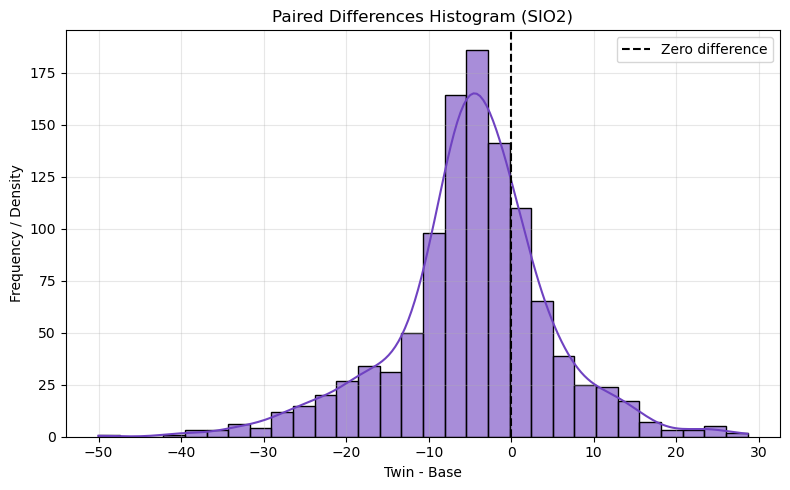

In [156]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="paired_diff_hist",
    output_dir="..output/twinhole_plots/"
)

✅ Q-Q Plot disimpan: ../output/twinhole_plots/qqplot_ni.svg


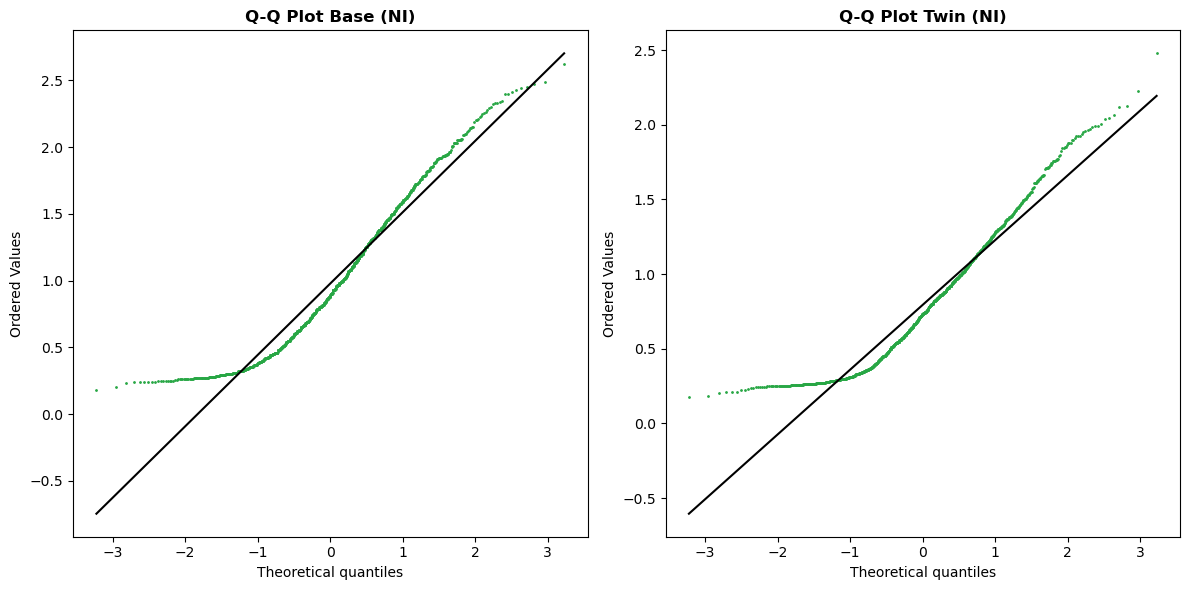

✅ Q-Q Plot disimpan: ../output/twinhole_plots/qqplot_fe.svg


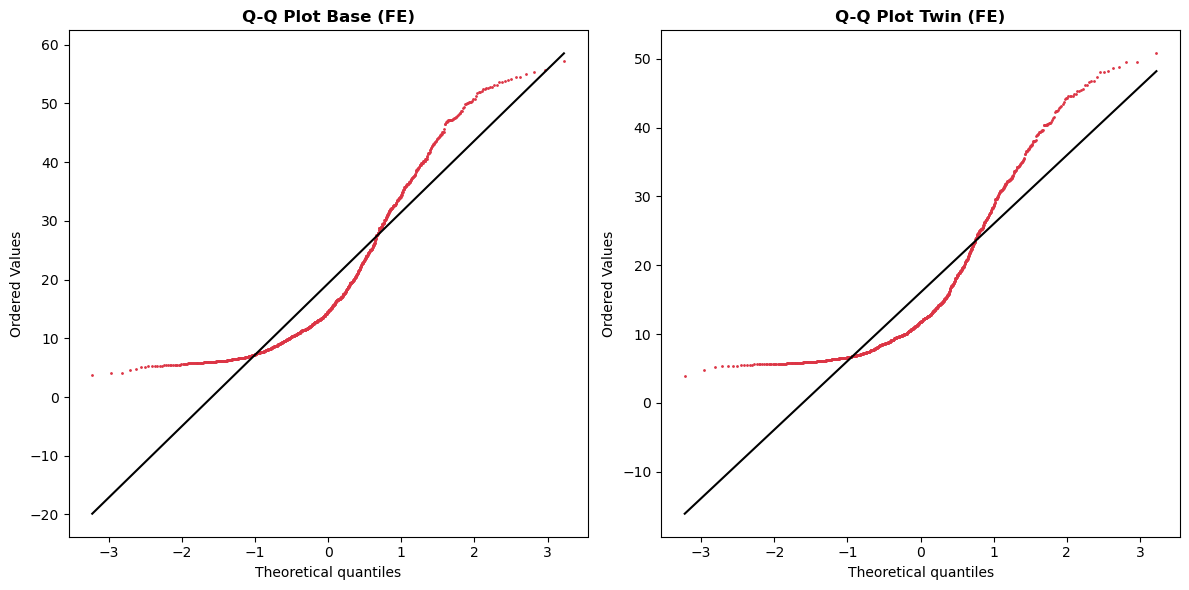

✅ Q-Q Plot disimpan: ../output/twinhole_plots/qqplot_mgo.svg


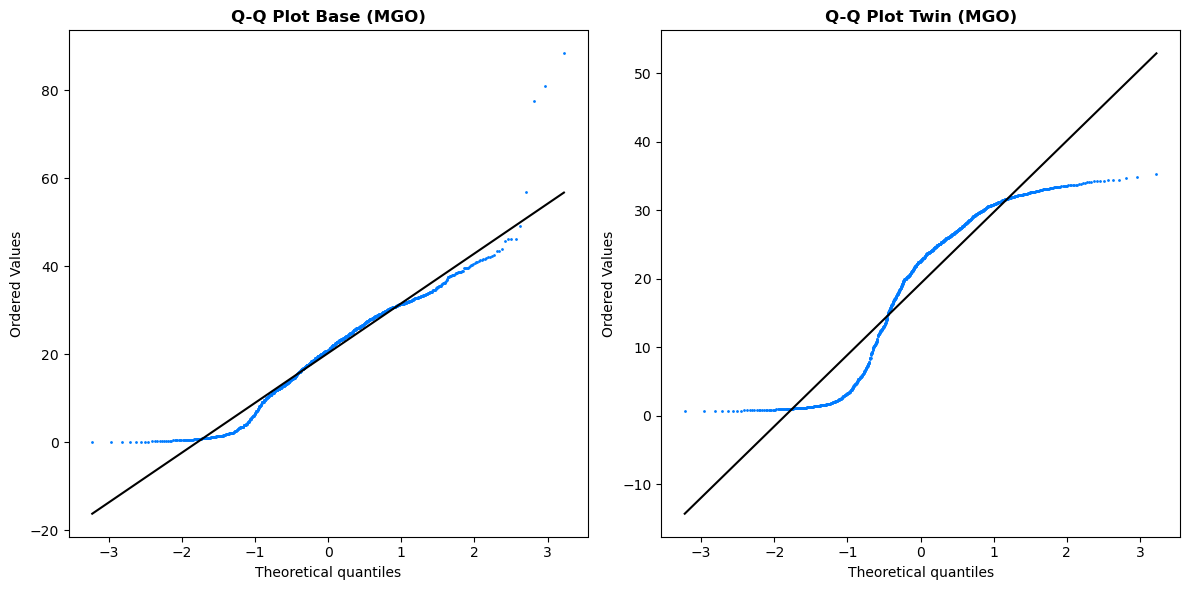

✅ Q-Q Plot disimpan: ../output/twinhole_plots/qqplot_sio2.svg


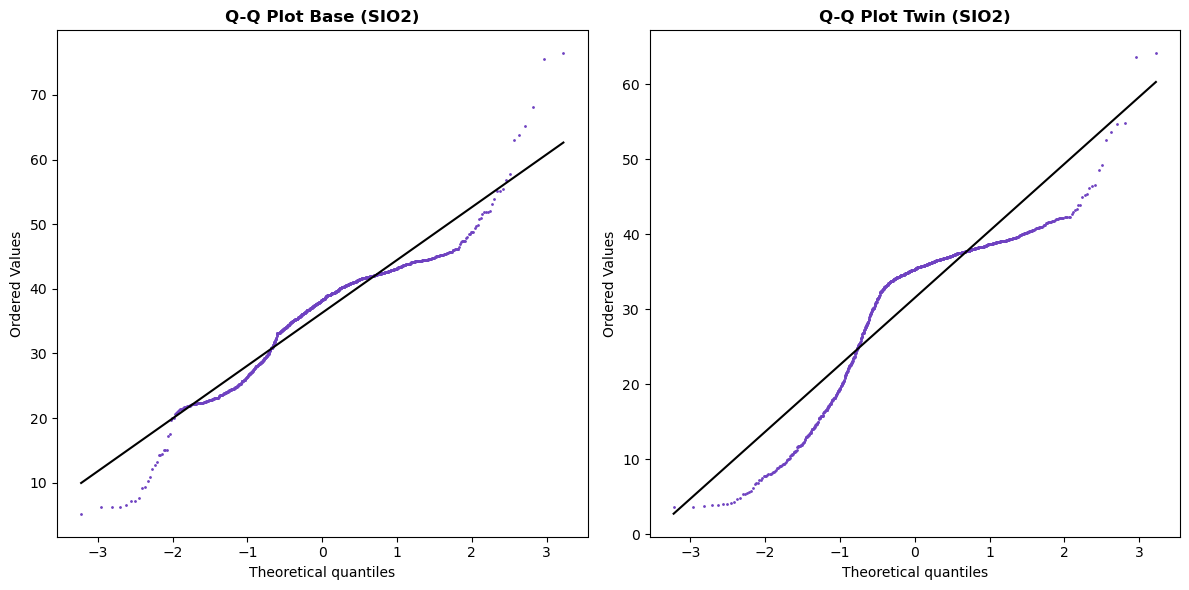

In [175]:
# Kolom wajib: is_twin + elemen-elemen kimia
elements = ["ni", "fe", "mgo", "sio2"]

# Panggil fungsi
visualize_twinhole_plots(
    composited_df,
    elements,
    mode="qq_paired",
    output_dir="../output/twinhole_plots/"
)

Excellent 👍 — kamu sudah punya **rangkaian visual yang lengkap dan metodologis banget**, dan pembagian subbab yang kamu tulis itu sudah **sangat tepat untuk bab 4.3 “Twin-Hole Statistical Insights”**.

Supaya kamu punya struktur *technical paper* yang kuat, di bawah ini saya bantu:
1️⃣ Menjelaskan **struktur subbab yang ideal** dan
2️⃣ Memberikan **rekomendasi posisi setiap plot (visualisasi)** agar mendukung narasi dan interpretasi statistiknya.

---

## 🧭 **Struktur yang Direkomendasikan untuk Bab 4.3 Twin-Hole Statistical Insights**

---

### **4.3.1 Composite Dataset Overview**

**Fokus:** Menjelaskan bagaimana dataset dibangun, diseragamkan, dan dikomposit.
**Tujuan:** Memberikan konteks teknis agar analisis berikutnya transparan.

**Visual yang cocok:**

* ✅ **Boxplot awal (per unsur, Base vs Twin)** → menunjukkan distribusi dan outlier sebelum analisis korelasi.
* ✅ (Opsional) **Histogram atau KDE overlay** → menunjukkan persebaran nilai antar pasangan.

**Tujuan visual:** Menunjukkan sebaran nilai awal dan kestabilan antar hole sebelum uji korelasi dilakukan.

---

### **4.3.2 Paired Correlation and Regression**

**Fokus:** Menilai kekuatan hubungan linear dan arah bias antara pasangan Base–Twin.
**Analisis:**

* Pearson & Spearman correlation
* Linear regression (R², RMSE)

**Visual yang ditempatkan:**

* ✅ **Scatter plot dengan garis regresi dan batas ±2SD / ±3SD** → menunjukkan sebaran umum dan bias arah.
* ✅ **Pairplot atau Heatmap correlation matrix** → memperlihatkan hubungan antar unsur (cross-element relationships).

**Interpretasi:**

* Uraikan kekuatan hubungan (strong, moderate, weak).
* Jelaskan arah bias (over/underestimation).
* Kaitkan R² dan RMSE dengan tingkat presisi assay.

📌 *Catatan:* bagian ini sangat cocok untuk menampilkan kompetensi statistik kamu dalam portfolio — karena menggabungkan regresi, korelasi, dan interpretasi praktis (geometallurgical sense).

---

### **4.3.3 Agreement and Bias Analysis (Bland–Altman)**

**Fokus:** Evaluasi kesepakatan hasil antara Base dan Twin (agreement level).
**Visual:**

* ✅ **Bland–Altman plot (difference vs mean)** → menilai bias sistematik dan batas kesepakatan (LoA).
* ✅ **Paired difference histogram** → mendukung interpretasi distribusi selisih assay.

**Interpretasi:**

* Periksa apakah bias terpusat di sekitar nol.
* Bandingkan rentang ±2SD atau ±3SD terhadap signifikansi geologis.

---

### **4.3.4 Distributional Comparison**

**Fokus:** Menilai kesamaan bentuk distribusi antar pasangan (distribution shape consistency).
**Visual:**

* ✅ **ECDF plot (Empirical Cumulative Distribution Function)**
* ✅ **Q–Q plot (quantile–quantile comparison)**

**Interpretasi:**

* Kesamaan bentuk (parallel ECDF, linear Q–Q).
* Penyimpangan tail (anomali low/high grade).

---

### **4.3.5 Vertical Alignment Verification (Depth Profile)**

**Fokus:** Mengevaluasi konsistensi assay antar pasangan sepanjang kedalaman.
**Visual:**

* ✅ **Depth profile plot (Base vs Twin)** → sering berbentuk mirror plot atau overlay.

**Interpretasi:**

* Tunjukkan kesesuaian tren vertikal dan titik deviasi.
* Soroti interval dengan mismatch signifikan (potensi kesalahan komposit atau recovery).

---

### **4.3.6 Summary of Twin-Hole Validation**

**Fokus:** Merangkum seluruh hasil statistik dan visual secara integratif.
**Isi ringkas:**

* Konsistensi distribusi dan tren.
* Kekuatan hubungan (R², RMSE, bias).
* Validitas dataset untuk pemodelan geostatistik.

**Visual opsional:**

* ✅ **Heatmap ringkasan hasil korelasi antar parameter (Ni, Fe, MgO, SiO₂)**
* ✅ **Diagram alur ringkasan tahapan validasi (flowchart)** untuk bagian portfolio.

---

## 📊 **Ringkasan Penempatan Plot**

| Sub-bab                                 | Jenis Plot                                 | Tujuan Visual                                              |
| :-------------------------------------- | :----------------------------------------- | :--------------------------------------------------------- |
| 4.3.1 Composite Dataset Overview        | Boxplot, Histogram/KDE                     | Menunjukkan sebaran awal dan stabilitas antar hole         |
| 4.3.2 Paired Correlation and Regression | Scatter plot (+regresi), Heatmap, Pairplot | Mengukur kekuatan hubungan dan arah bias                   |
| 4.3.3 Agreement and Bias Analysis       | Bland–Altman, Paired Differences Histogram | Menilai kesepakatan dan pola bias                          |
| 4.3.4 Distributional Comparison         | ECDF, Q–Q Plot                             | Menunjukkan kesamaan bentuk distribusi (shape consistency) |
| 4.3.5 Vertical Alignment Verification   | Depth Profile                              | Memeriksa kesesuaian tren vertikal antar pasangan          |
| 4.3.6 Summary of Twin-Hole Validation   | Heatmap ringkasan / Flowchart              | Menyajikan integrasi hasil analisis dan kesimpulan global  |

---

Kalau kamu mau, saya bisa bantu lanjutkan **penulisan versi teks formal untuk 4.3.2 Paired Correlation and Regression** (paragraf + struktur interpretasi R², RMSE, bias arah) sesuai format technical paper seperti sebelumnya. Mau saya bantu lanjutkan bagian itu juga?
